In [4]:
import numpy as np
import neurokit2 as nk

import pyhrv
import pyhrv.tools as tools
import pyhrv.frequency_domain as fd

import pandas as pd
import os, json
from tsfresh import extract_features
import matplotlib.pyplot as plt

In [5]:
workDir = 'D:/LAB/放鬆-三總/Relaxing/分析'
os.chdir(workDir)

In [14]:
feature_names = ['RRV_RMSSD', 'RRV_MeanBB', 'RRV_SDBB', 'RRV_SDSD', 'RRV_CVBB',
       'RRV_CVSD', 'RRV_MedianBB', 'RRV_MadBB', 'RRV_MCVBB', 'RRV_VLF',
       'RRV_LF', 'RRV_HF', 'RRV_LFHF', 'RRV_LFn', 'RRV_HFn', 'RRV_SD1',
       'RRV_SD2', 'RRV_SD2SD1', 'RRV_ApEn', 'RRV_SampEn', 'RRV_DFA_alpha1',
       ]
print(len(feature_names))
       
# lable_names = ['addictLabel', 'stateLabel', 'trainingCount']
lable_names = ['addictLabel', 'stateLabel']

data_name = ['data_name']

# testState = ['pre', 'VR', 'post']
# stageDuration = [300, 480, 300]
# sampleRate = 256
sampleRate = 200
# stagePoint = [-1080*sampleRate, -780*sampleRate, -300*sampleRate,]

inputPath = "Data3group/RES/"
rriPath = "Data3group/RRI/"
featureOutputPath = "Feature3group/"

dataInfoOld = ['A01', 'A02', 'A03', 'A04',
               'N01', 'N02', 'N03', 'N04', 'N05', 'N06', 'N08', 'N09', 'N10']

dataInfoLack = ['A106', 'A72', 'A74','A78', 'A80', 'A82', 'A84', 'A86', 
                'A69', 'A75', 'A77', 'A81', 'A83', 'A85', 'A91', 'A99']

21


In [7]:
def feature_Cal(resData, sampleRate, dataCol = "RESdata"):
    cleaned = nk.rsp_clean(resData[dataCol], sampling_rate=sampleRate)

    # Extract peaks
    _, peaks_dict = nk.rsp_peaks(cleaned)
    info = nk.rsp_fixpeaks(peaks_dict)

    rsp_rate = nk.rsp_rate(cleaned, peaks_dict, sampling_rate=sampleRate)
    rrv = nk.rsp_rrv(rsp_rate, info, sampling_rate=sampleRate, show=True)
    return rrv


In [8]:
def set_label(dataInfo):
    addictLabel = int(dataInfo[0][0] == 'A')

    # if len(dataInfo) == 2:
    #     trainingCount = 1
    #     state = dataInfo[1]
    # elif len(dataInfo) == 3:
    #     trainingCount = int(dataInfo[1])
    #     state = dataInfo[2]

    if dataInfo[3] == "PreTest":
        state = 0
    elif dataInfo[3] == "VRTest":
        state = 1
    else:
        state = 2
    
    stateLabel = state

    # label = {'addictLabel' : addictLabel, 'stateLabel':stateLabel, 'trainingCount': trainingCount}
    label = {'addictLabel' : addictLabel, 'stateLabel':stateLabel}
    
    return label


In [15]:
def CalRESFeatures(filePath, sampleRate, output = False):
    
    dataList = os.listdir(filePath)
    name = pd.DataFrame(columns = data_name)
    result = pd.DataFrame(columns=feature_names)
    lable = pd.DataFrame(columns=lable_names)

    for dataName in dataList:
        # if dataName == 'A09_1.csv' or dataName == 'A09_2.csv':
        #     continue

        dataInfo = dataName[:-4].split('_')
        
        data = pd.read_csv("%s%s"%(filePath, dataName), names=['TimeStamp', 'RESdata'])

        # for i in range(0, 3): #3 stages
        #     if i != 2:
        #         stageData = data[stagePoint[i]:stagePoint[i+1]]
        #     elif i == 2:
        #         stageData = data[stagePoint[i]:]

        #     features = feature_Cal(stageData, sampleRate, 'RESdata')
        #     name = name.append({"data_name" : "%s_%s"%(dataName[:-4], testState[i])}, ignore_index= True)
        #     result = result.append(features, ignore_index=True)
        #     lable = lable.append(set_label(dataInfo=dataInfo+[i]), ignore_index=True)

        # if dataInfo[0] in dataInfoOld:
        #     features = feature_Cal(data, sampleRate, 'RESdata')
        if dataInfo[0] in dataInfoLack:
            features = feature_Cal(data, 15, 'RESdata')
        else:
            features = feature_Cal(data, 20, 'RESdata')
        # name = name.append({"data_name" : "%s_%s"%(dataName[:-4], testState[i])}, ignore_index= True)
        datanameDF = pd.DataFrame({"data_name" : ["%s%s_%s"%(dataInfo[0], dataInfo[1][0], dataInfo[3][:-4])]})
        name = pd.concat([name, datanameDF], axis=0, ignore_index=True)
        # result = result.append(features, ignore_index=True)
        result = pd.concat([result, pd.DataFrame(features, index=[0])], axis=0, ignore_index=True)
        # lable = lable.append(set_label(dataInfo=dataInfo+[i]), ignore_index=True)
        lable = pd.concat([lable, pd.DataFrame(set_label(dataInfo), index=[0])], axis=0, ignore_index=True)
        
    result = name.join(result)
    result = result.join(lable)

        # result = result.fillna(result.mean())
    return result

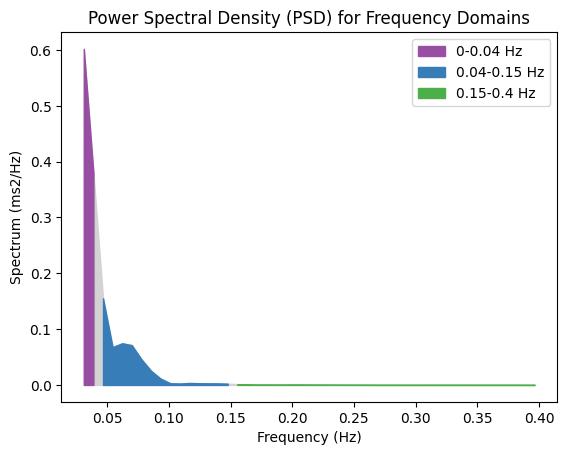

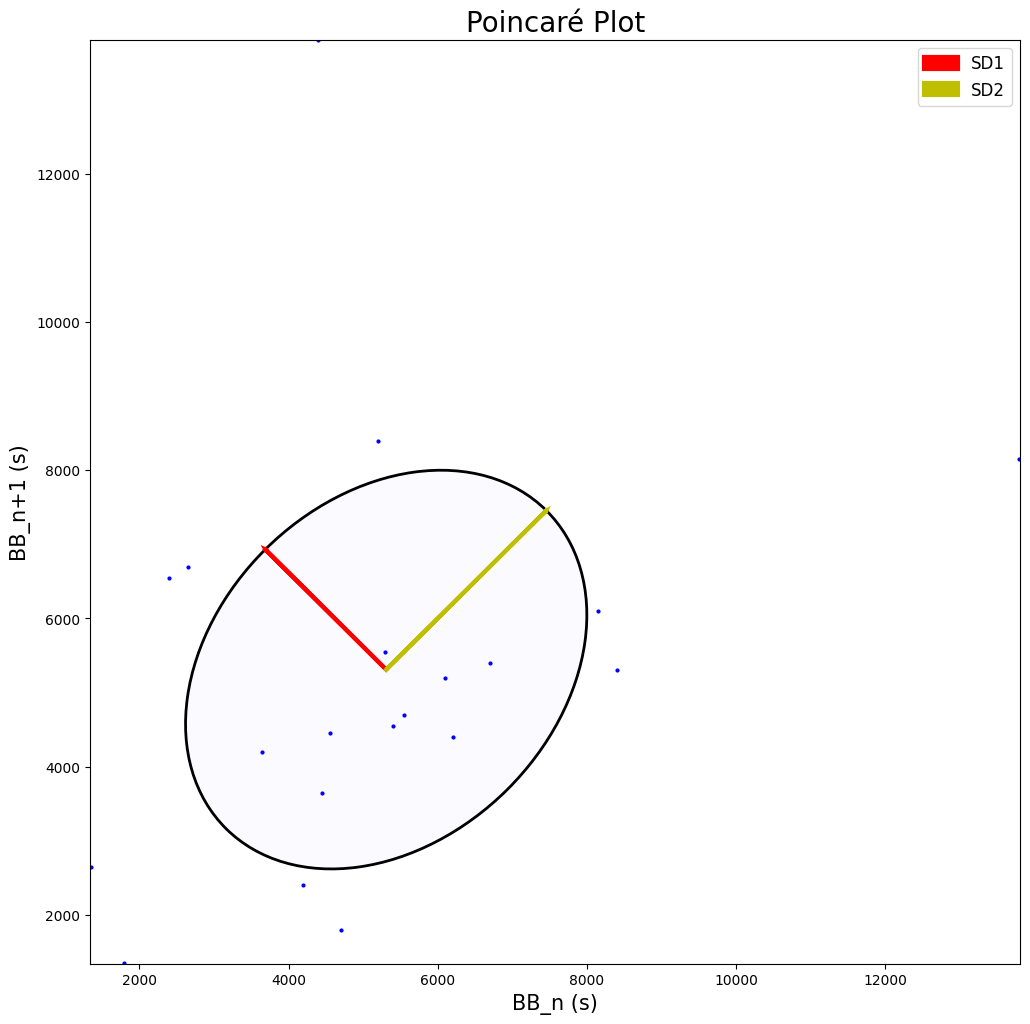

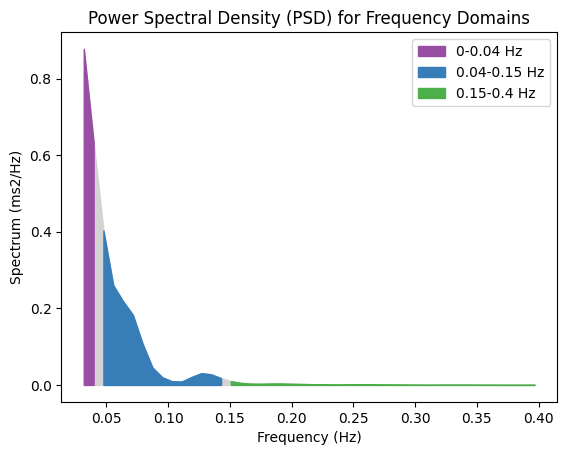

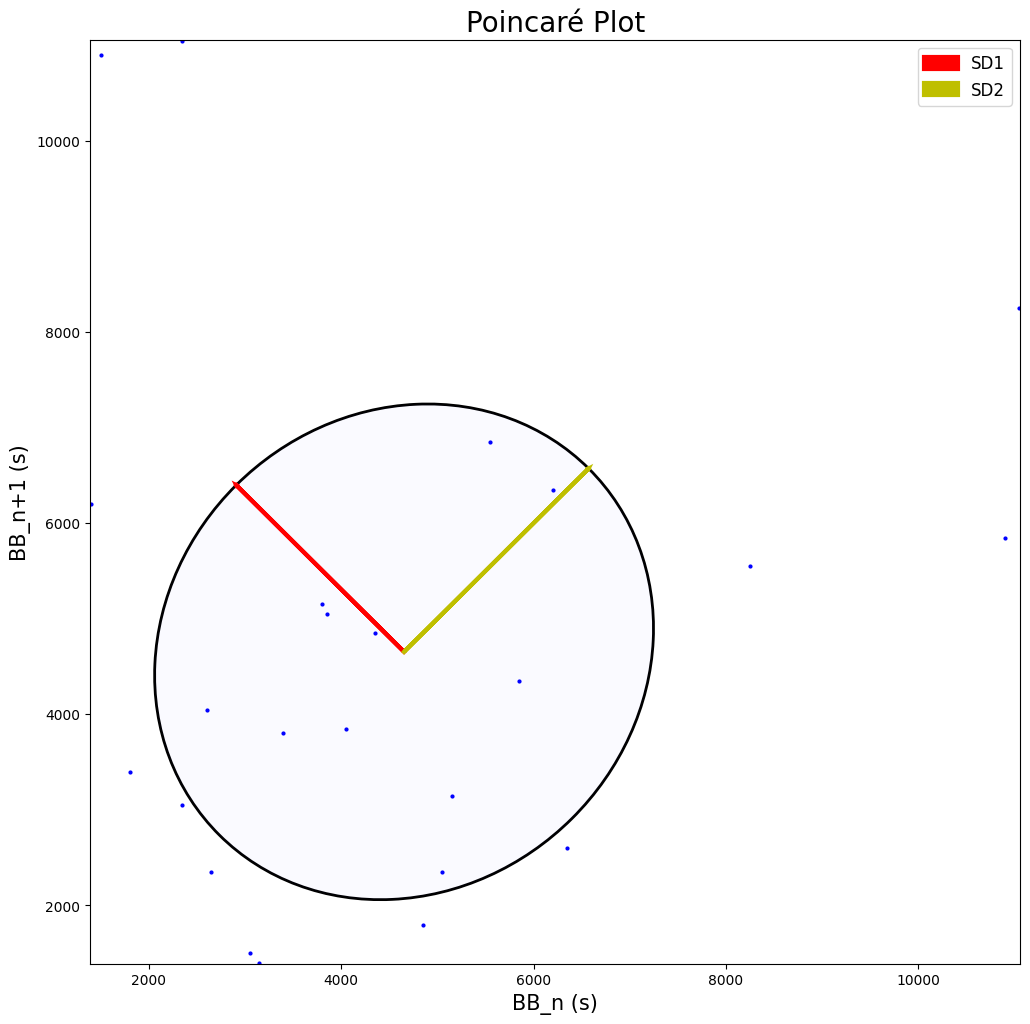

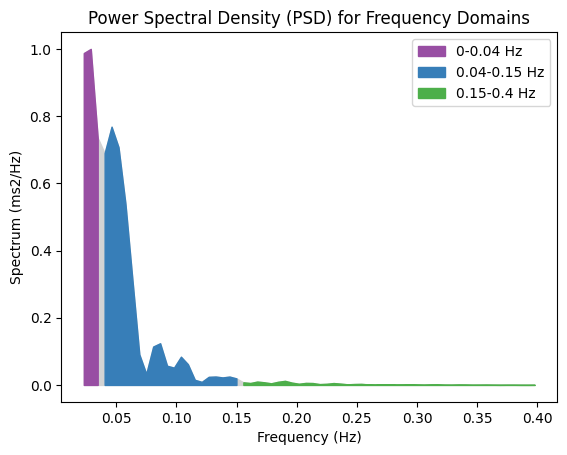

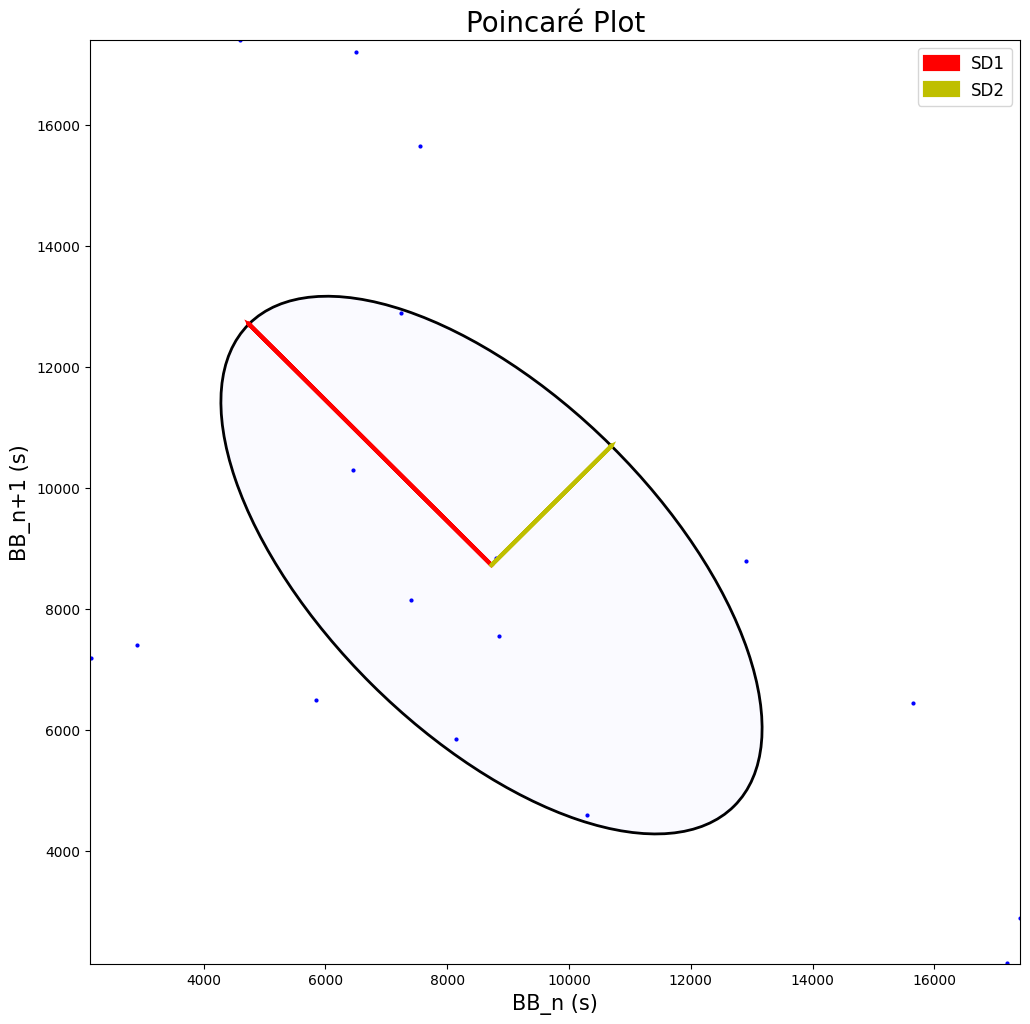

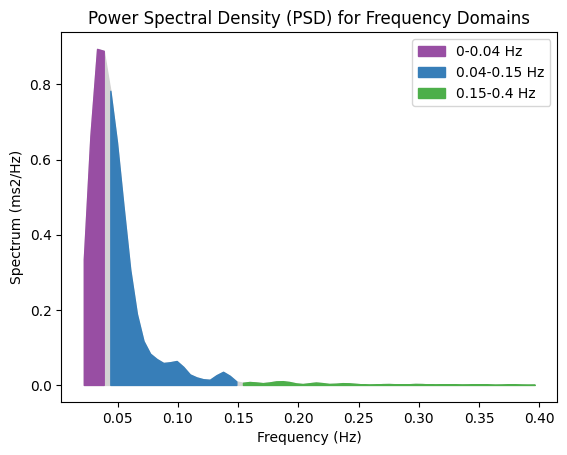

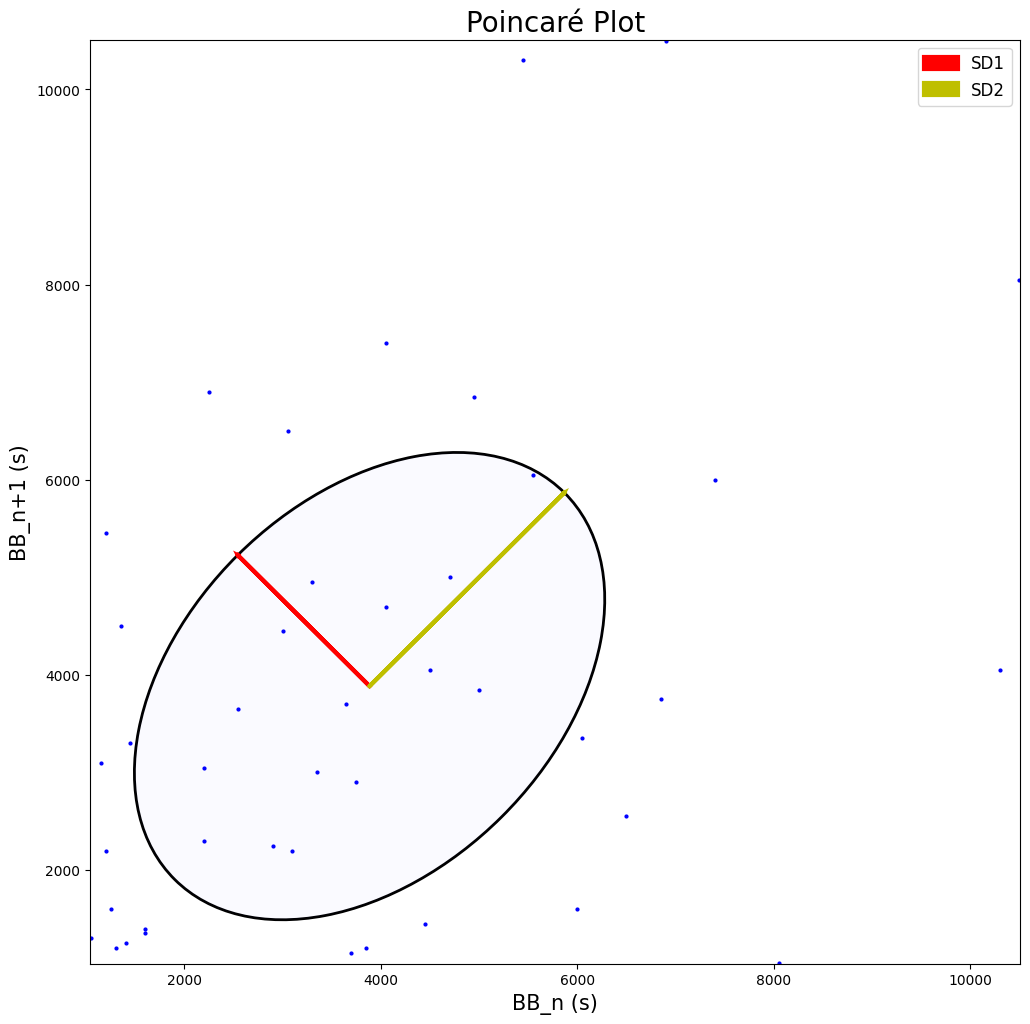

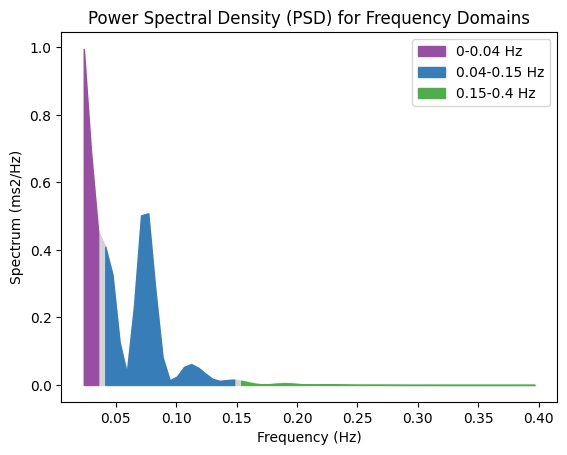

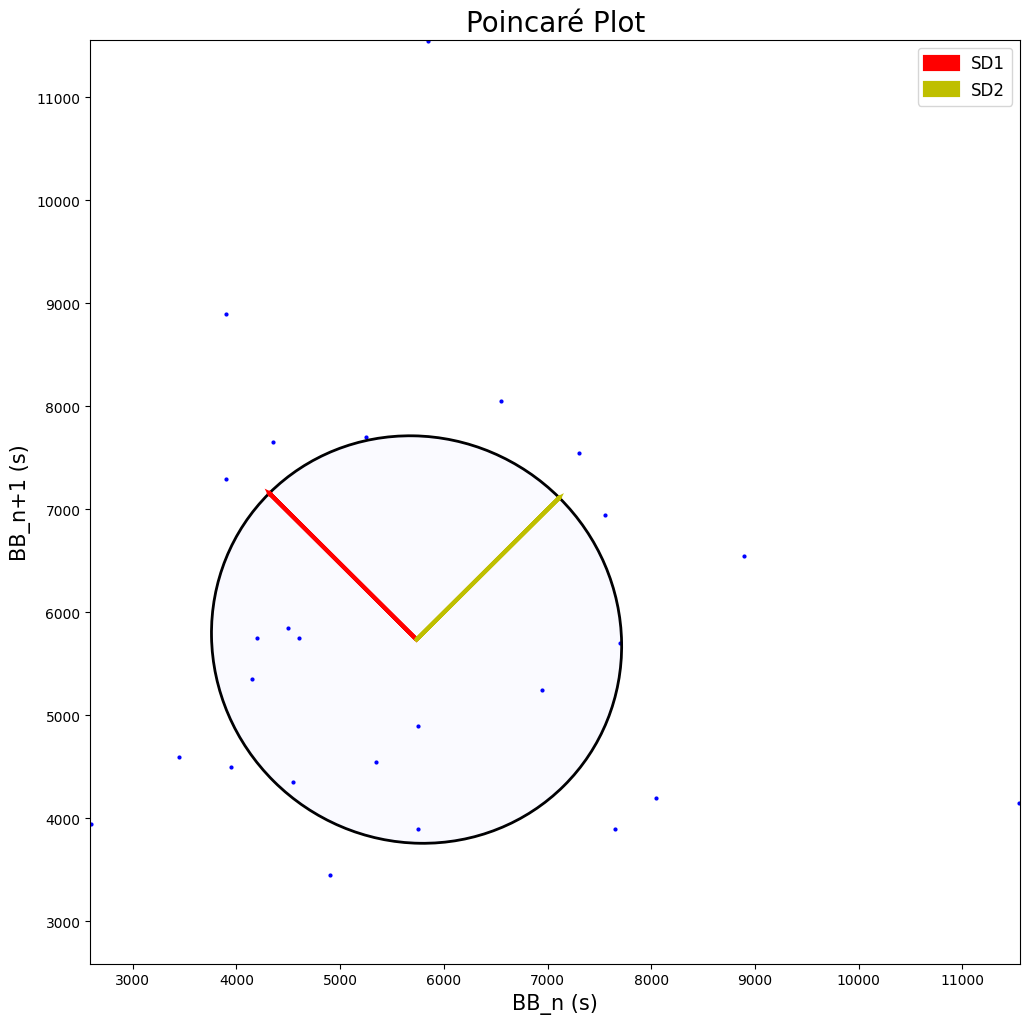

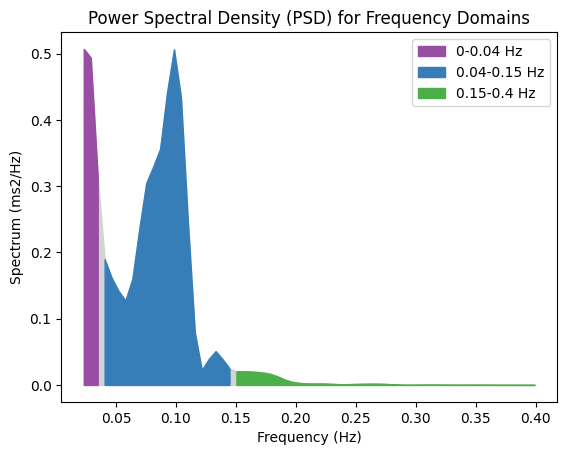

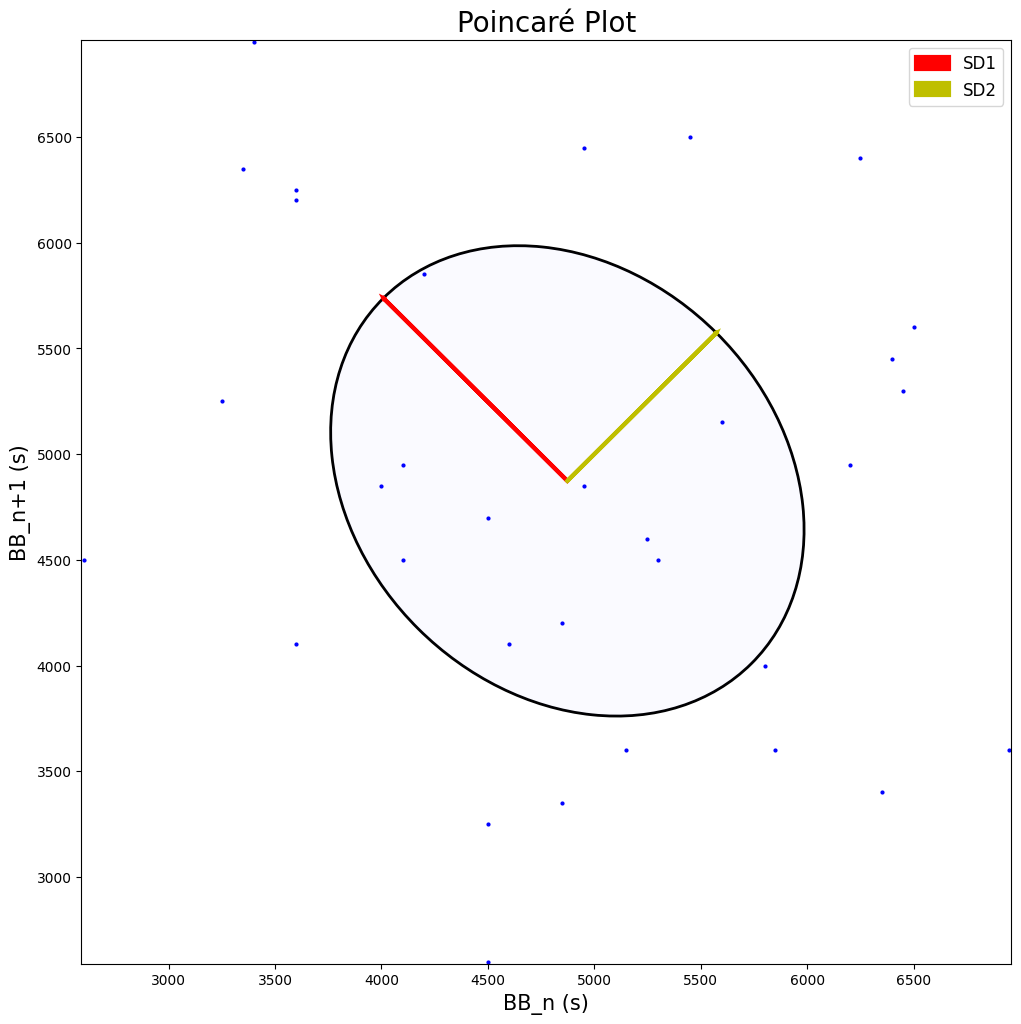

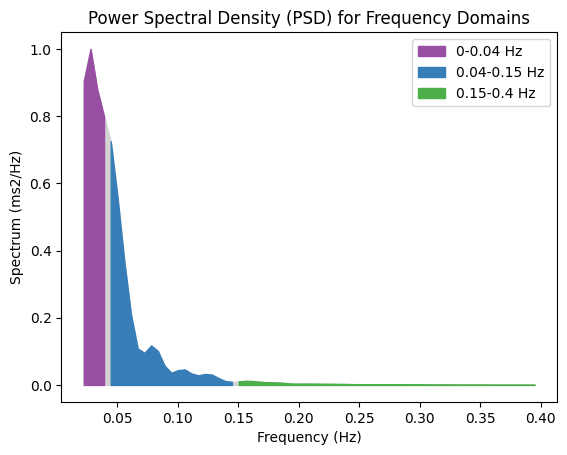

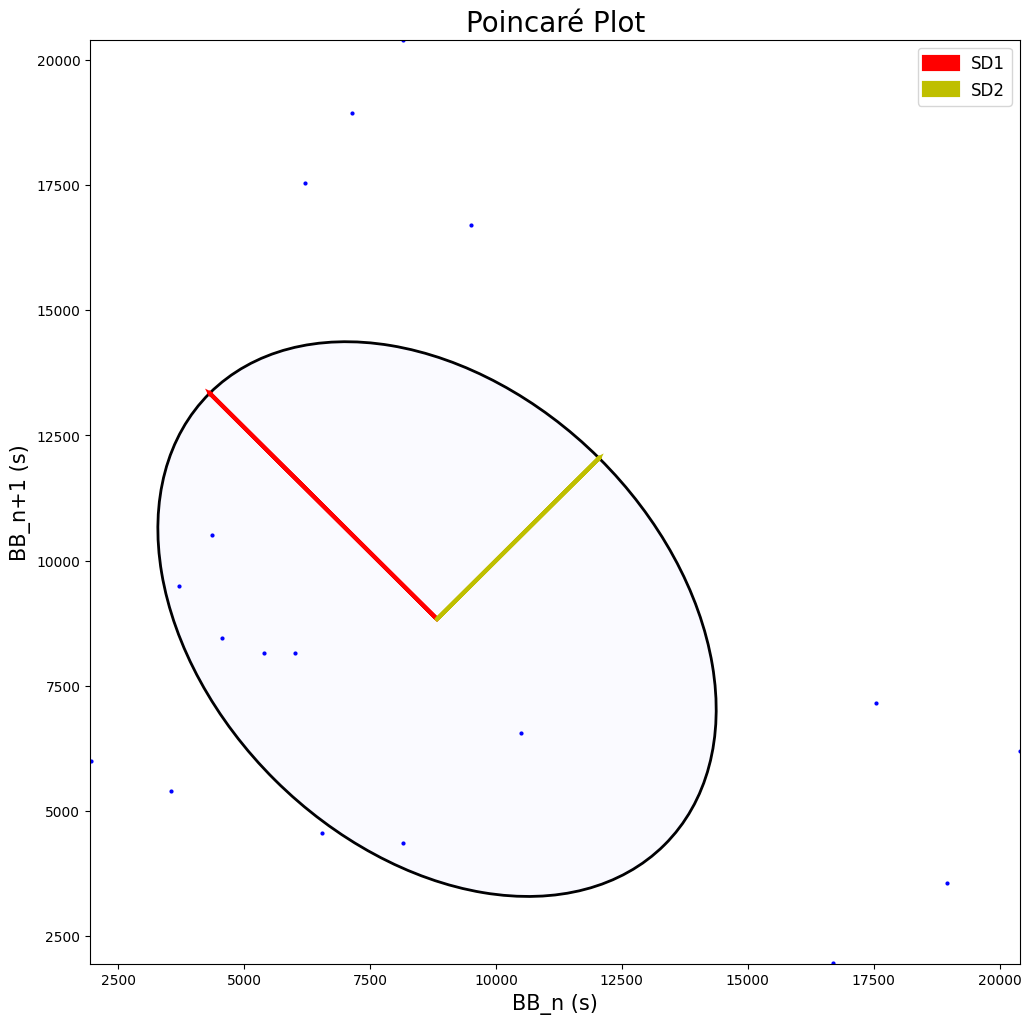

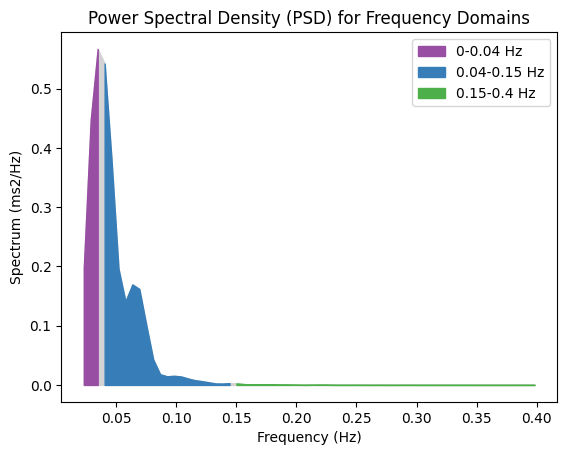

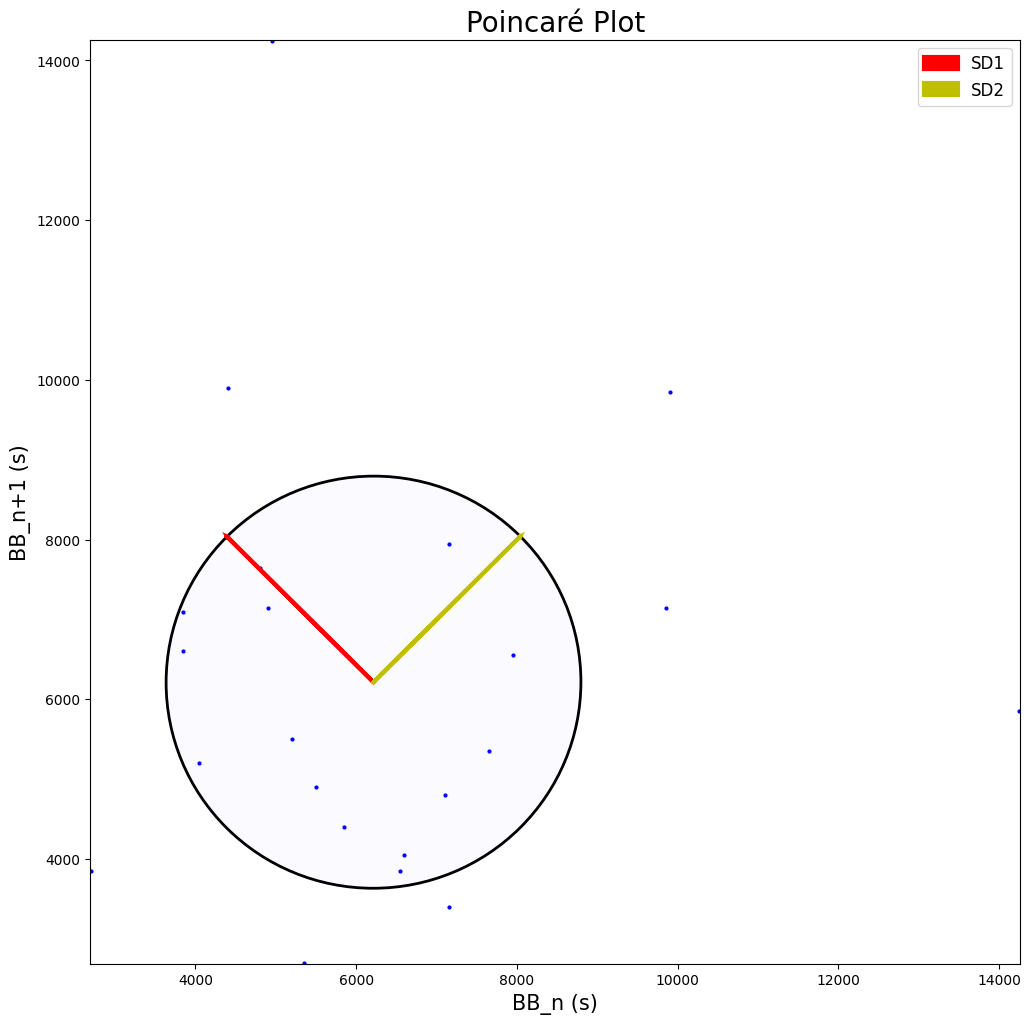

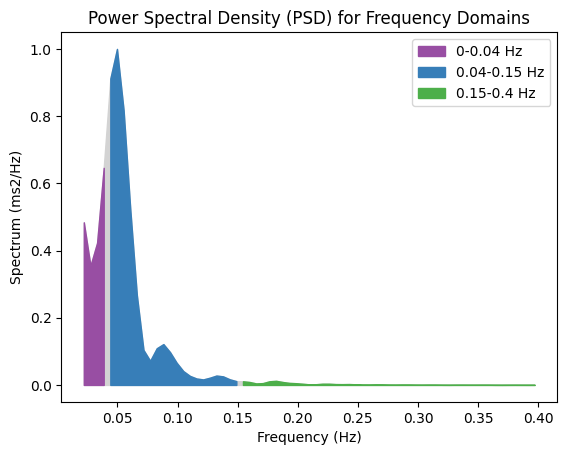

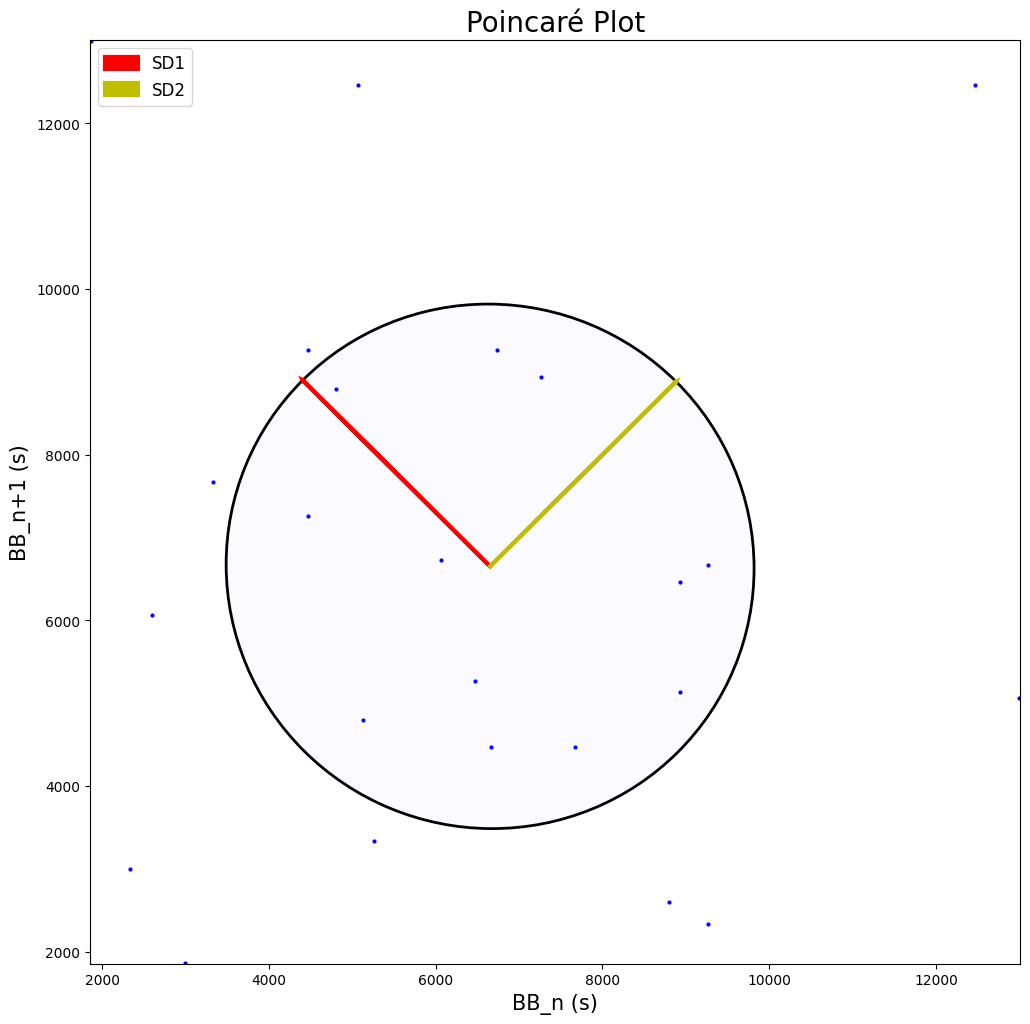

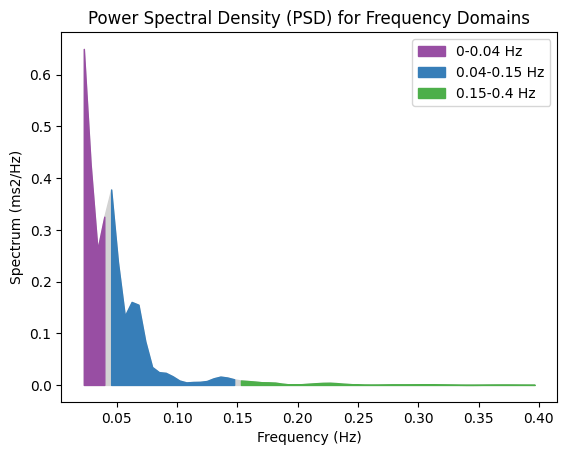

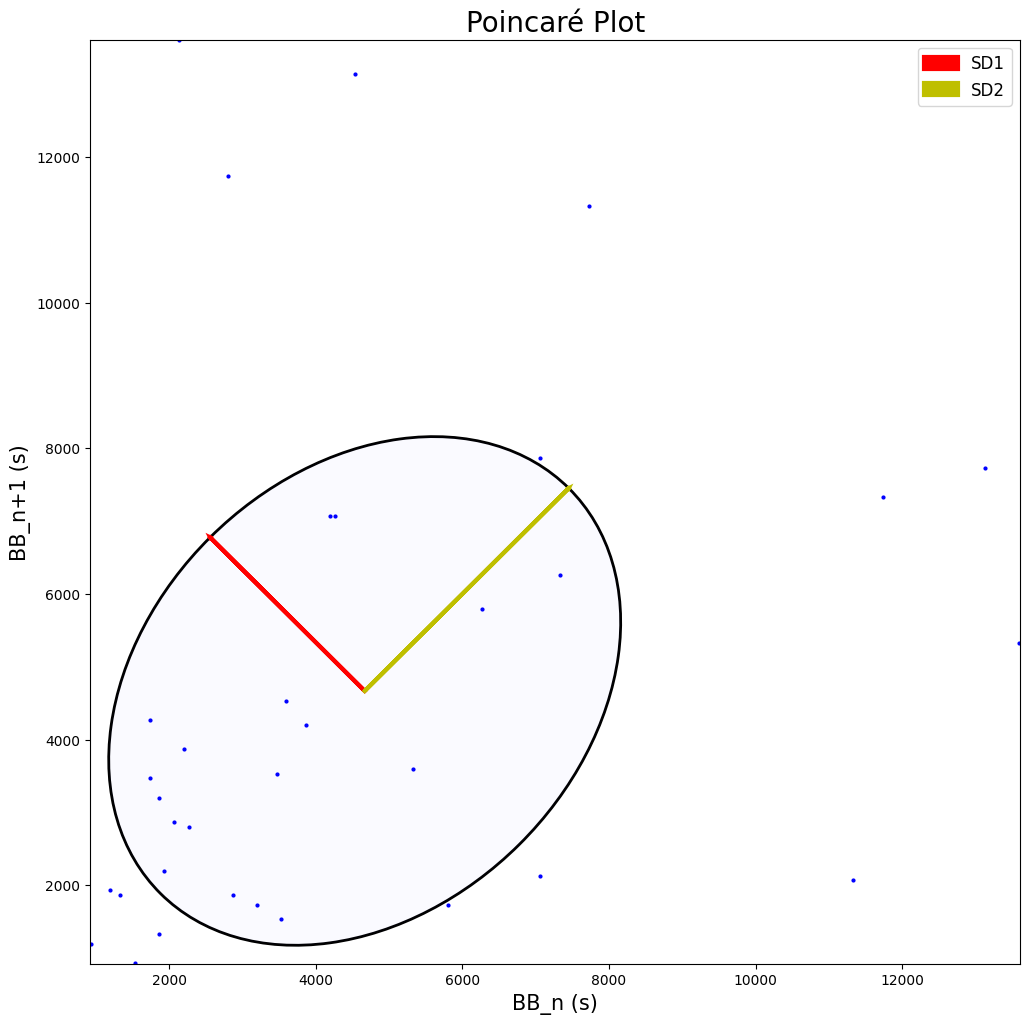

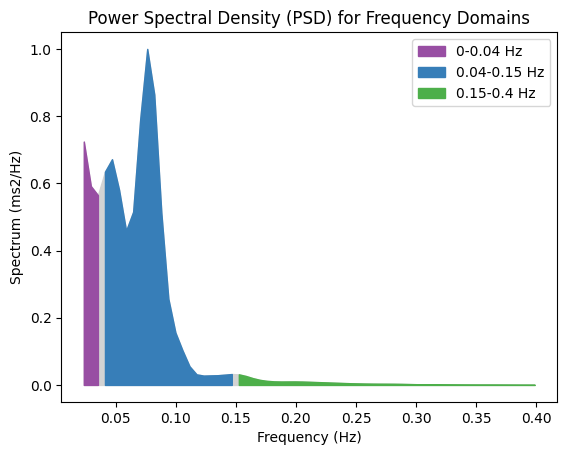

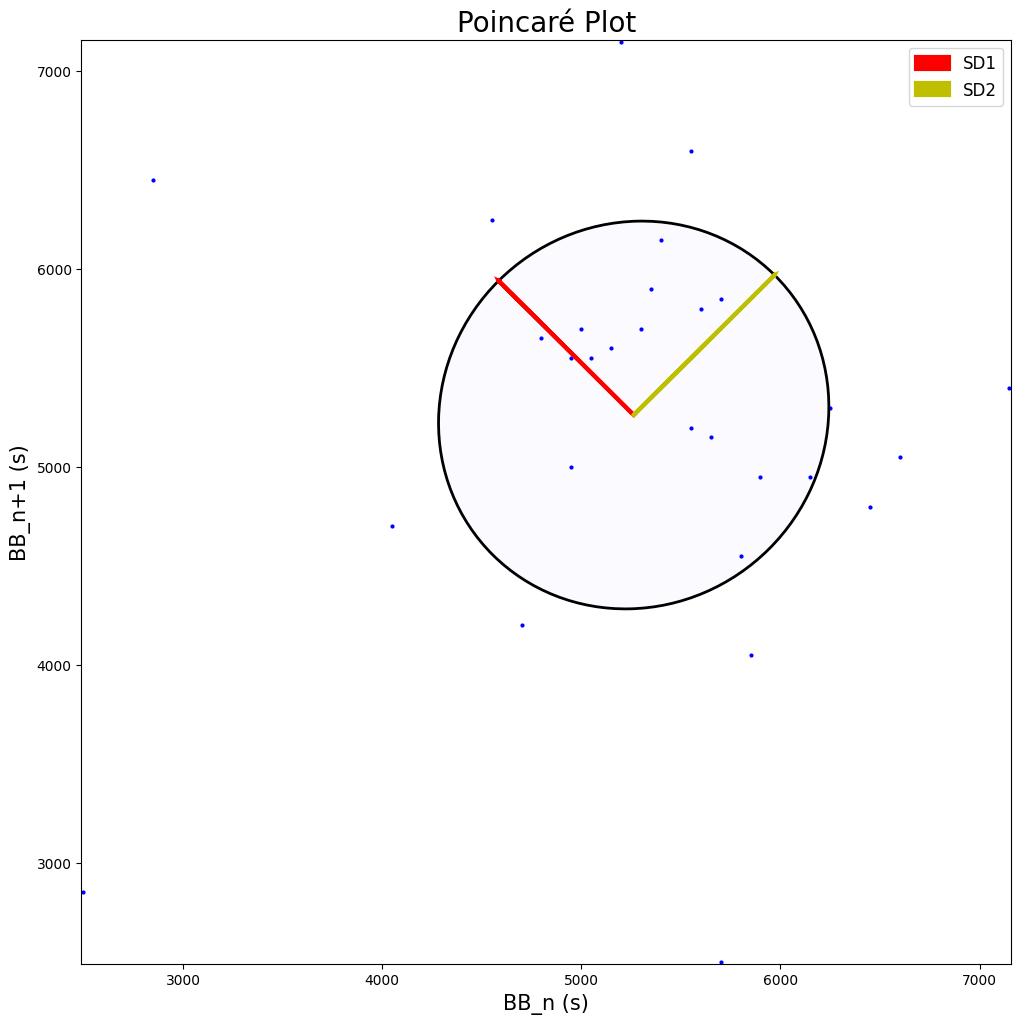

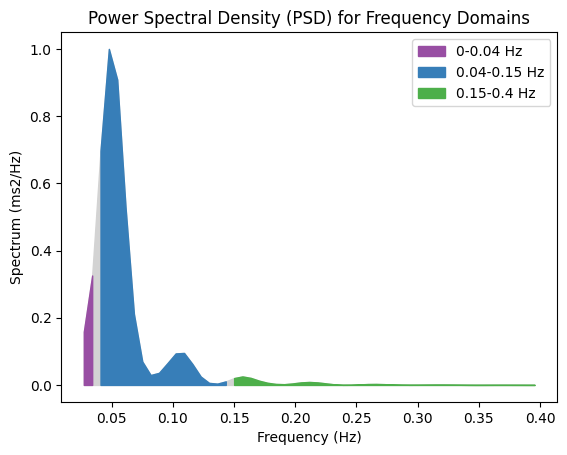

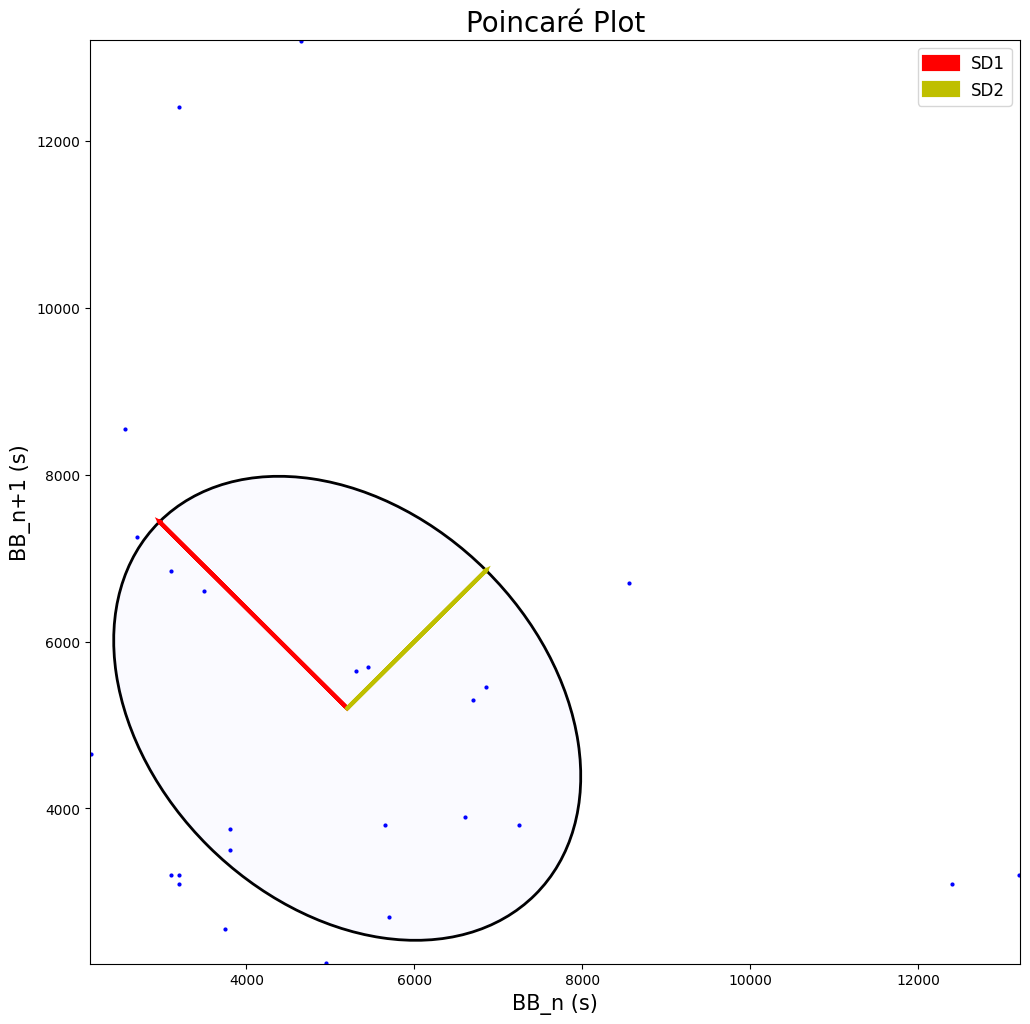

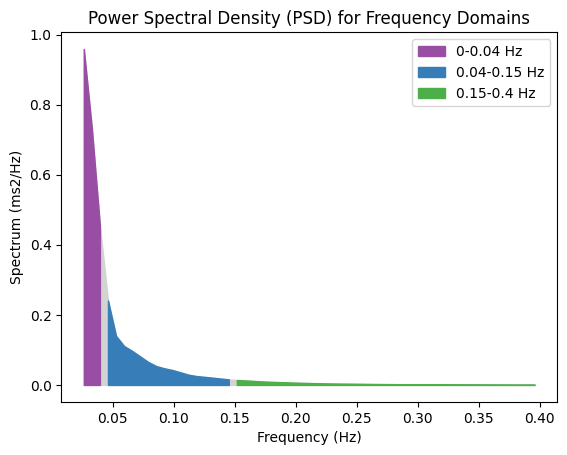

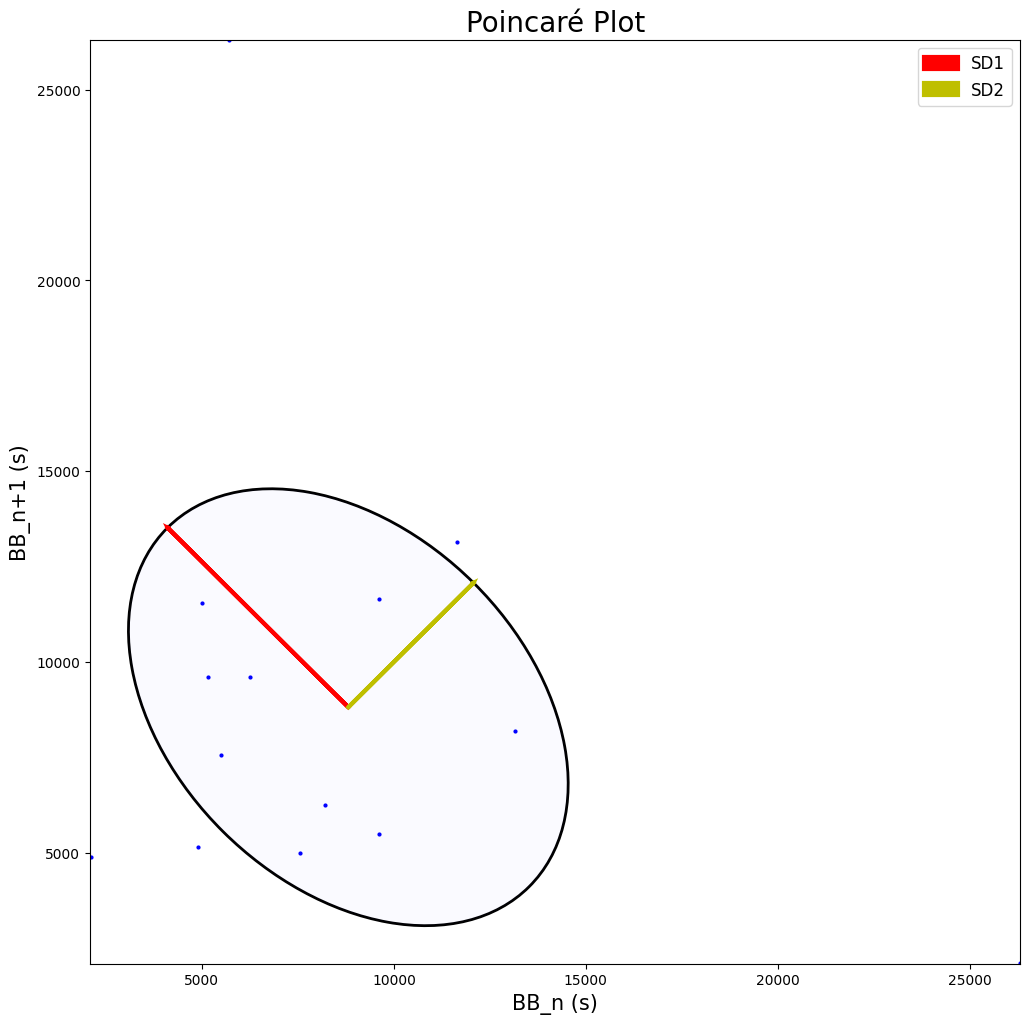

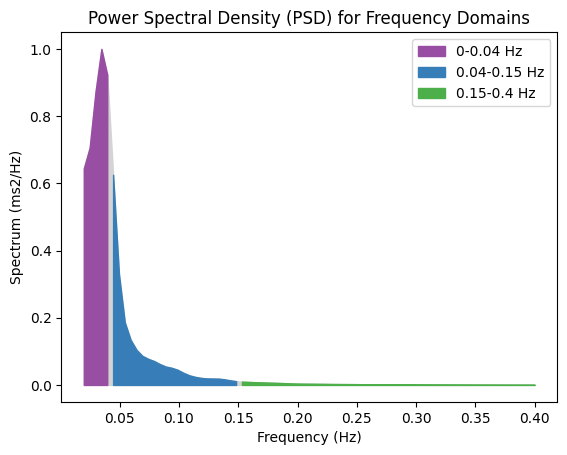

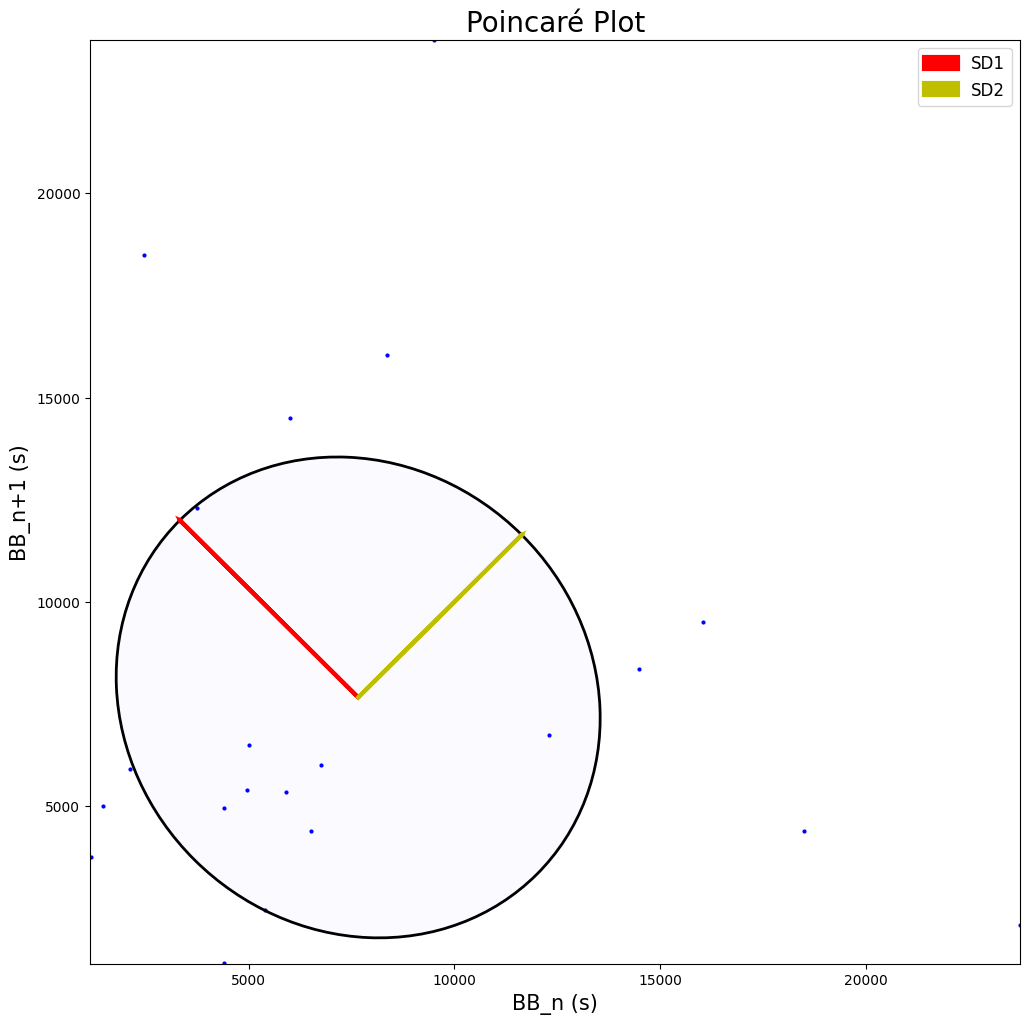

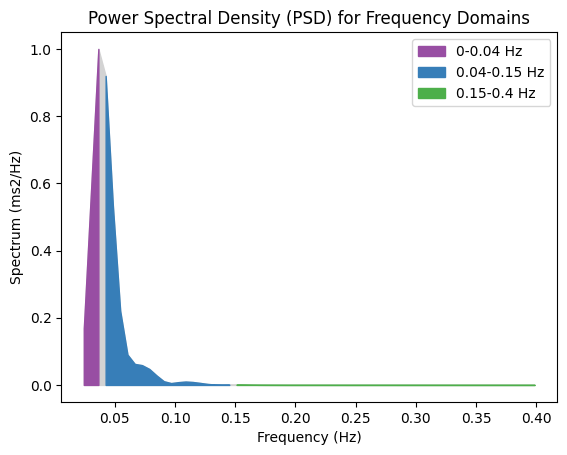

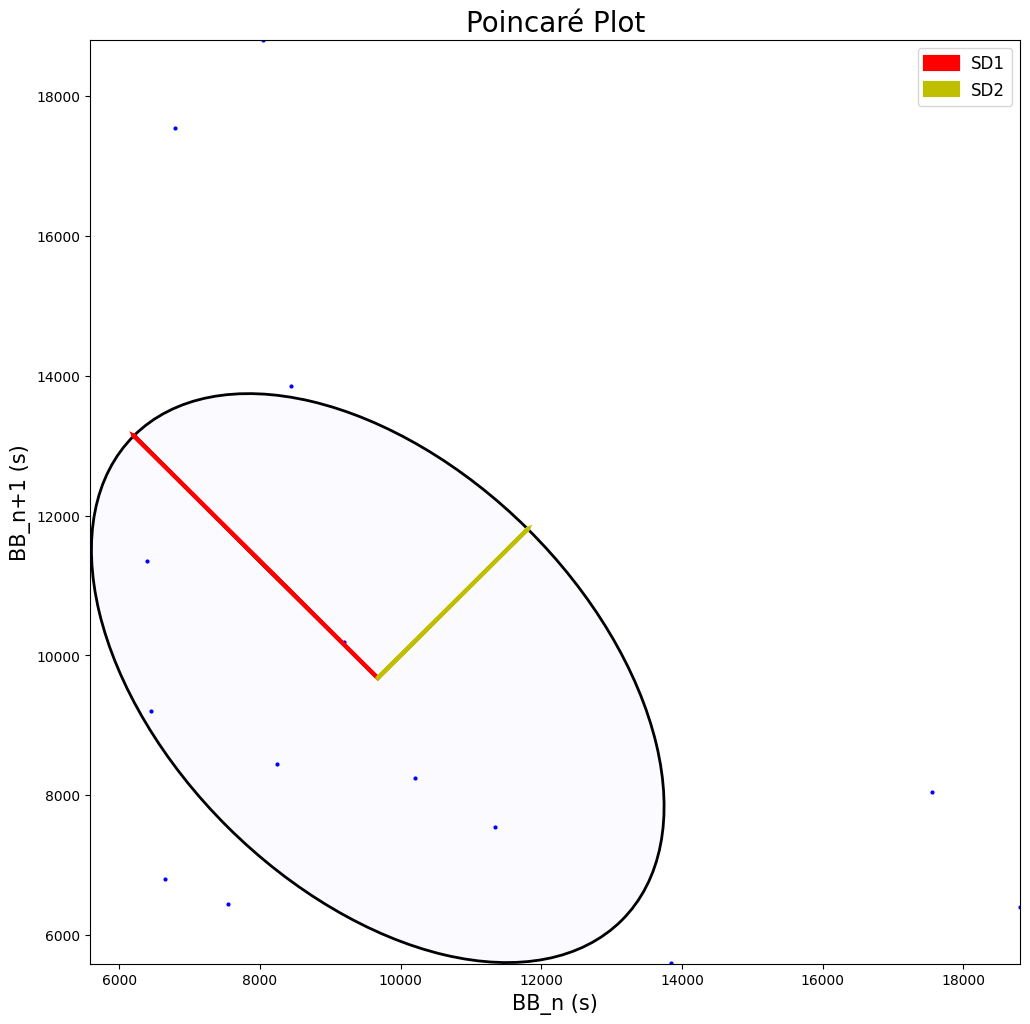

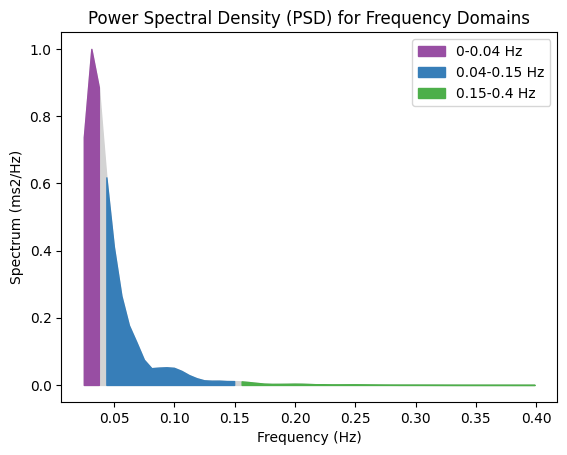

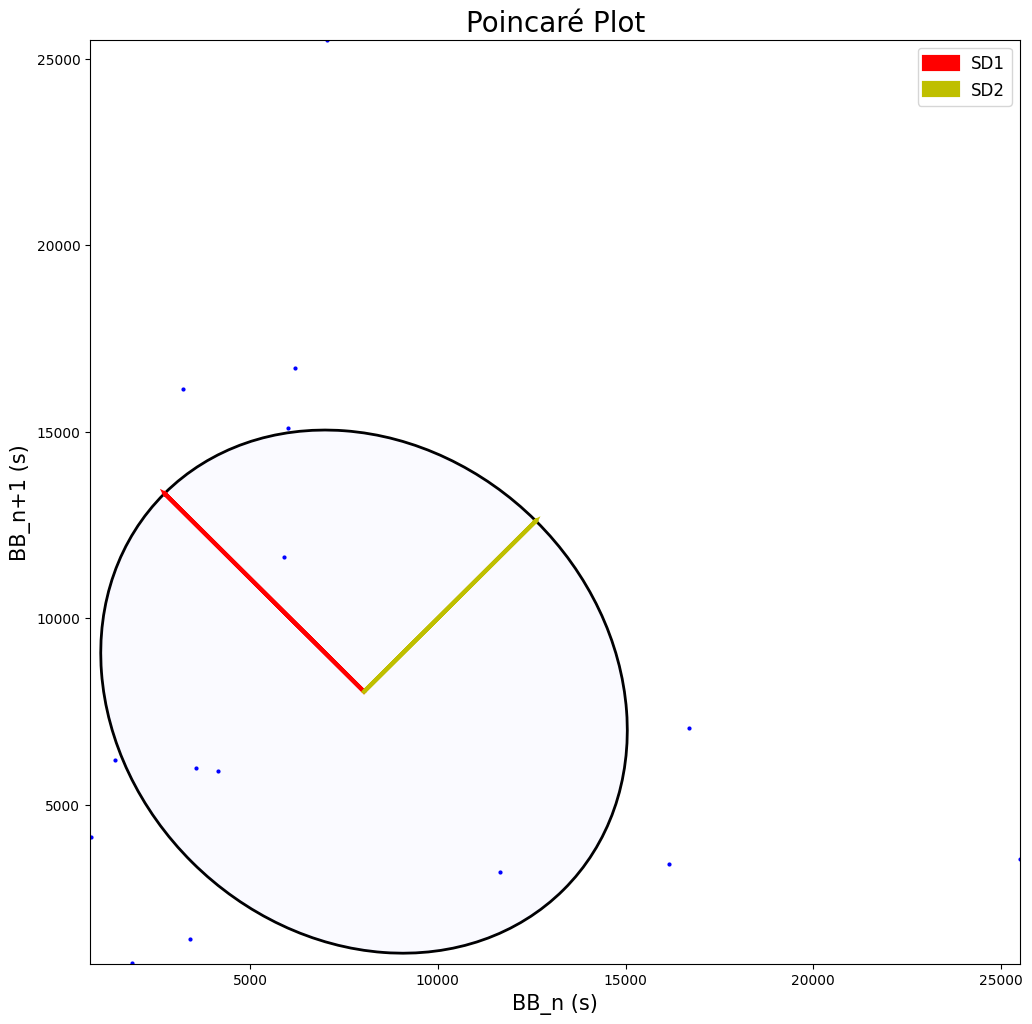

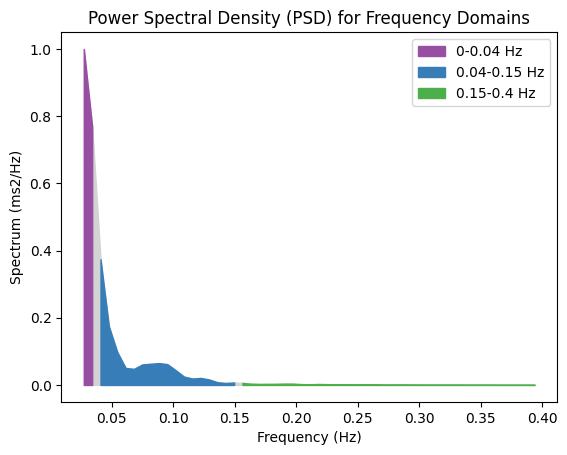

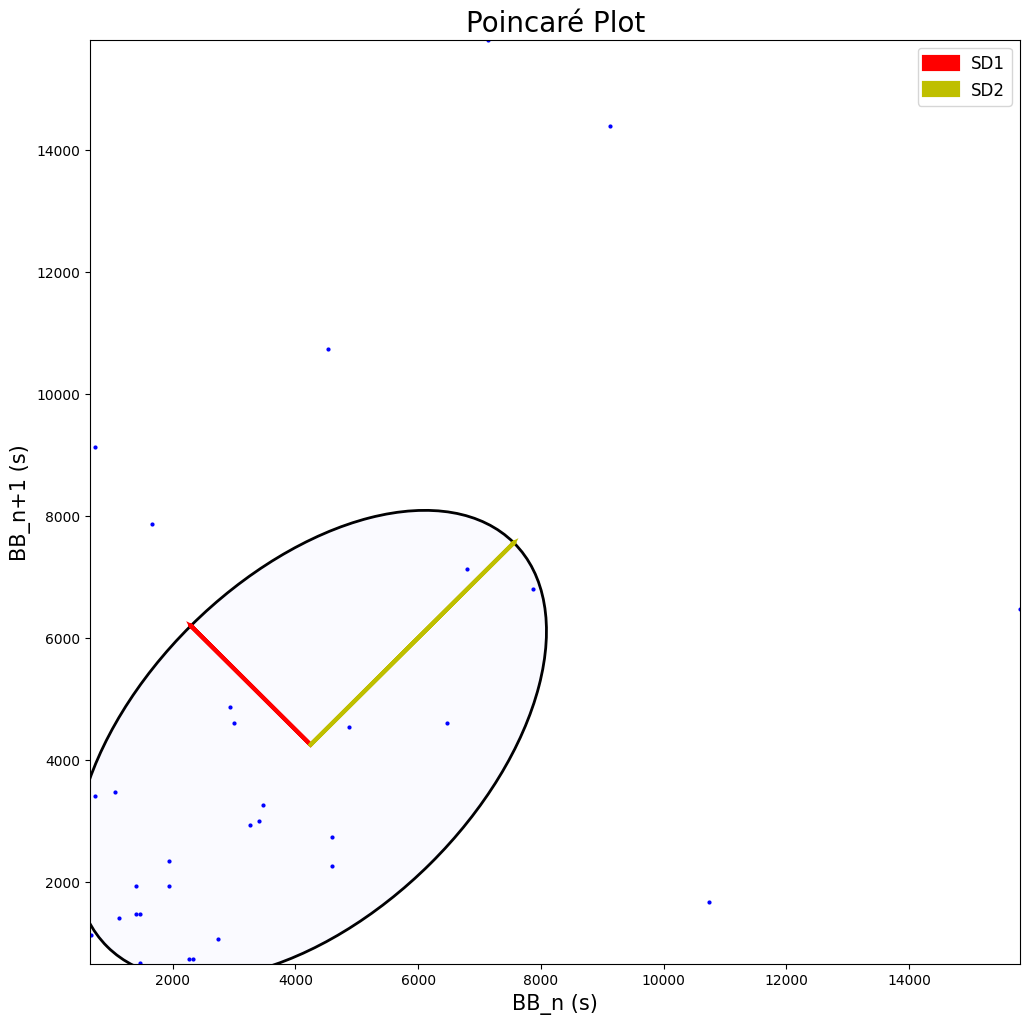

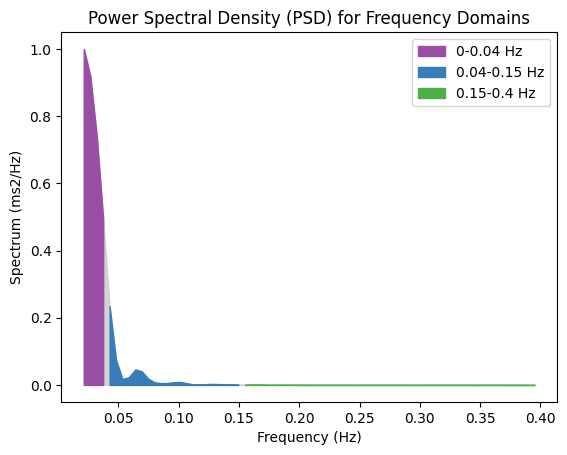

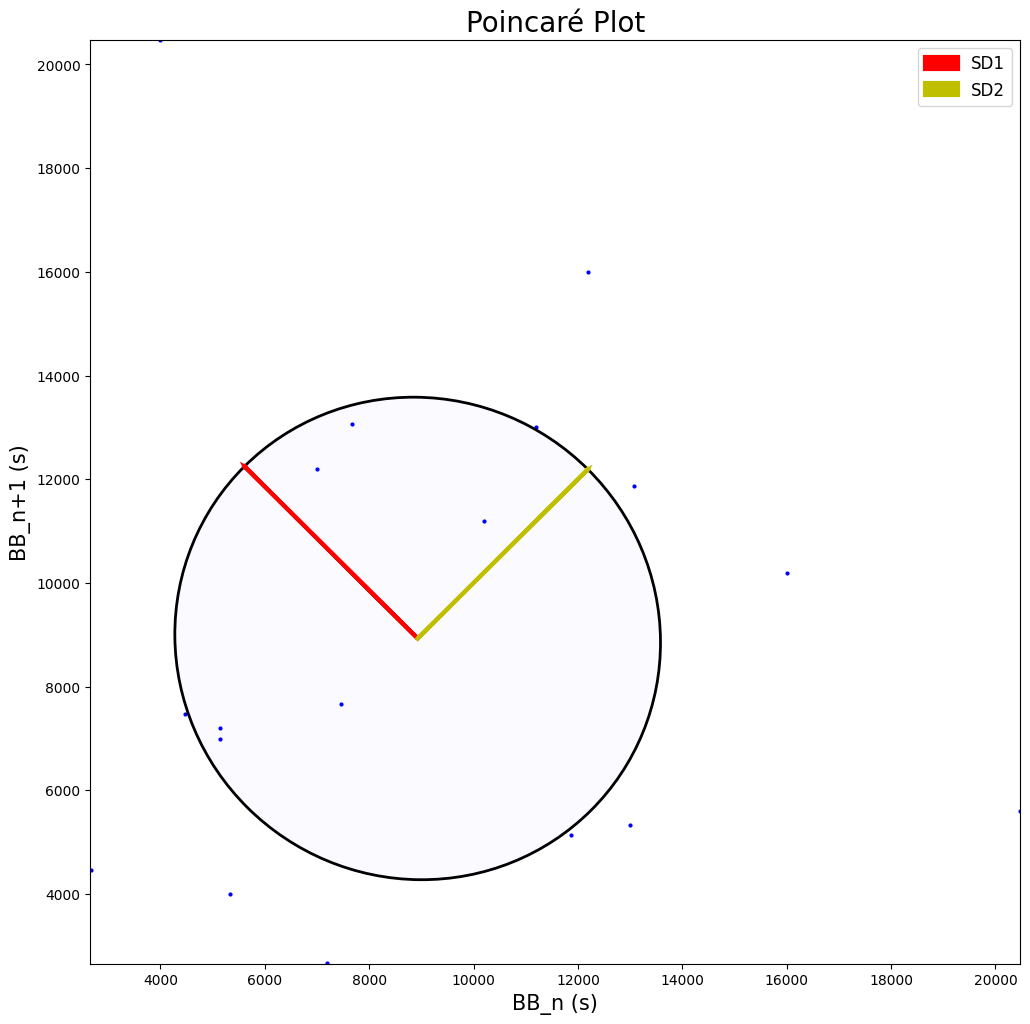

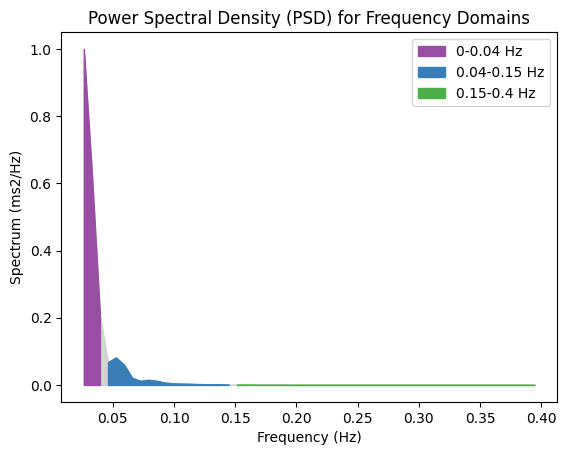

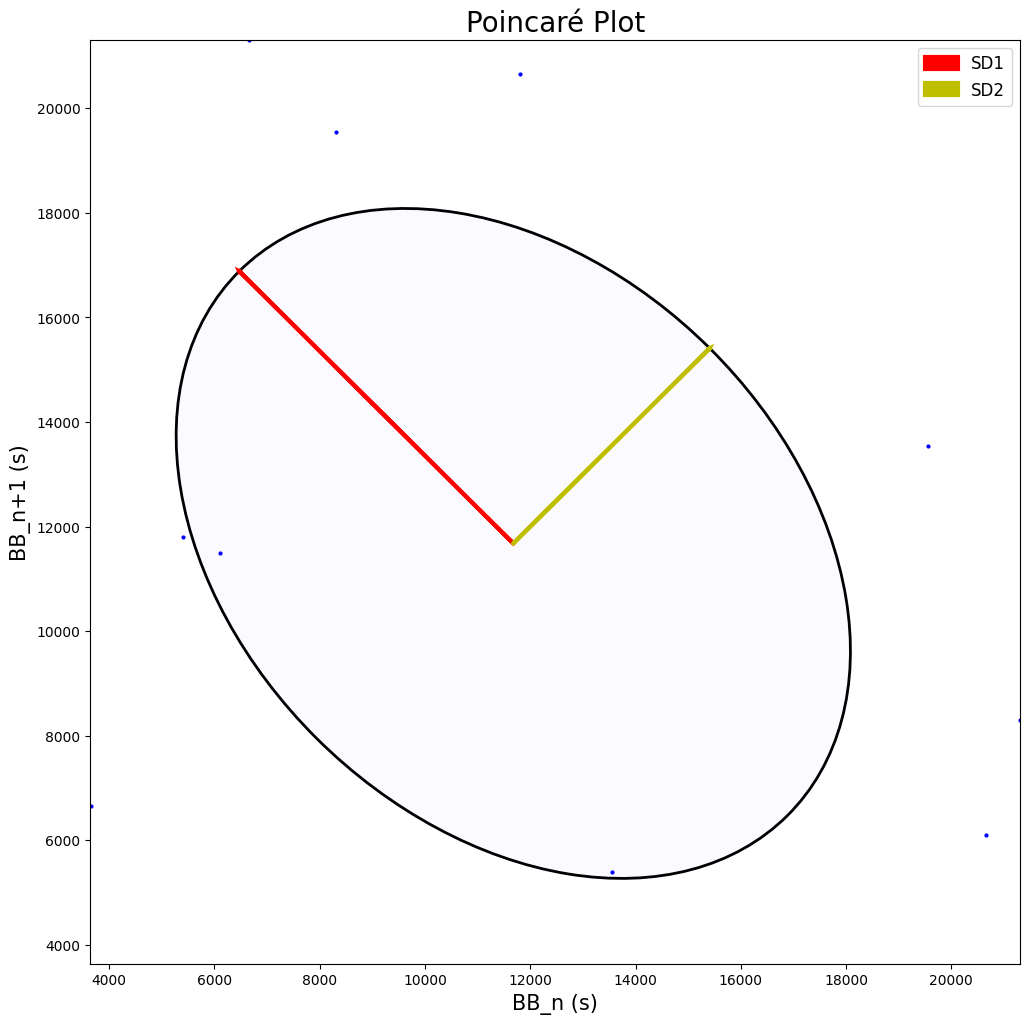

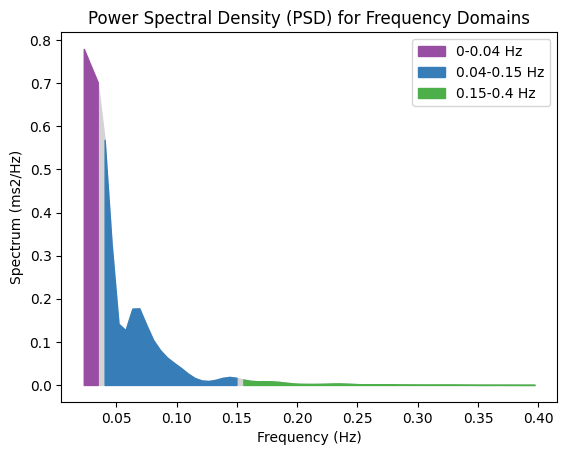

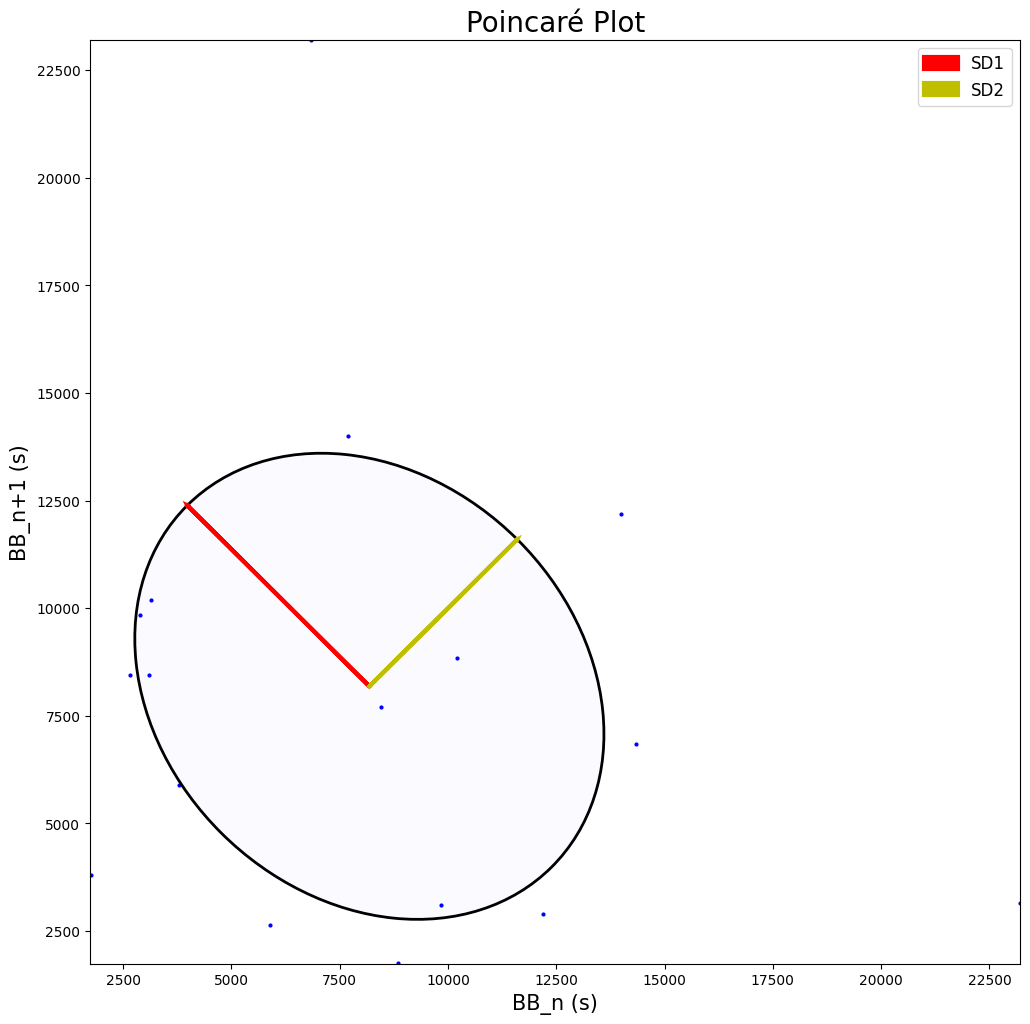

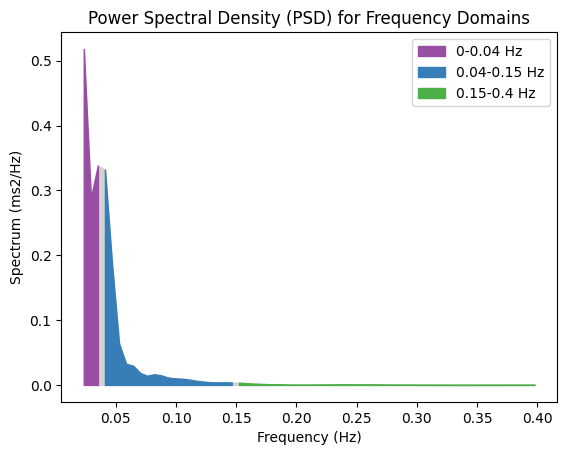

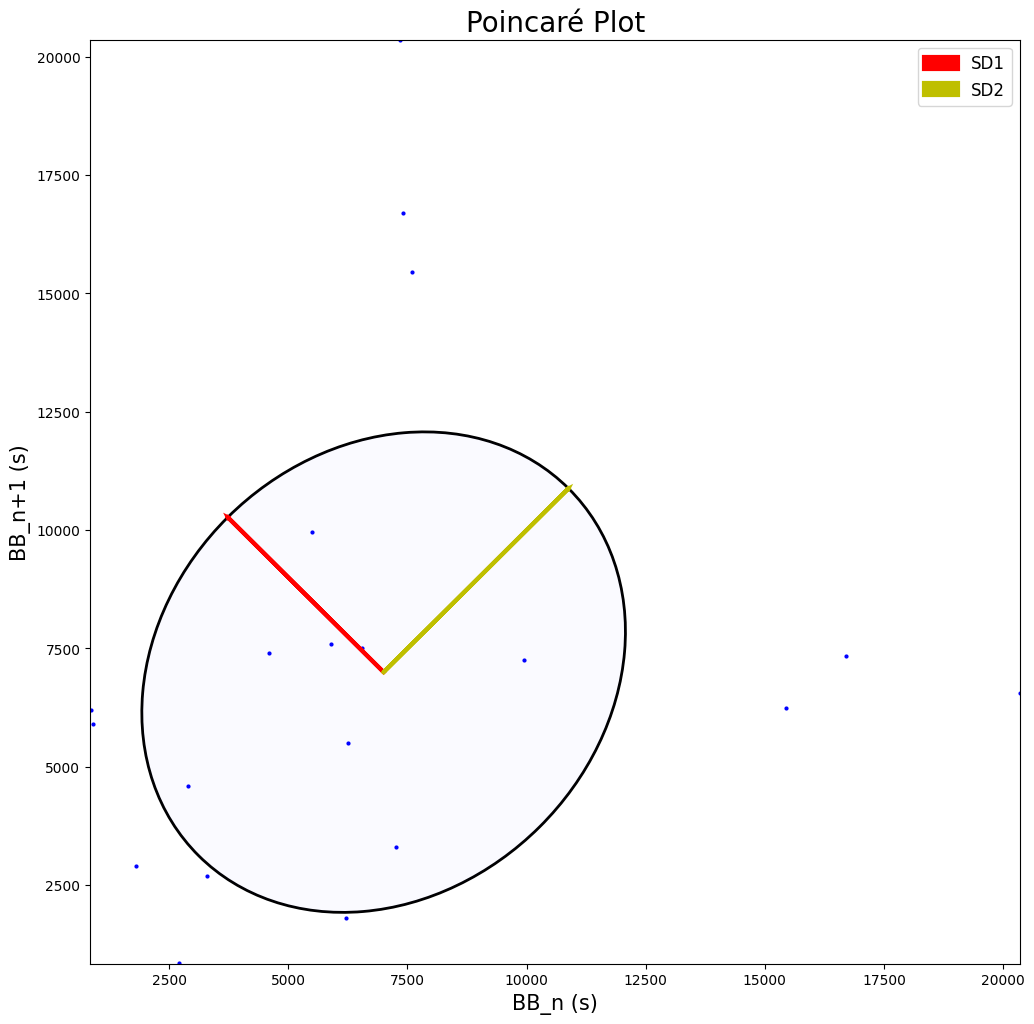

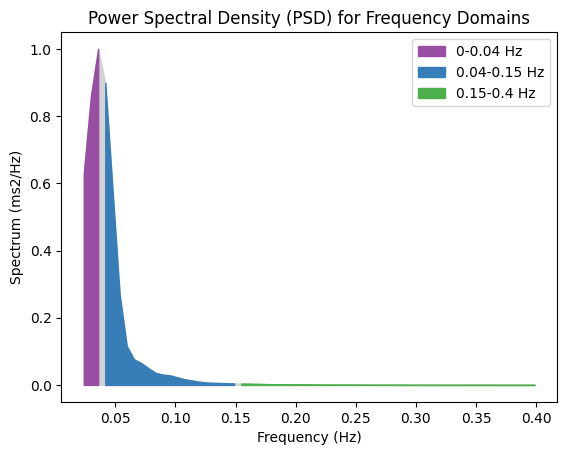

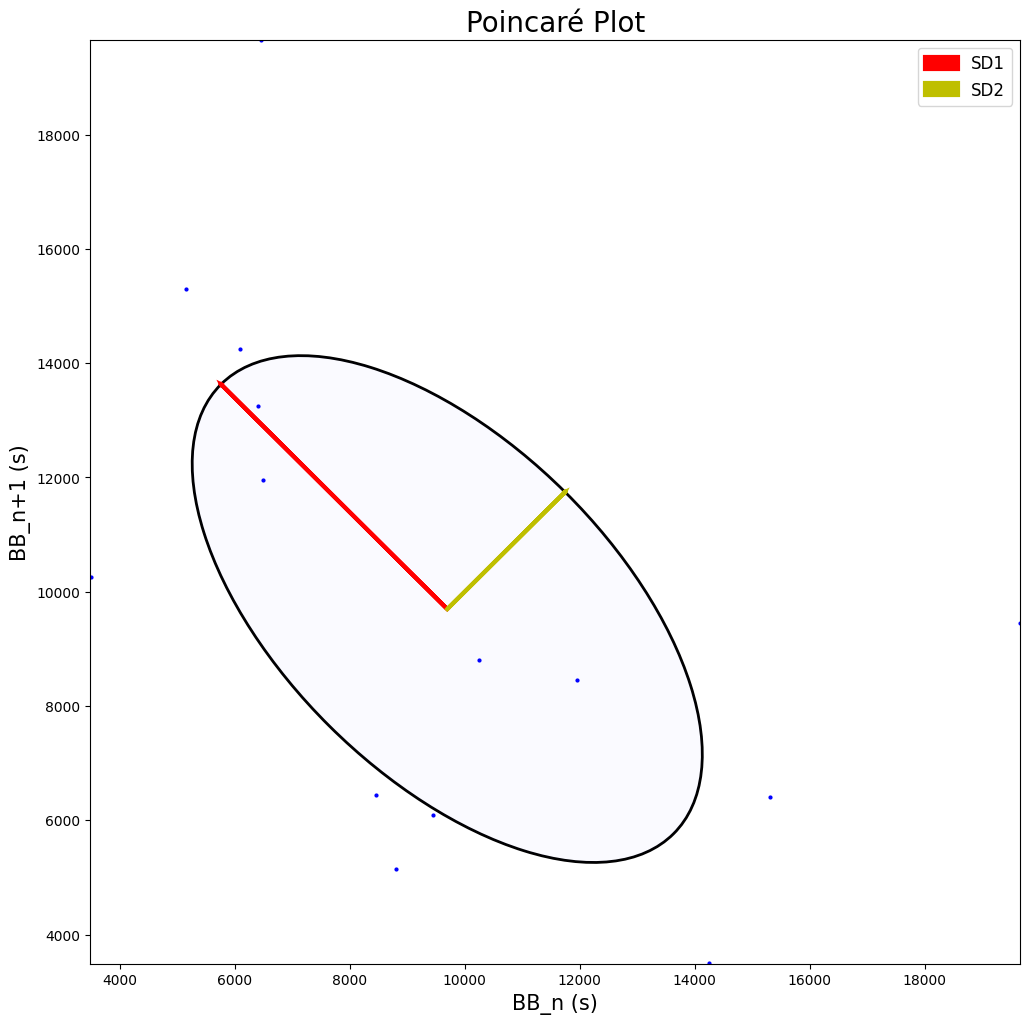

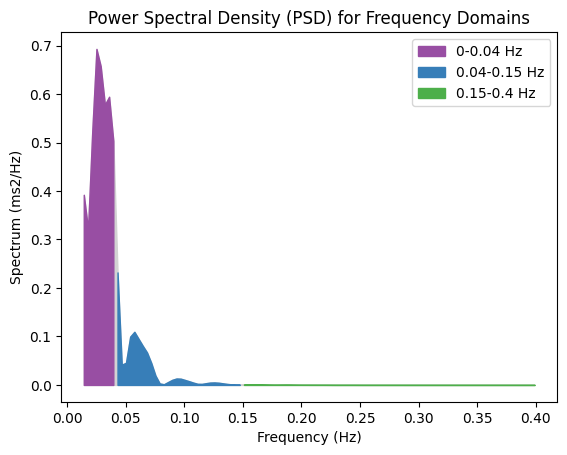

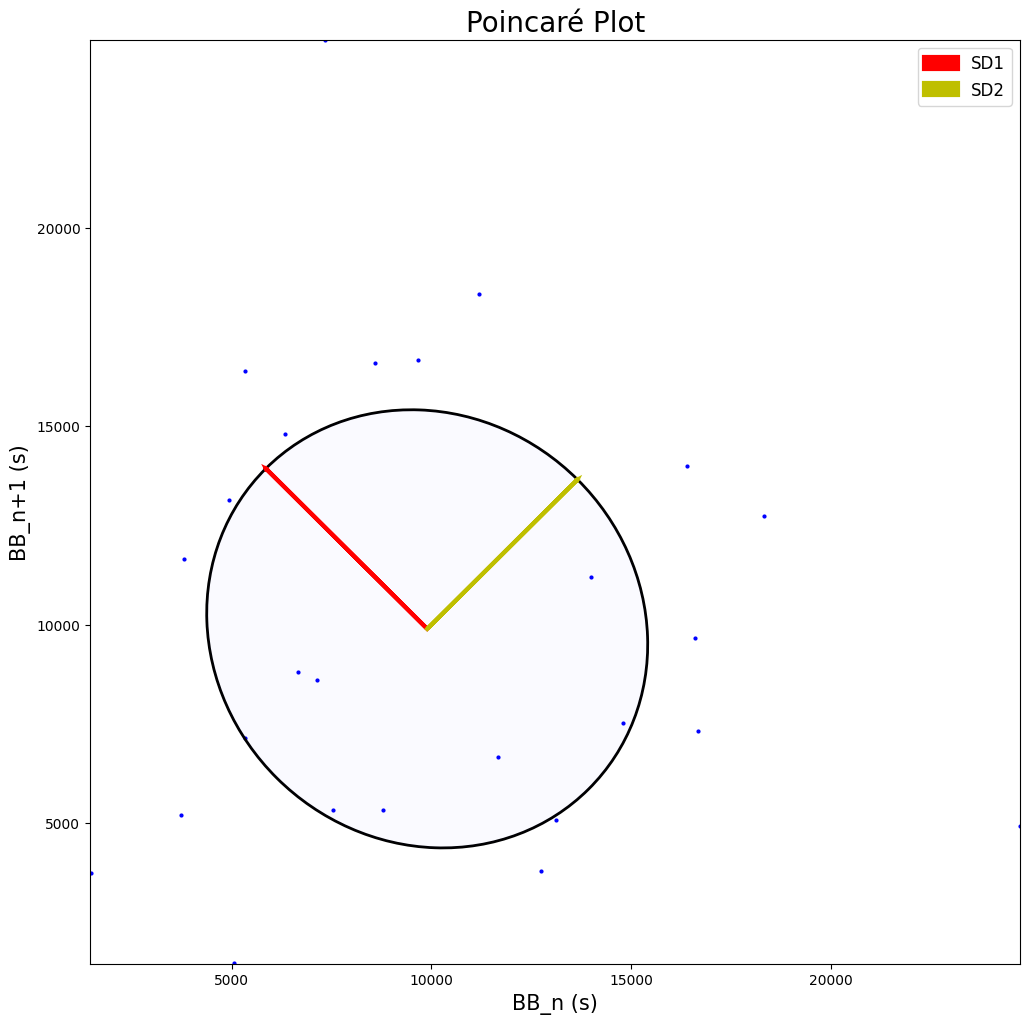

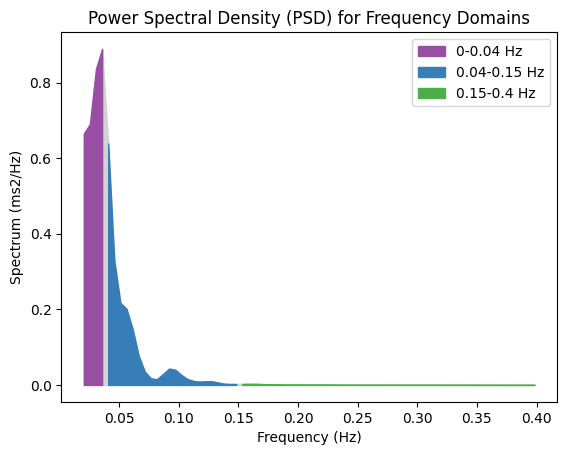

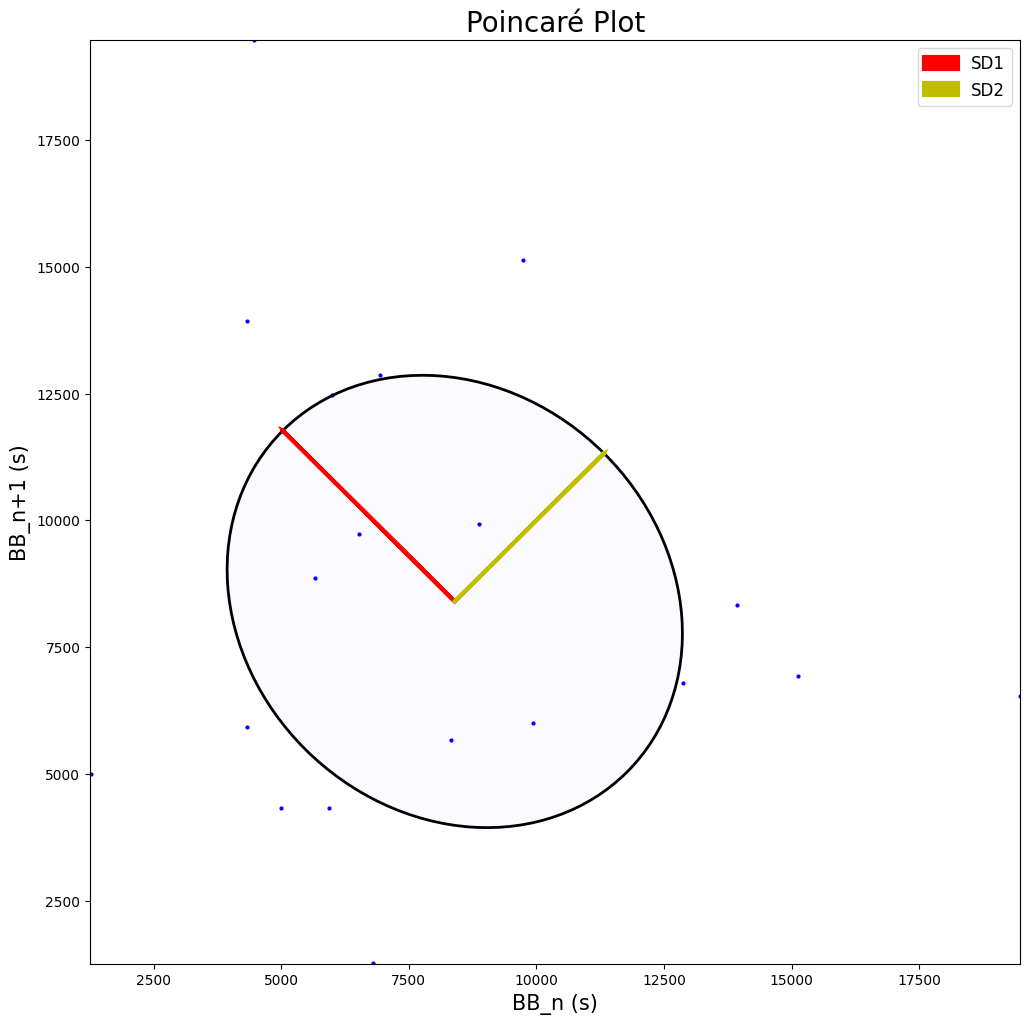

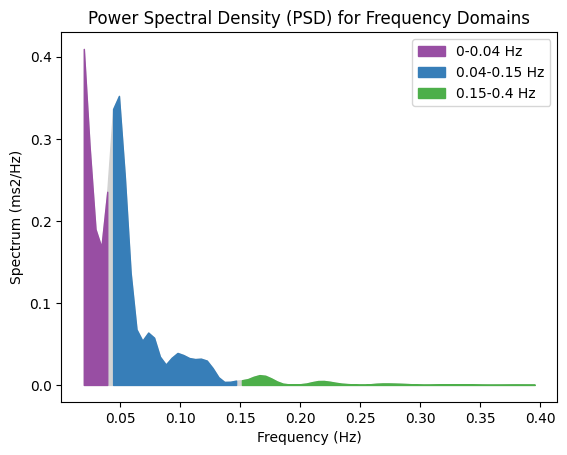

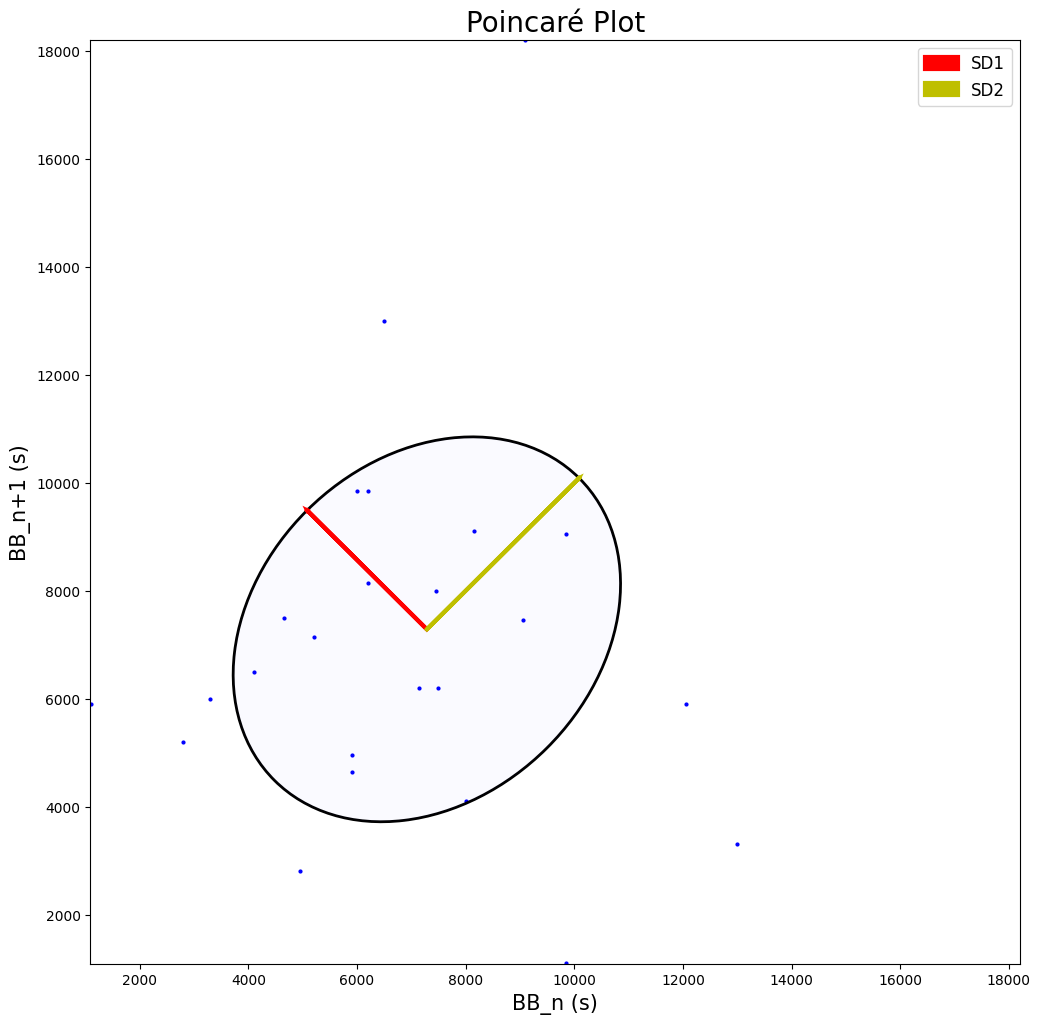

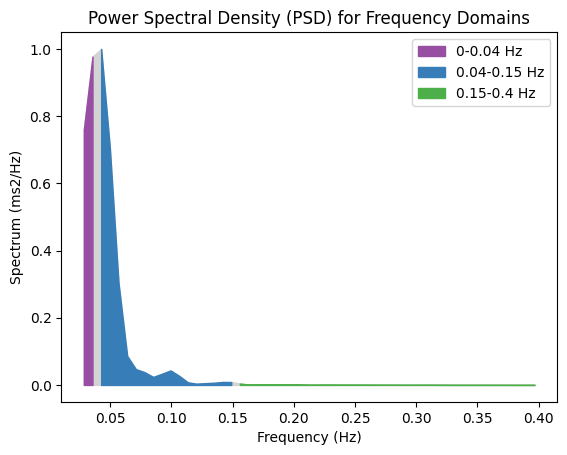

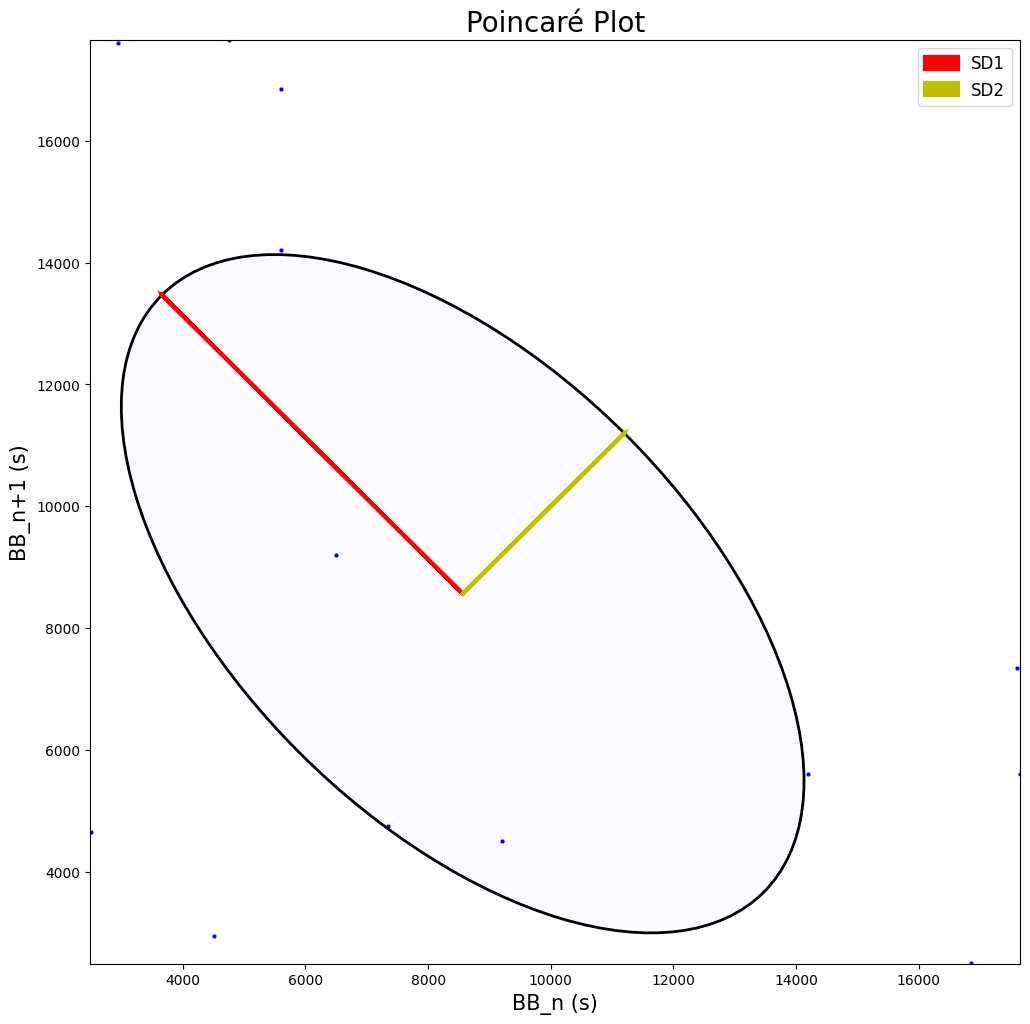

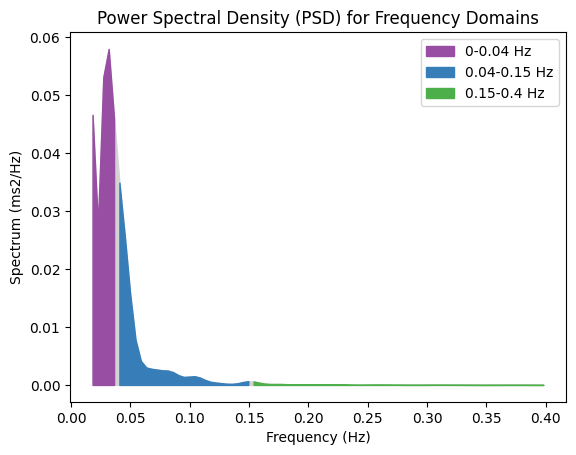

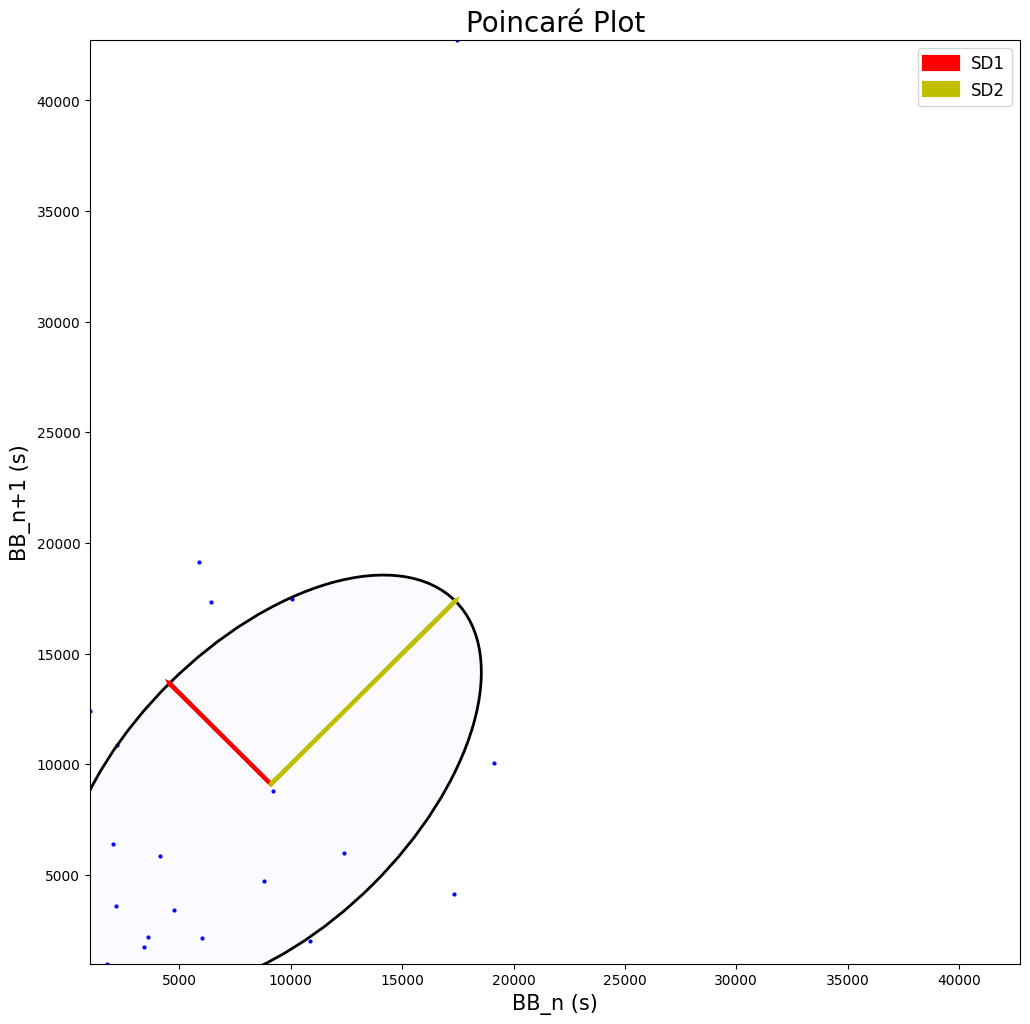

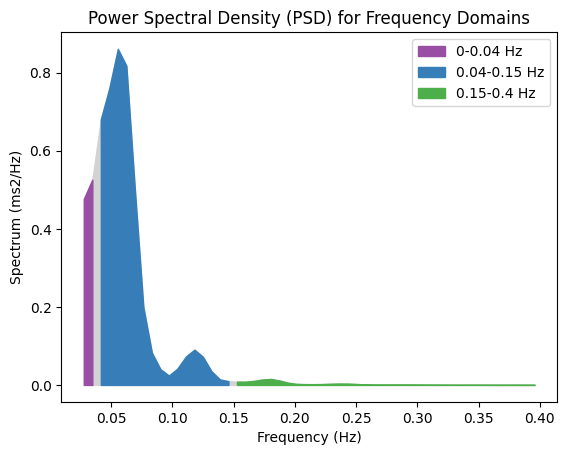

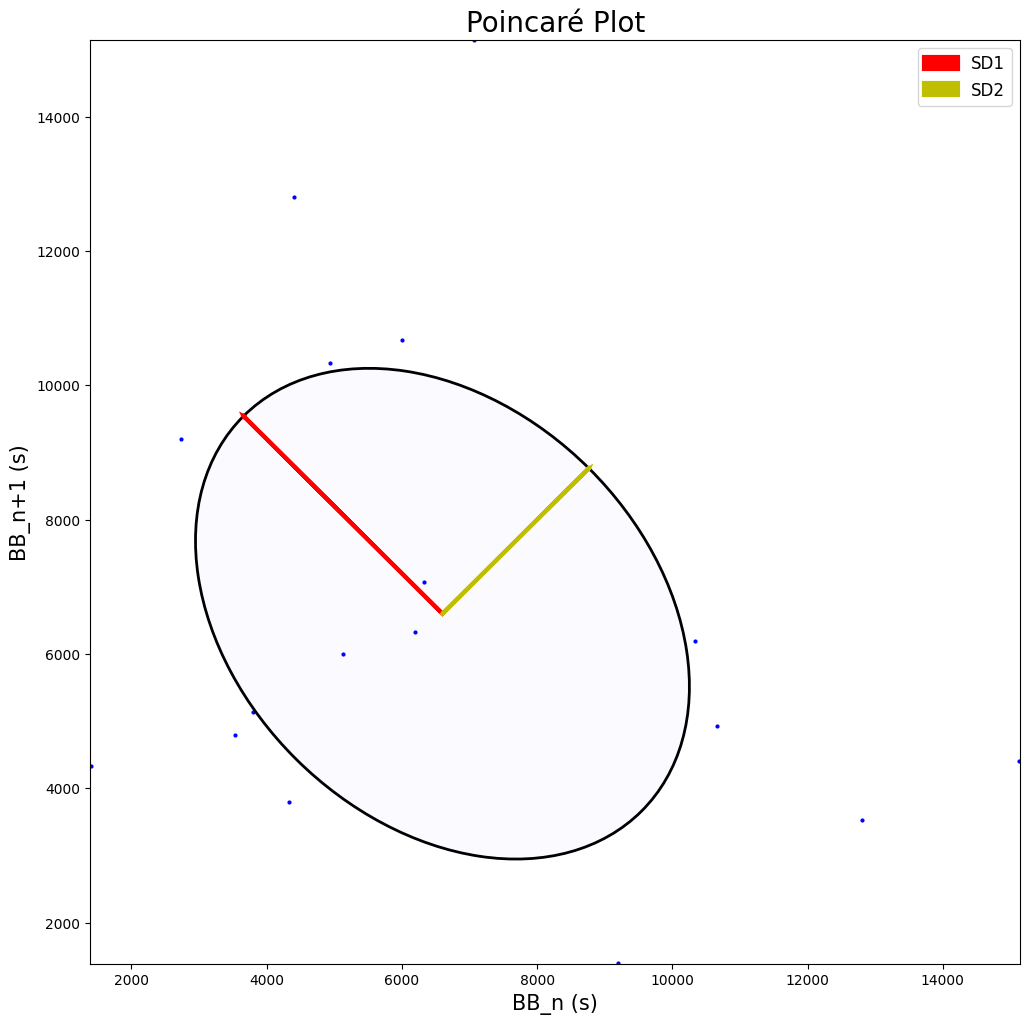

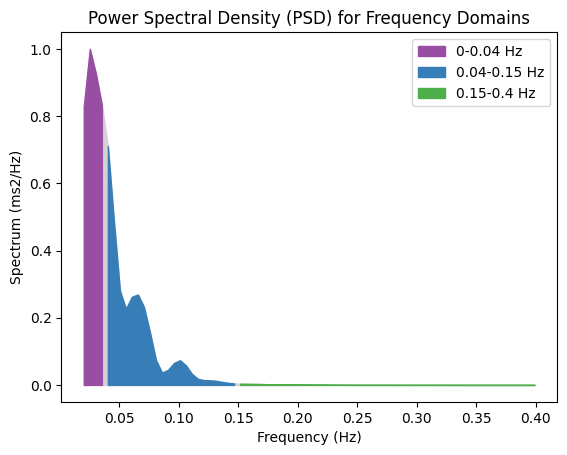

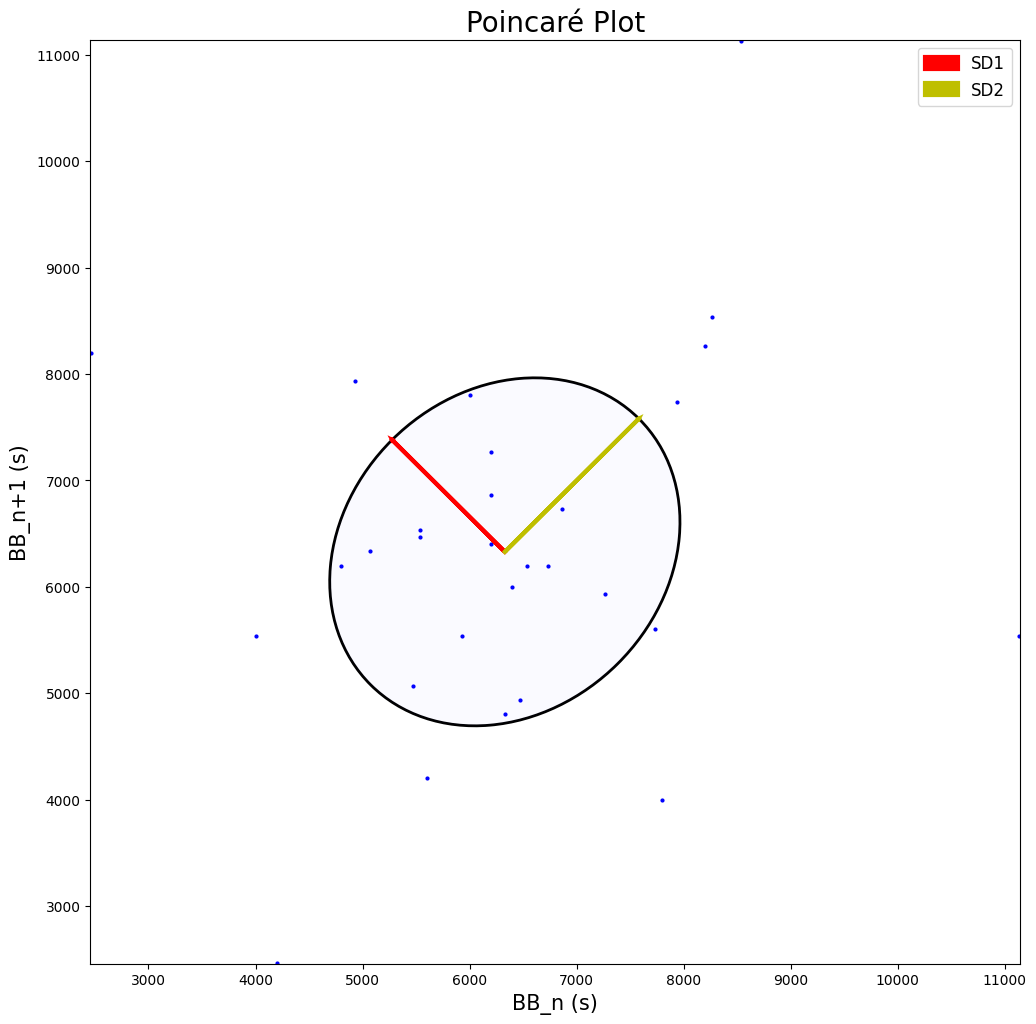

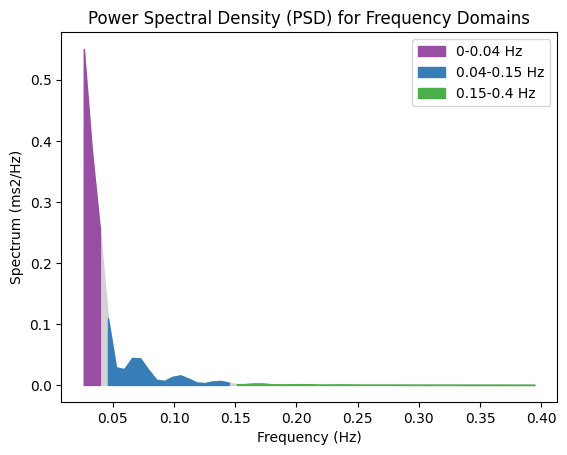

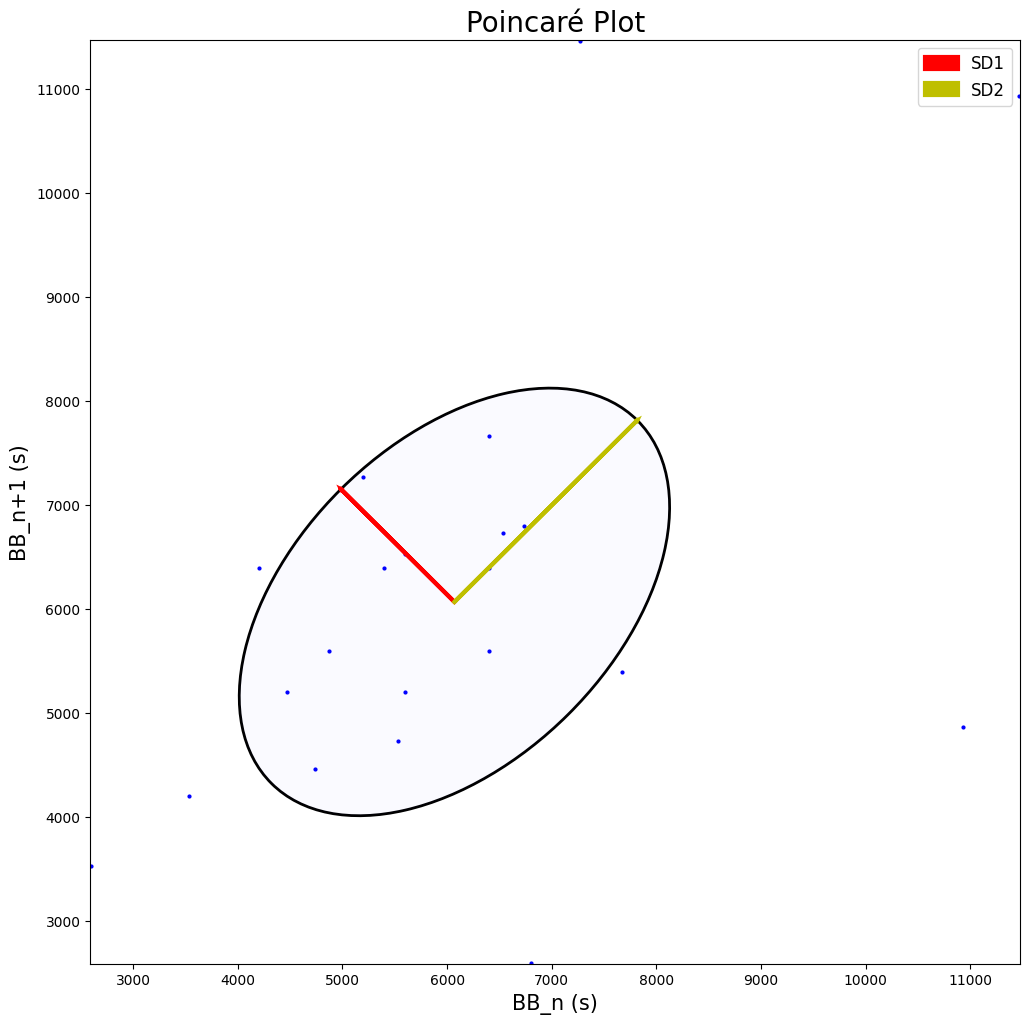

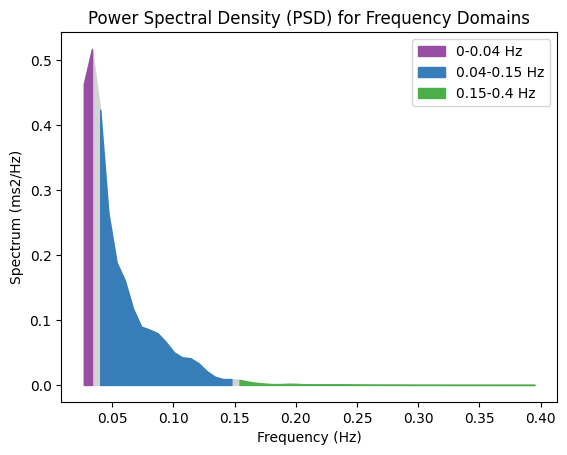

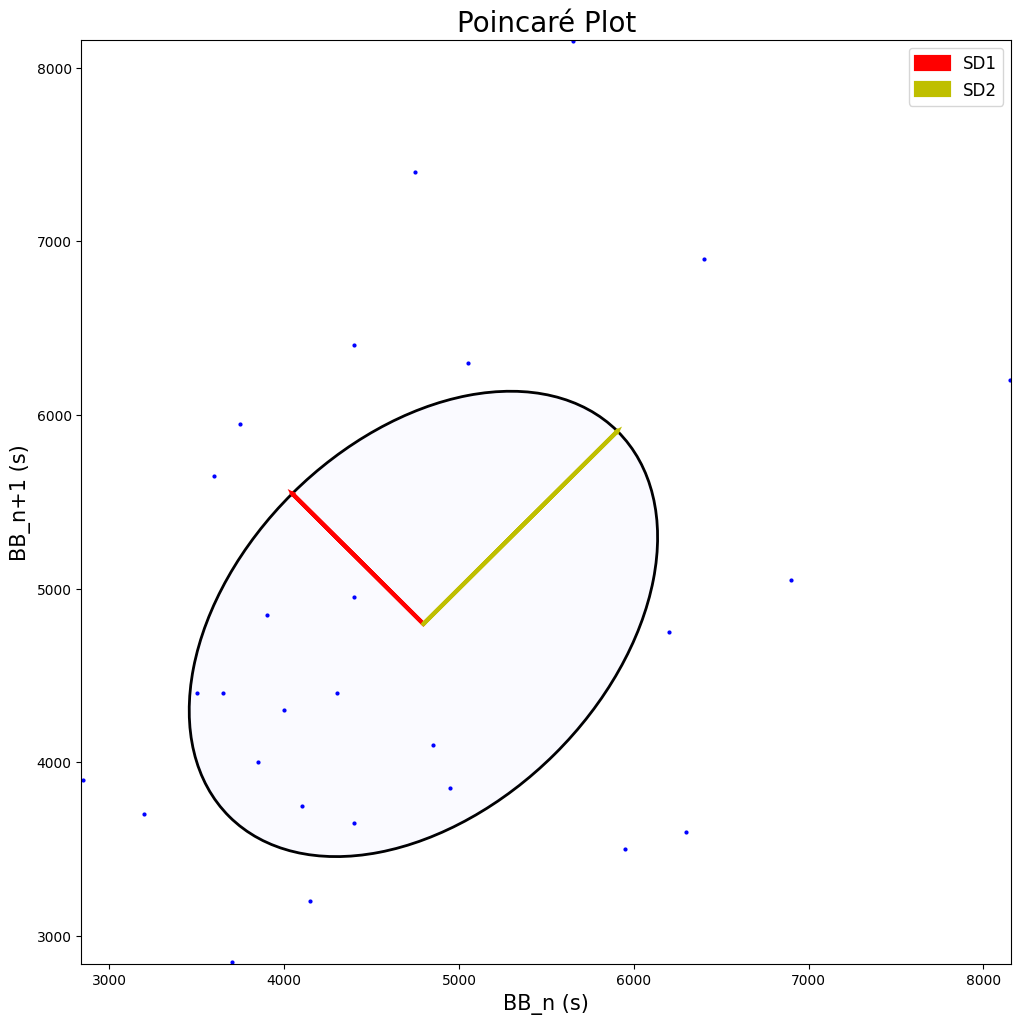

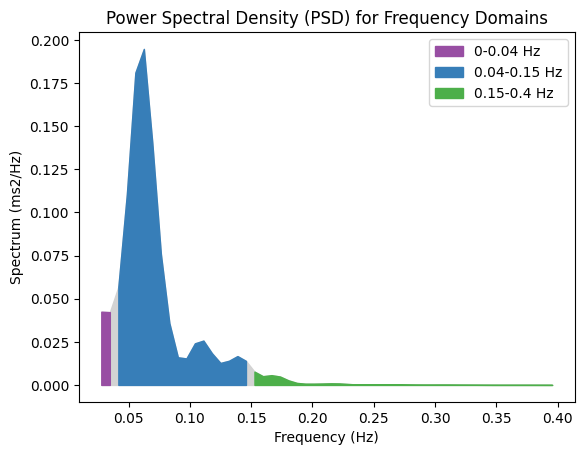

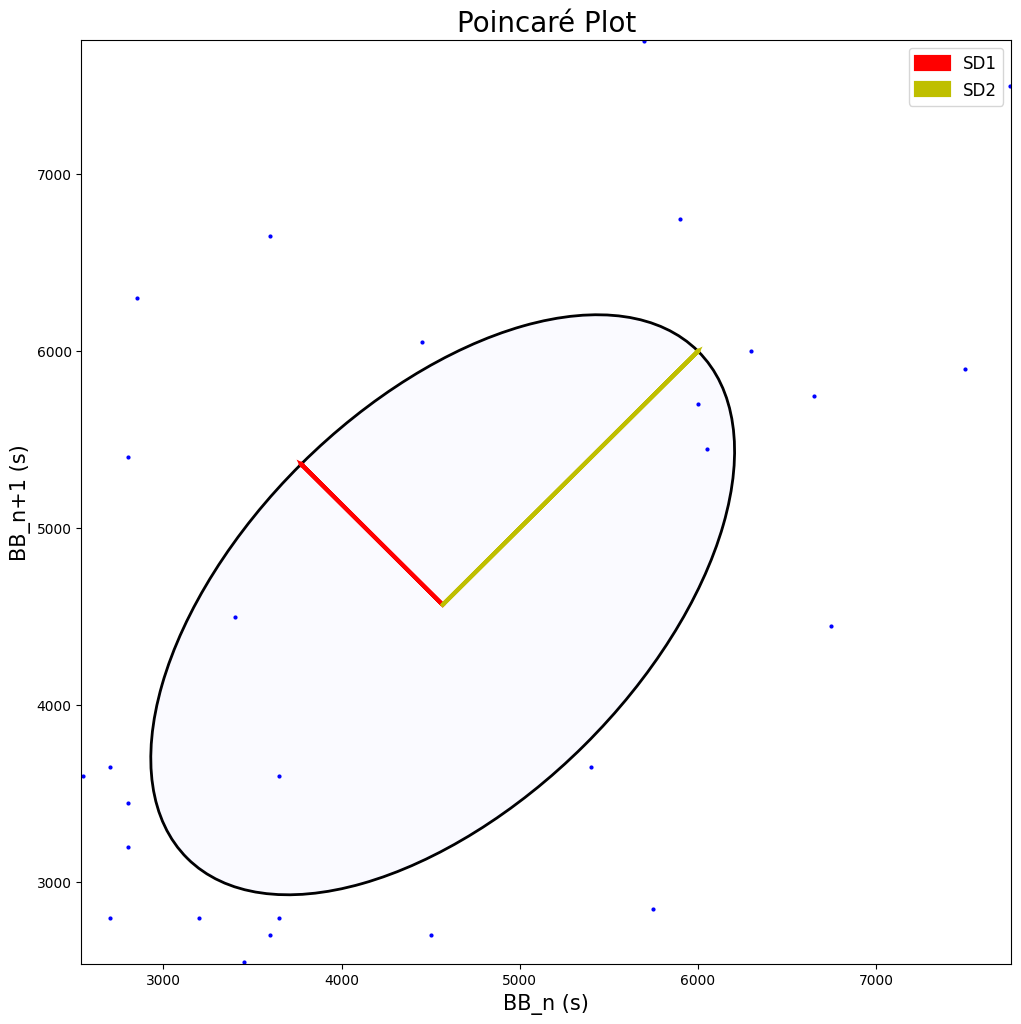

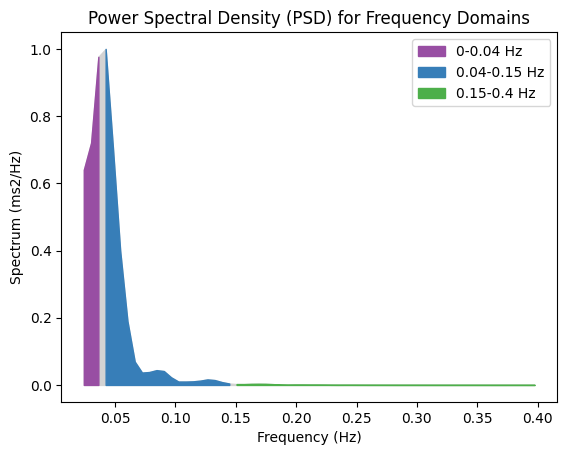

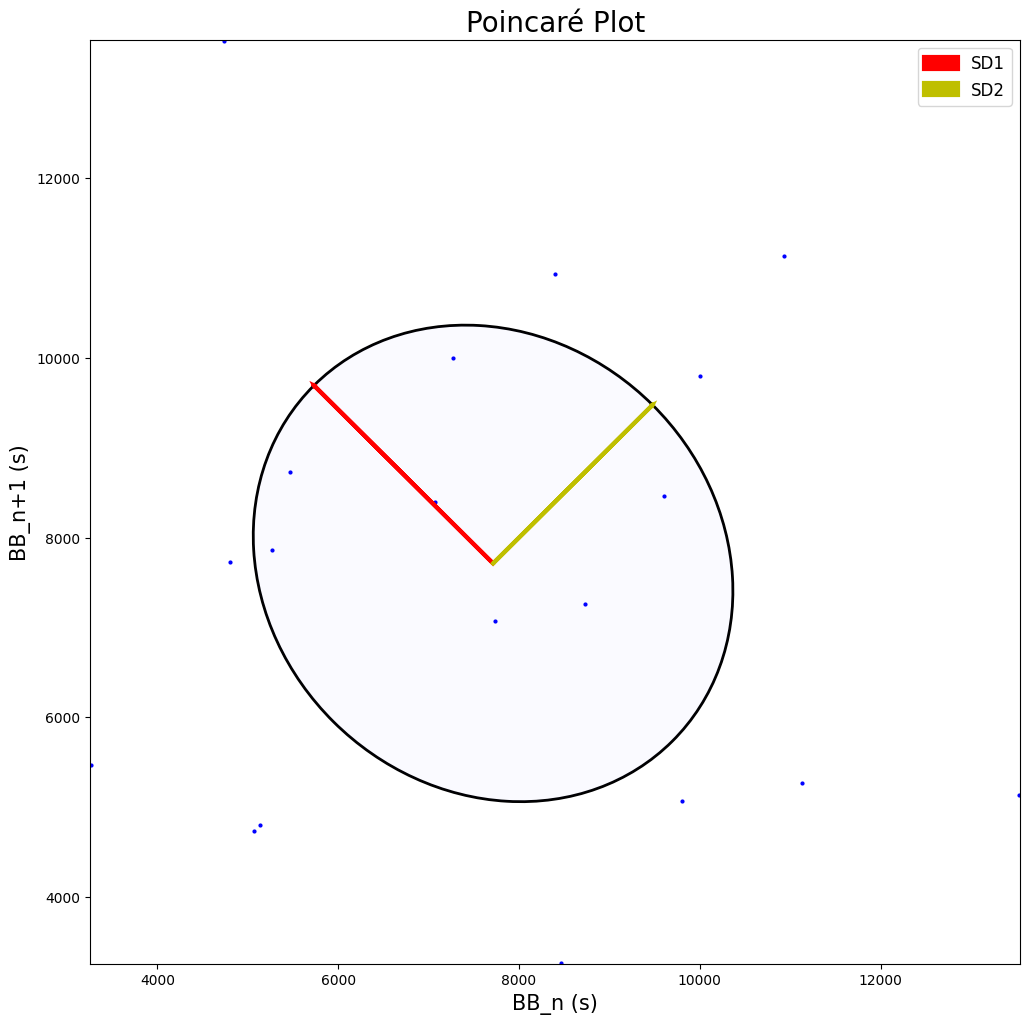

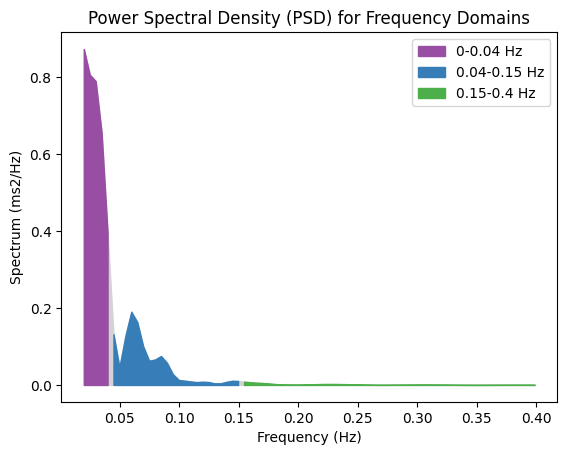

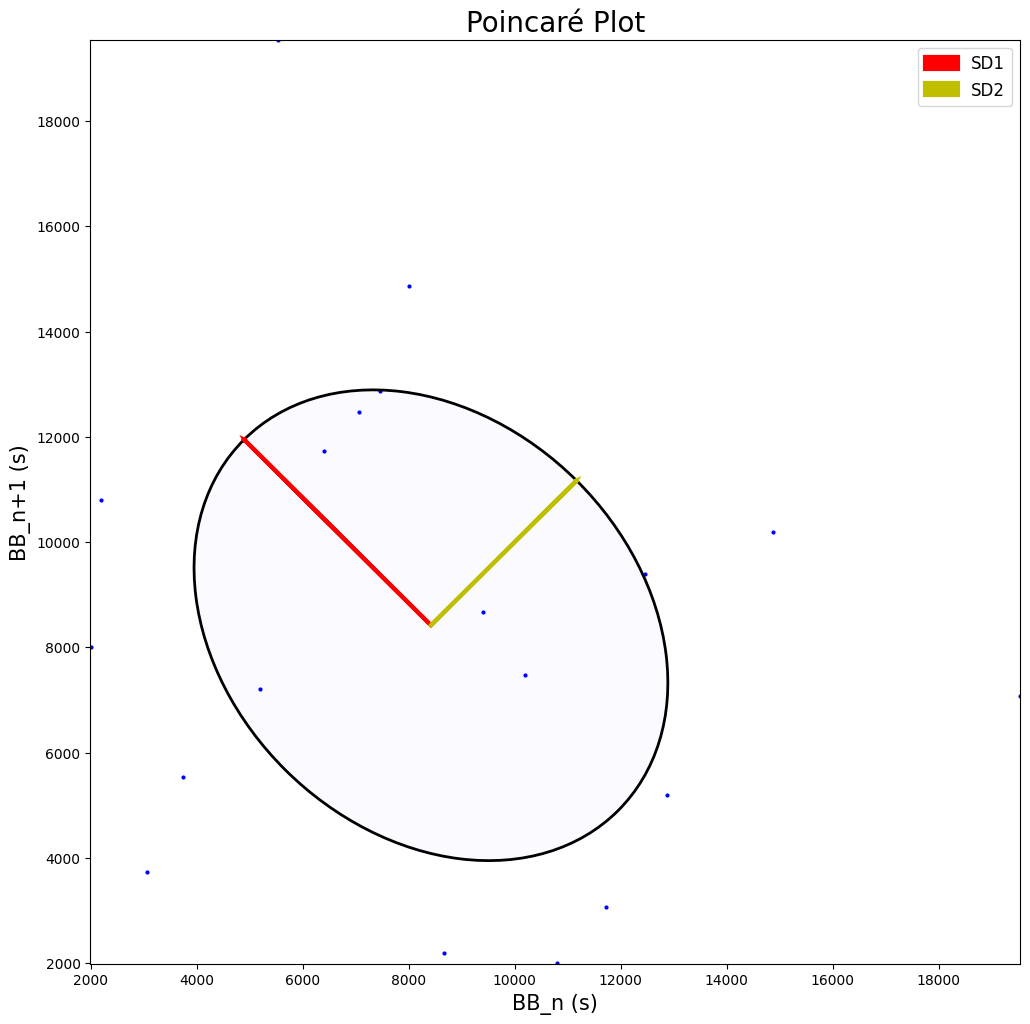

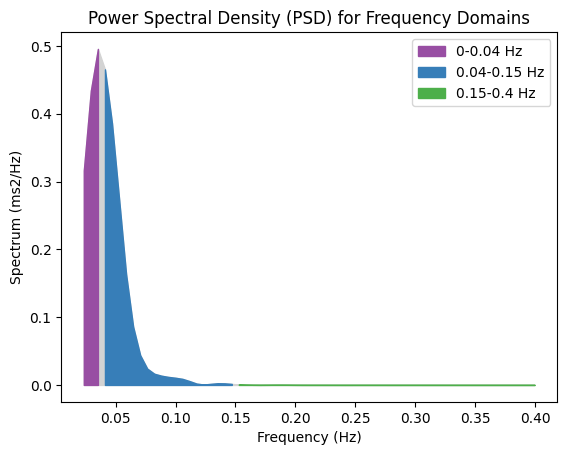

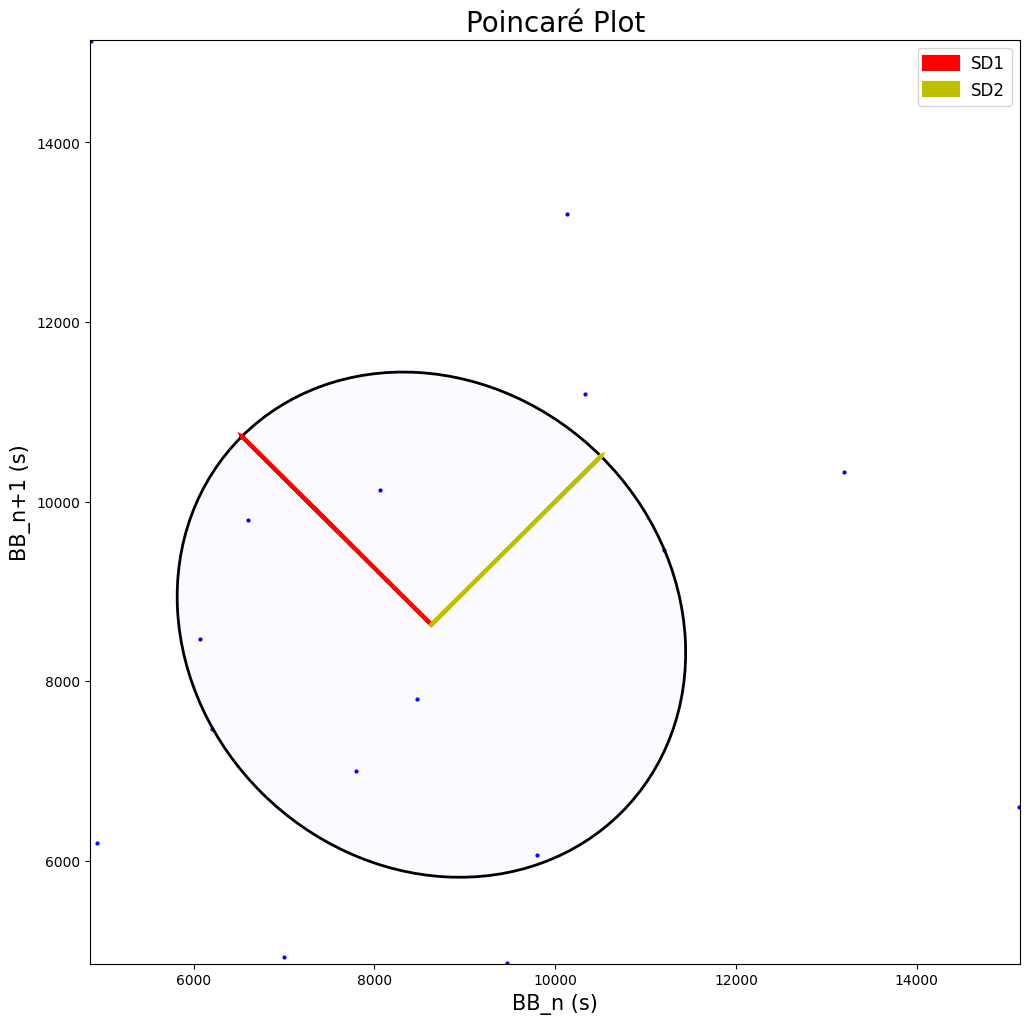

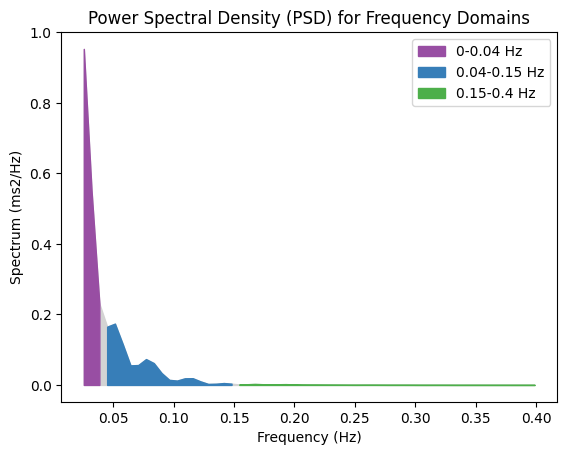

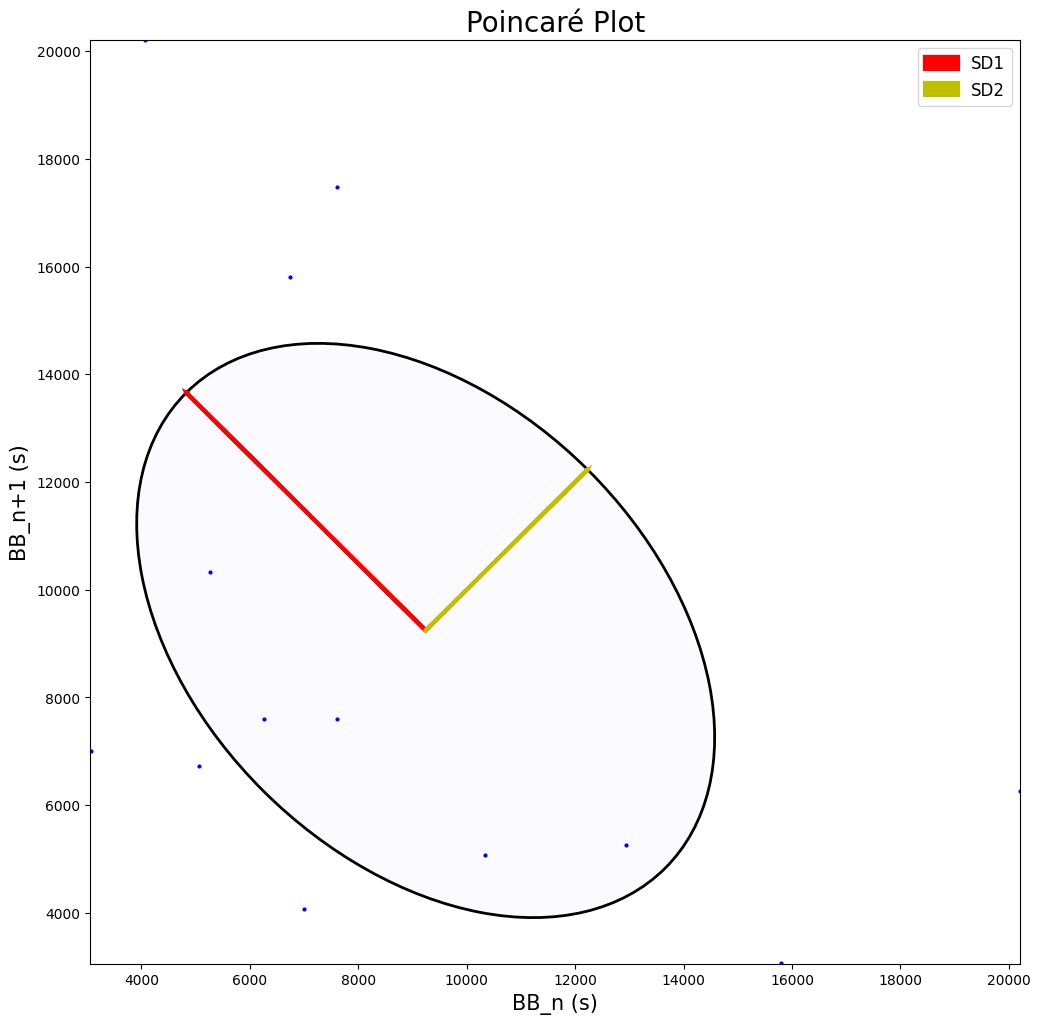

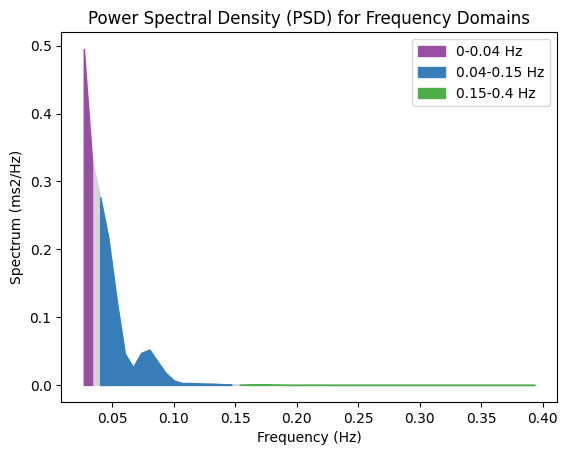

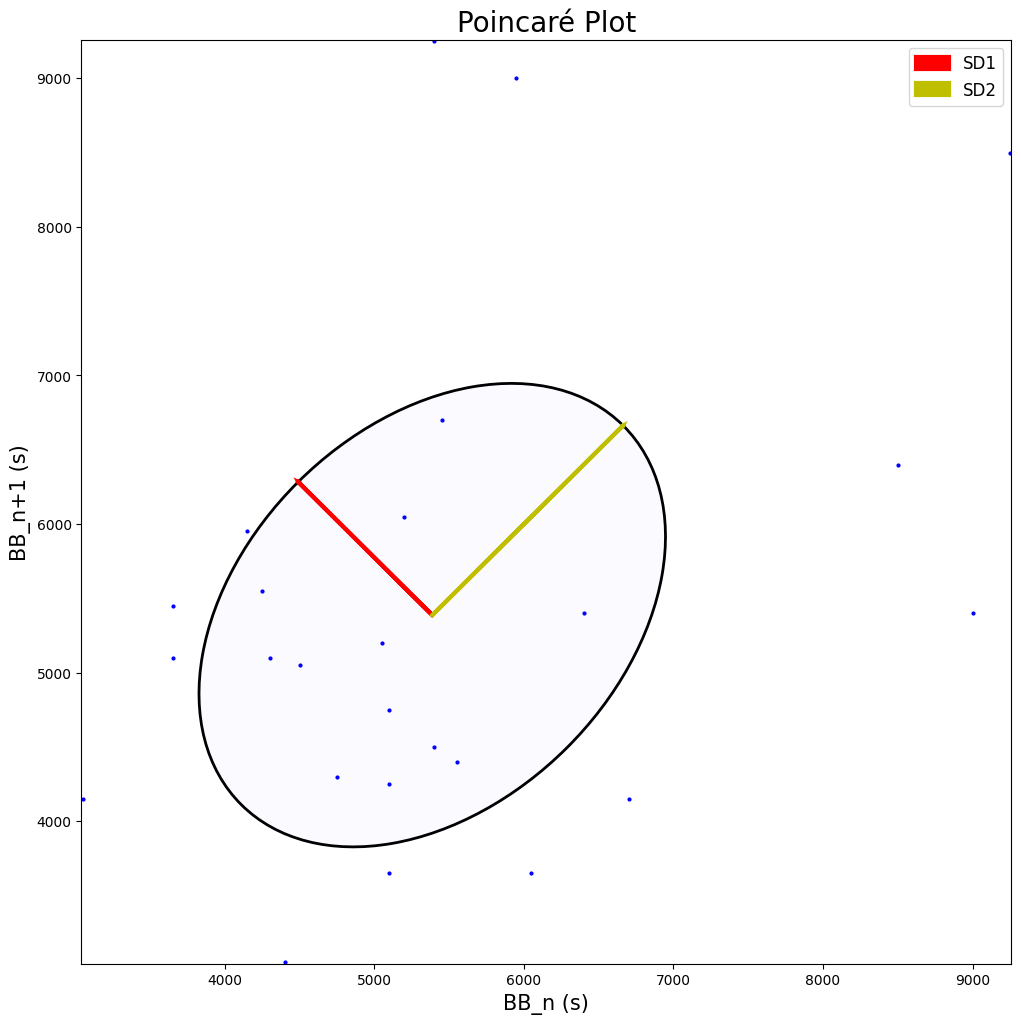

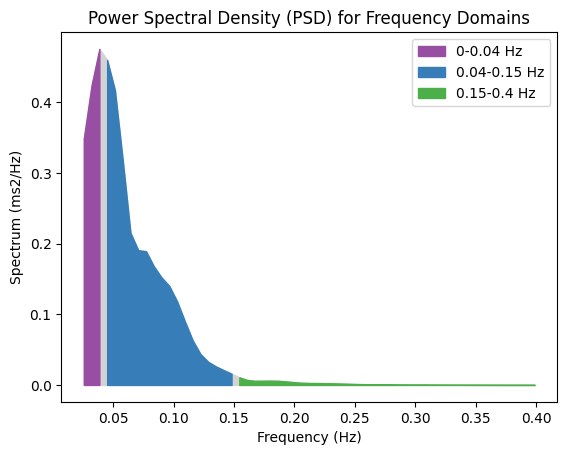

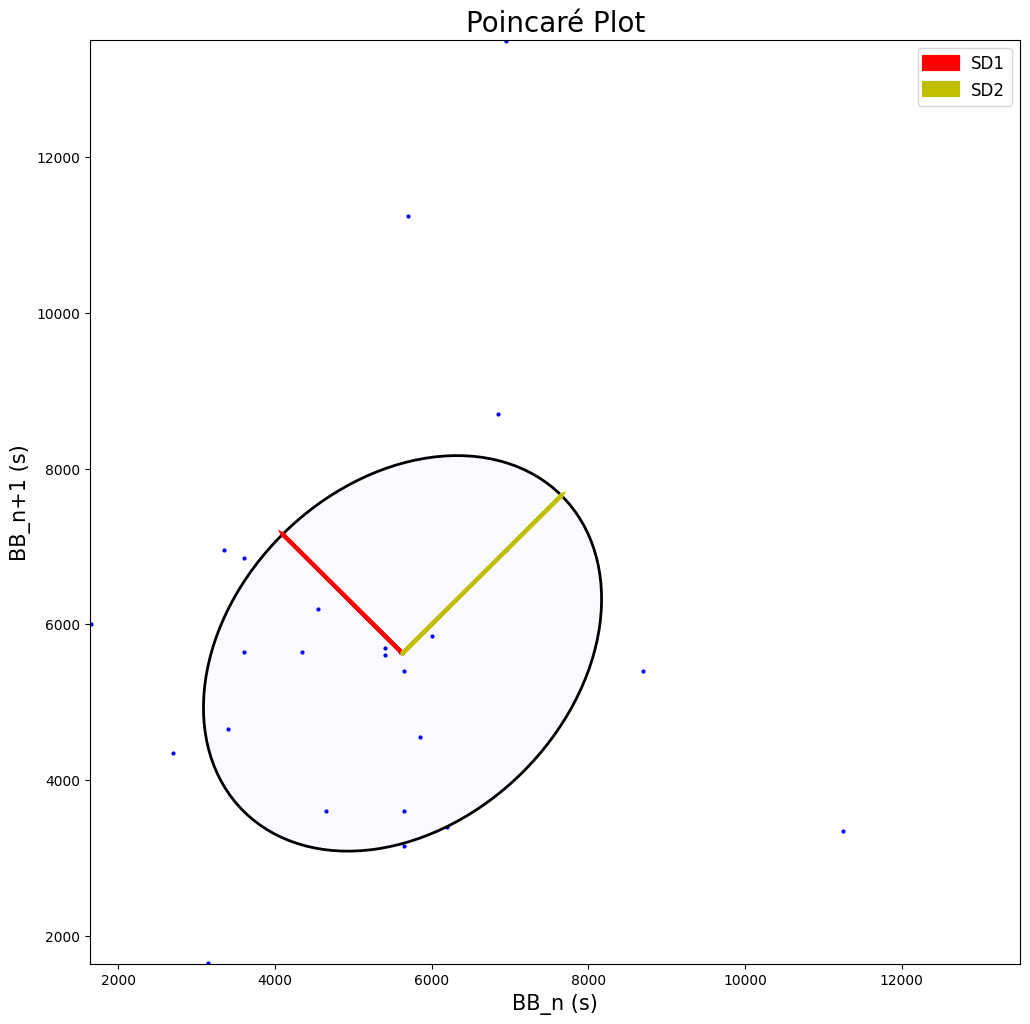

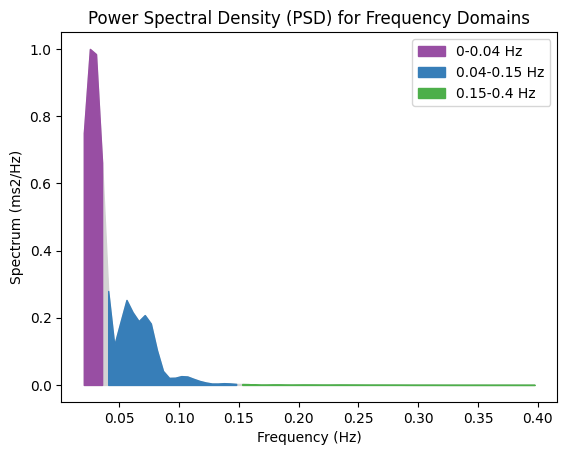

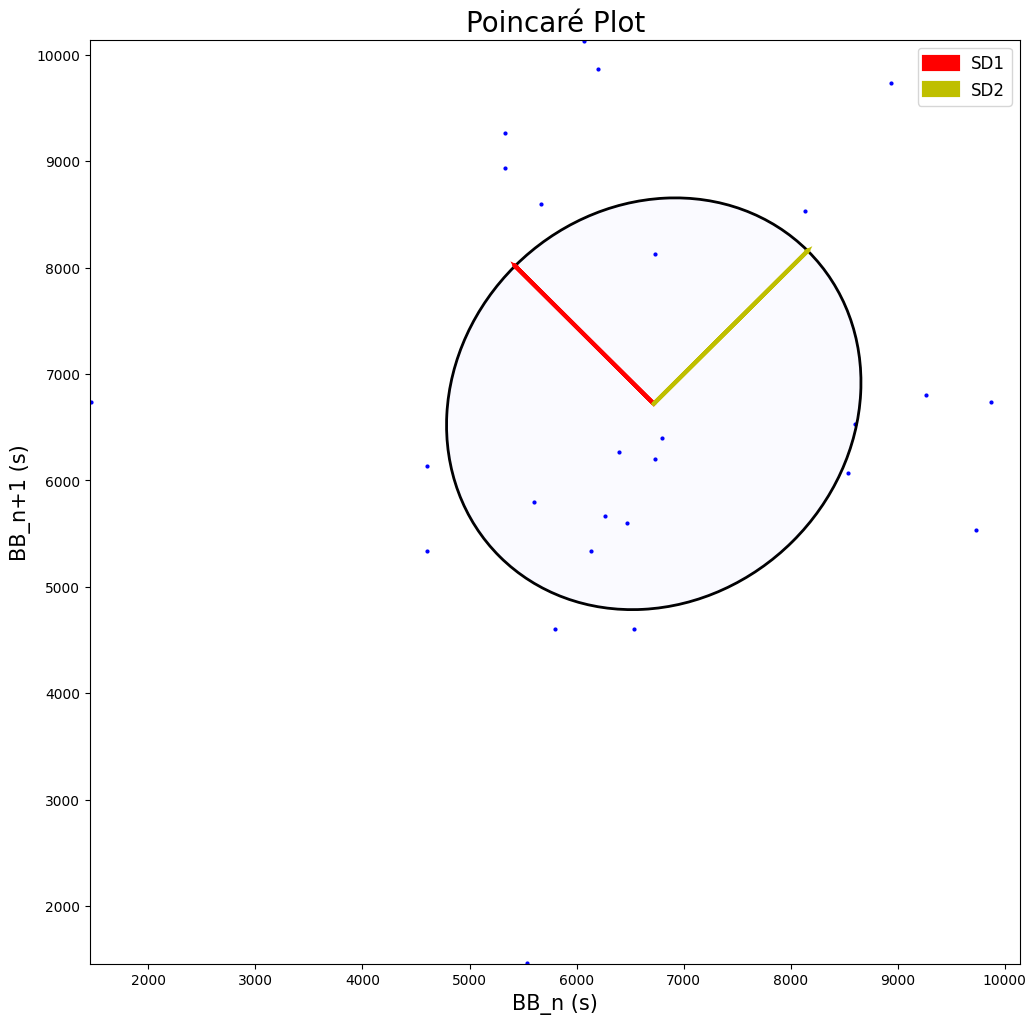

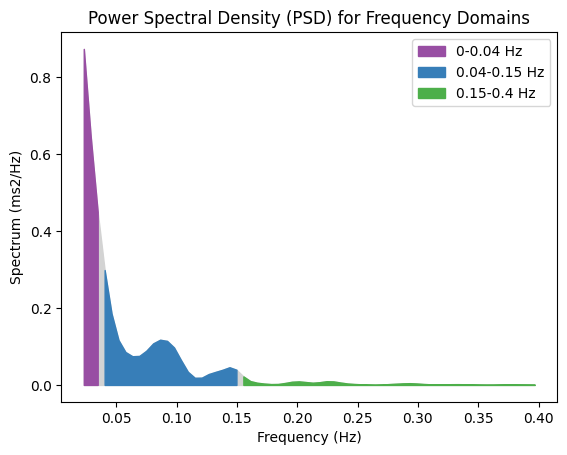

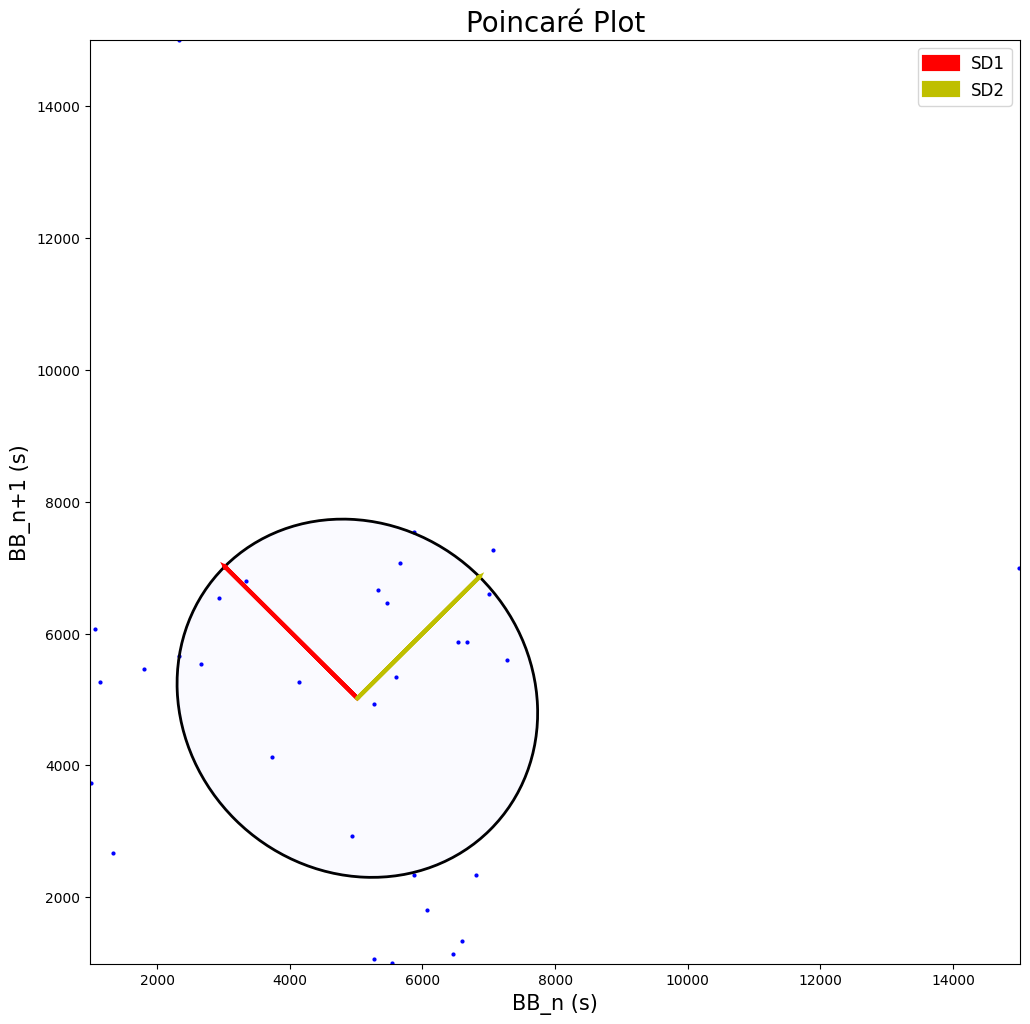

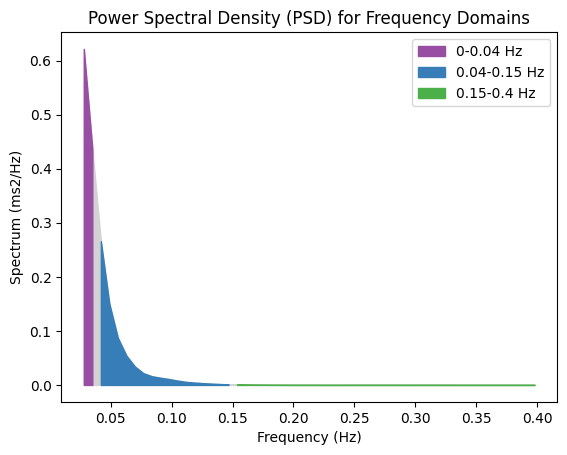

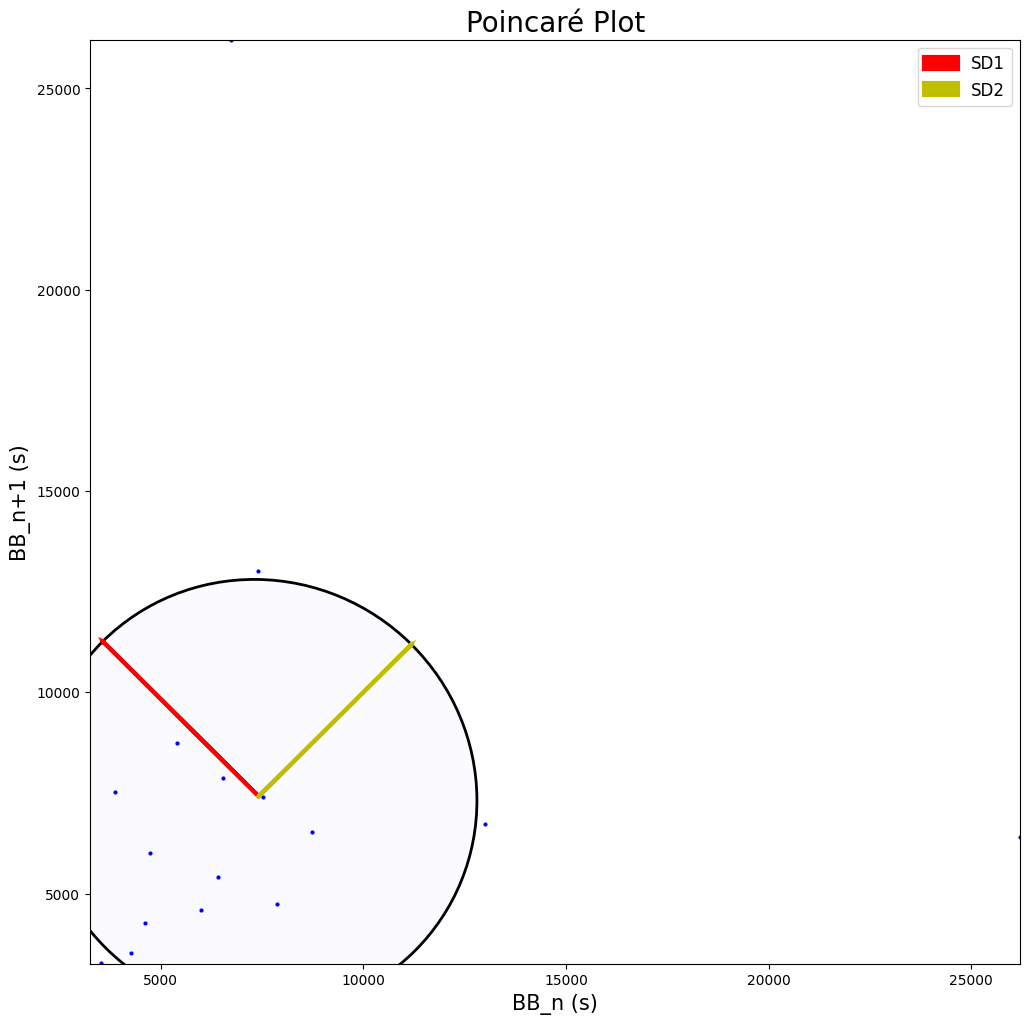

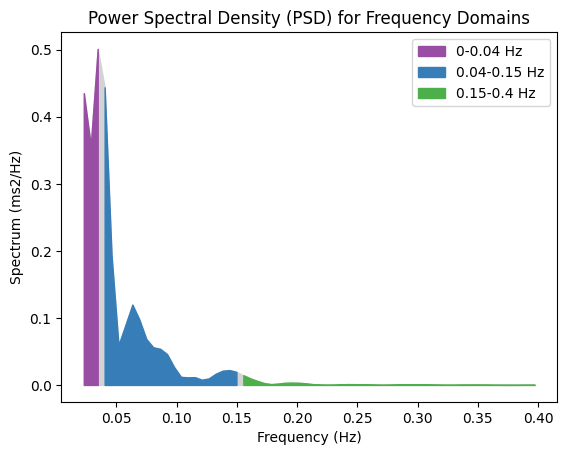

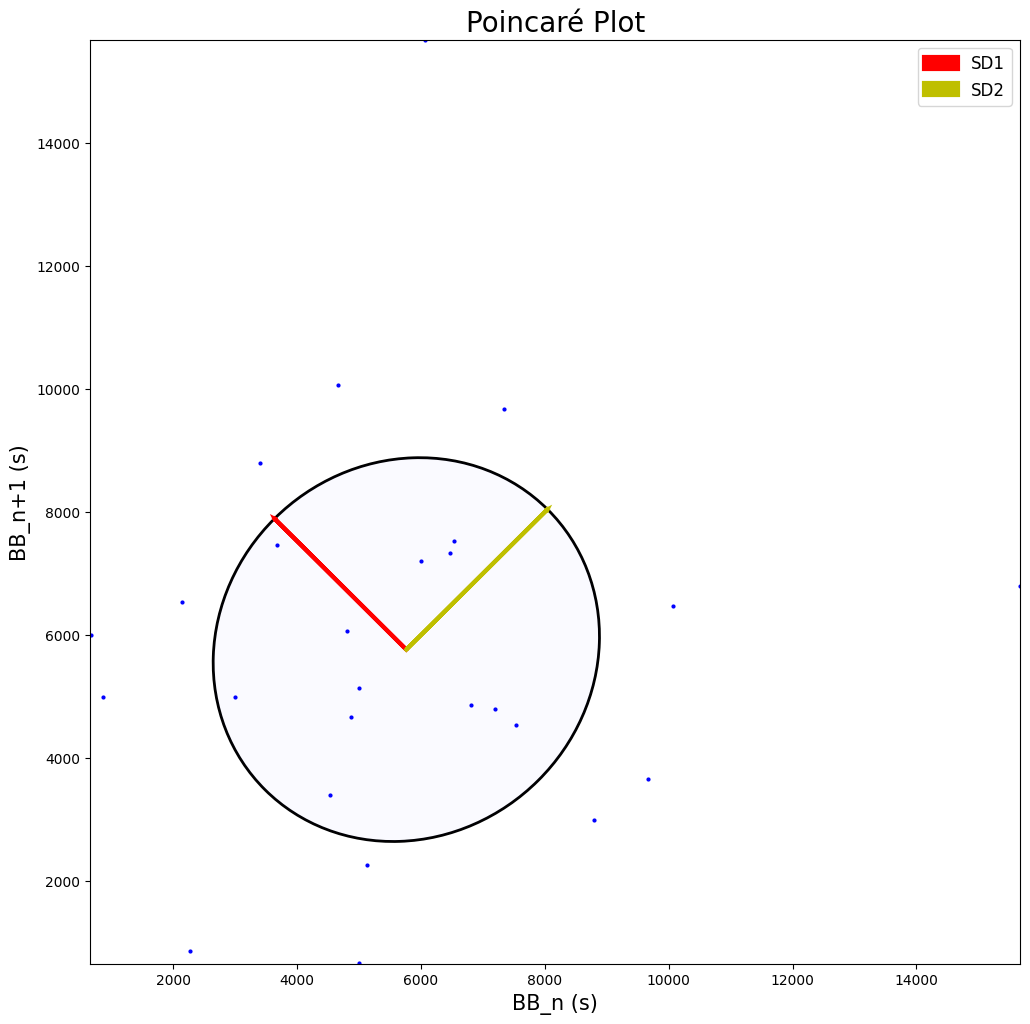

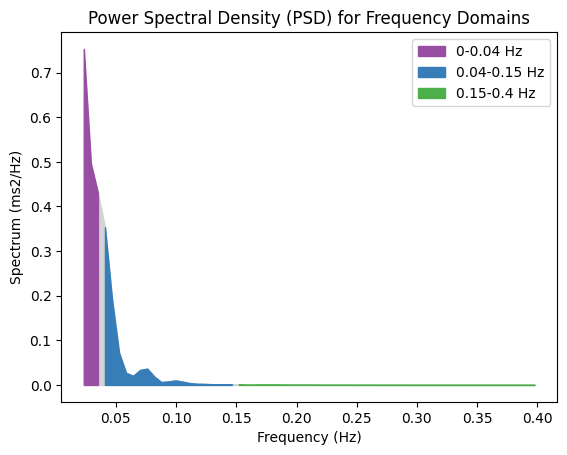

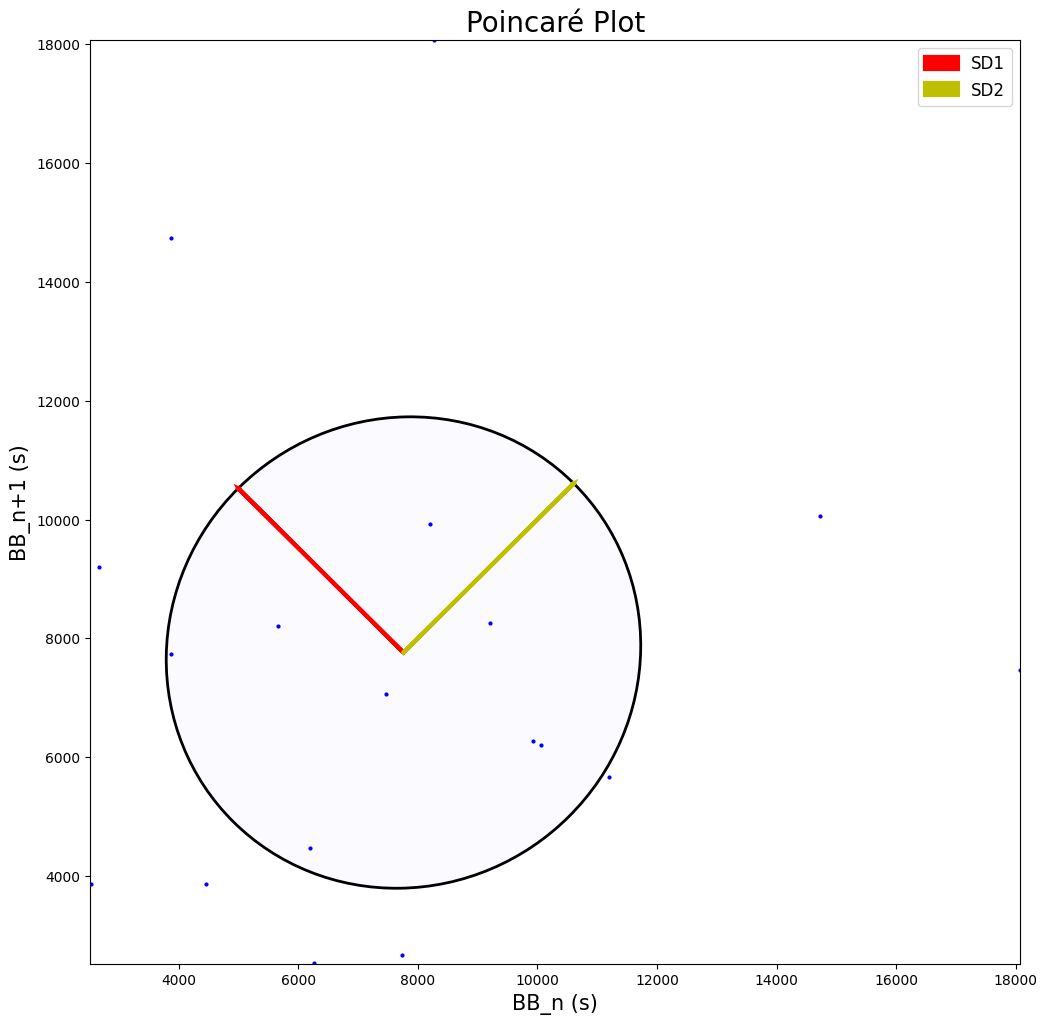

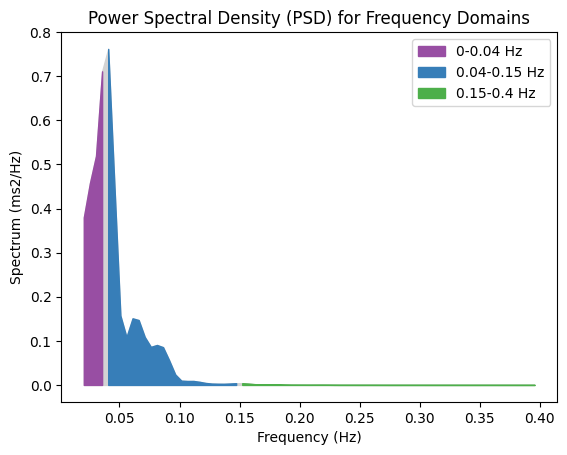

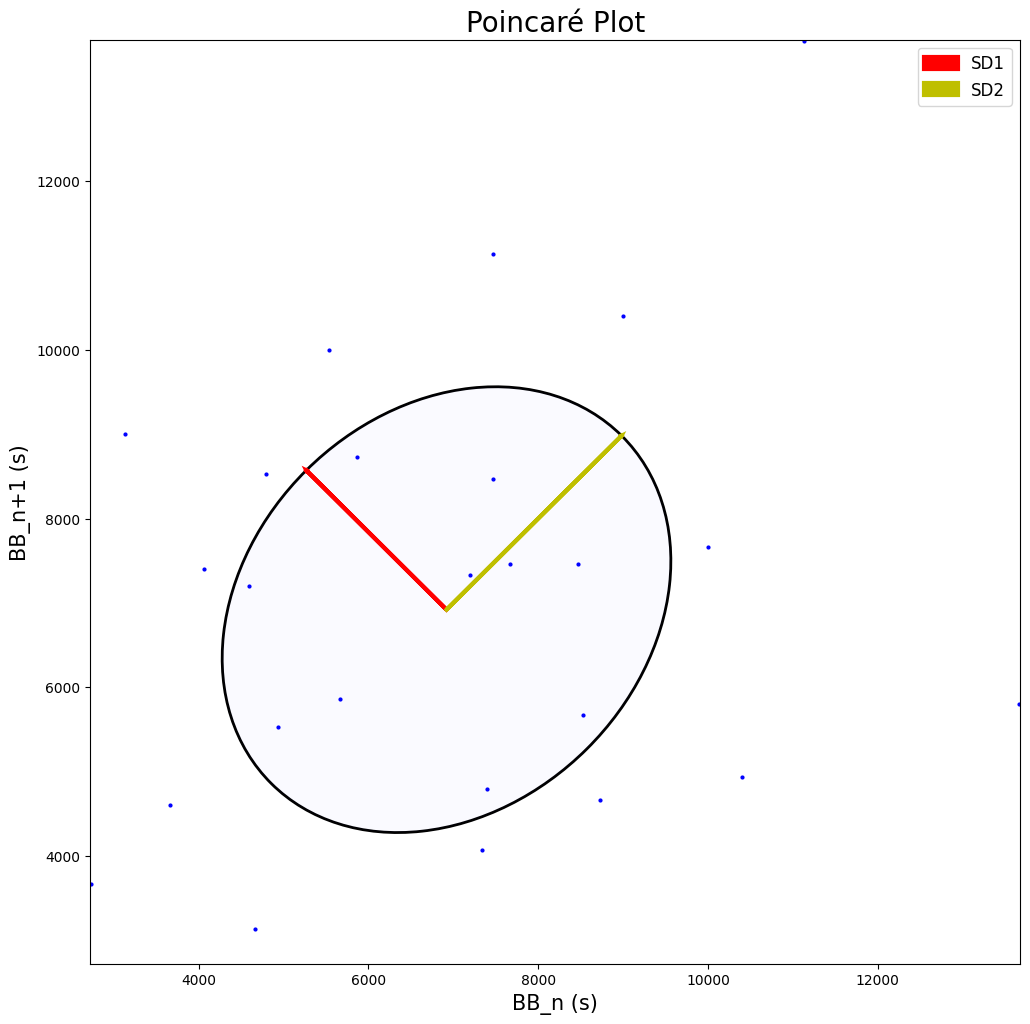

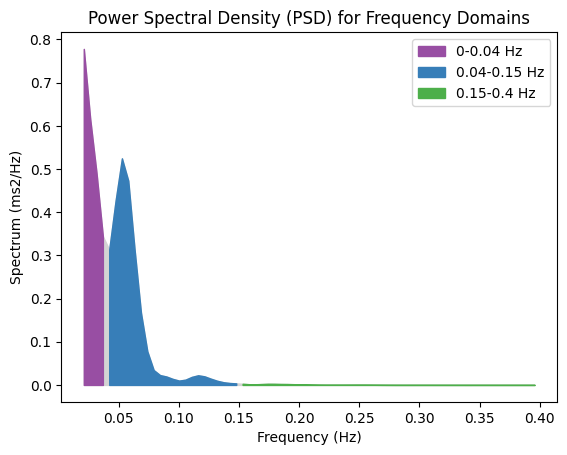

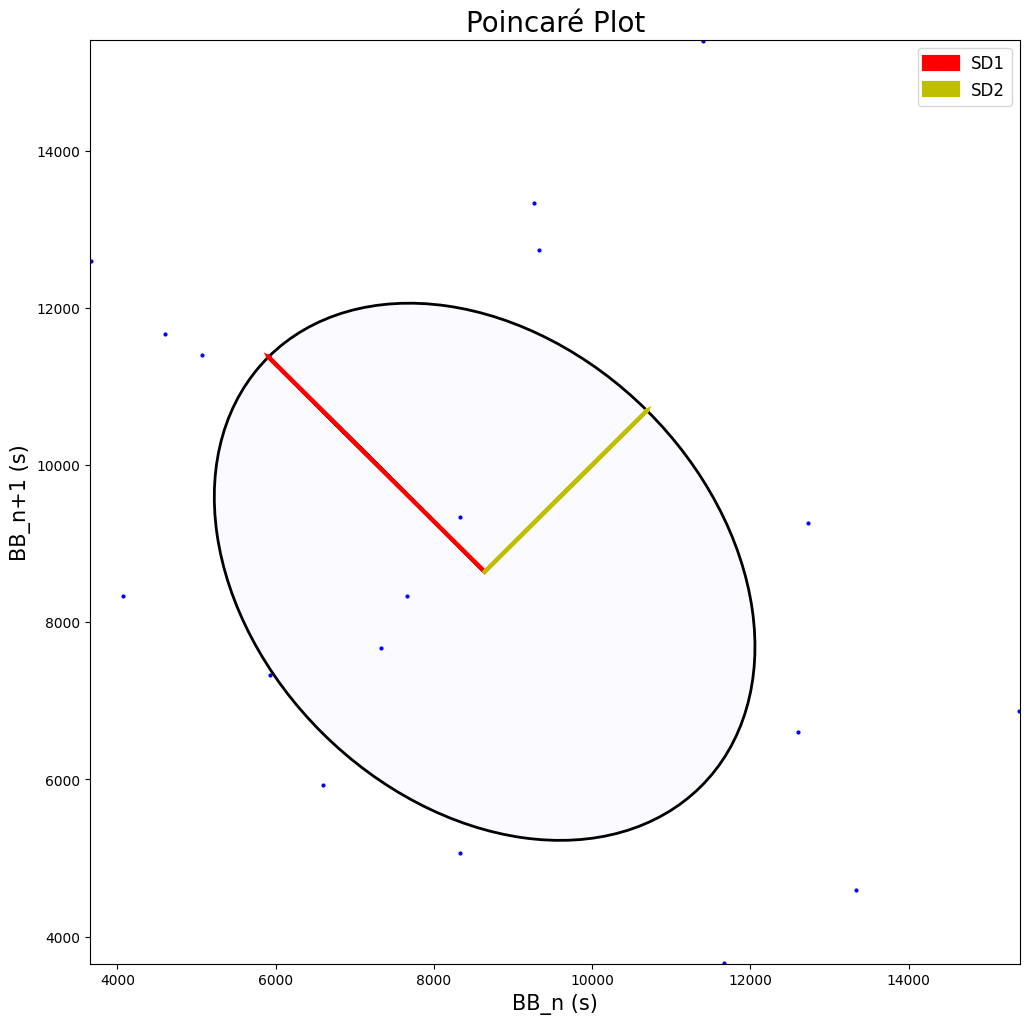

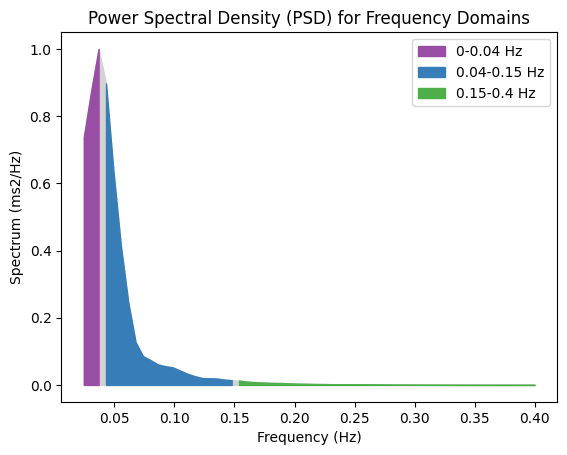

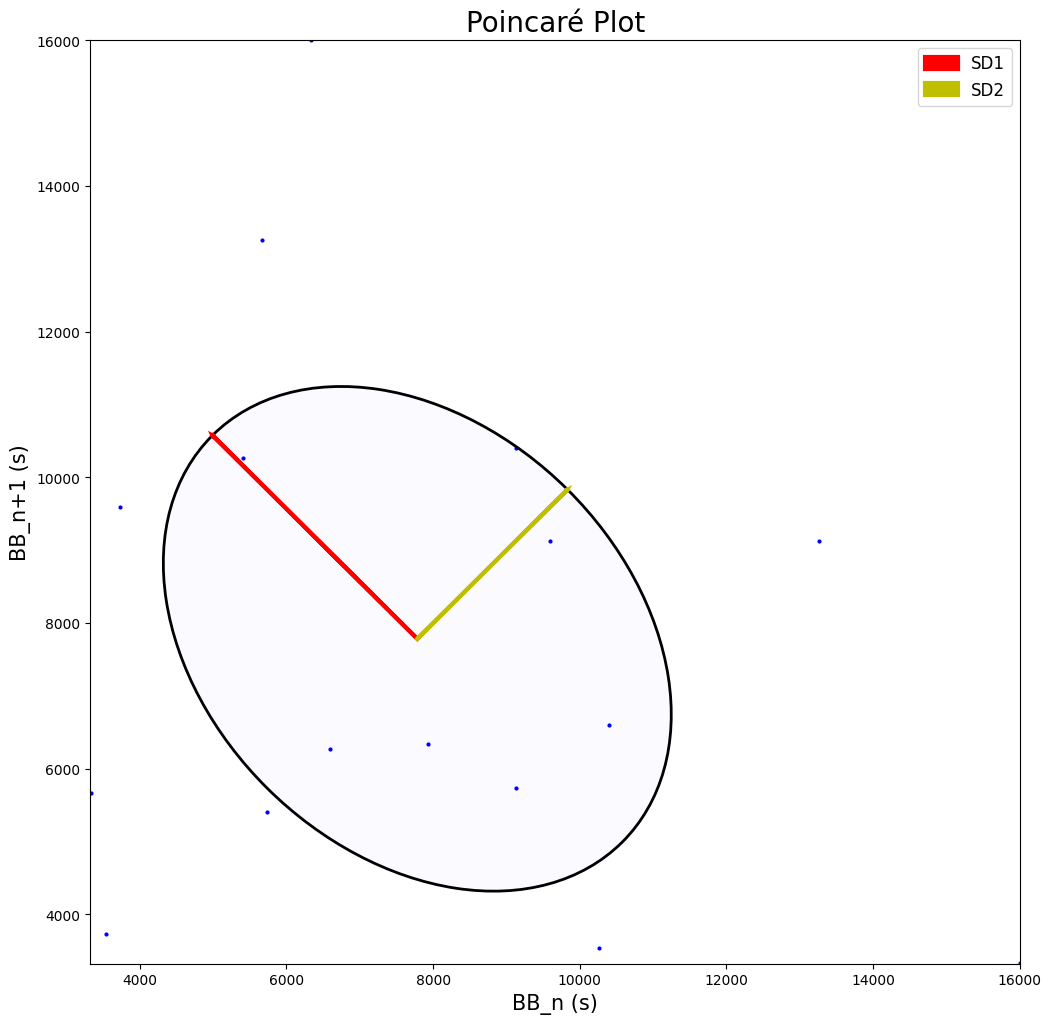

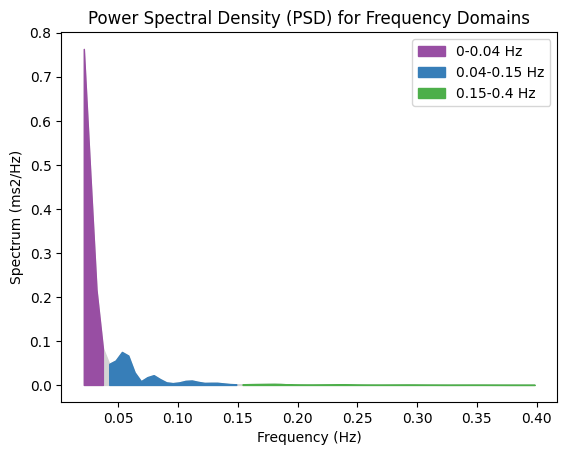

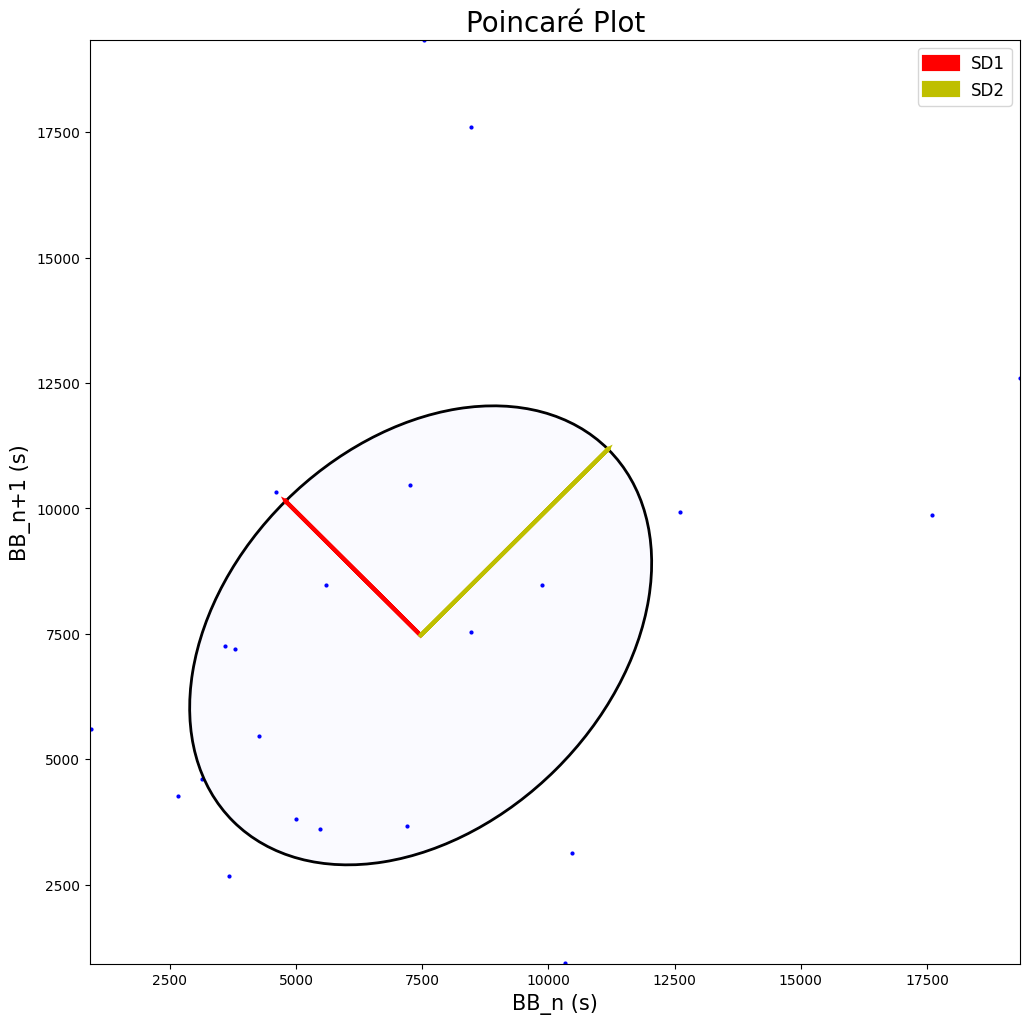

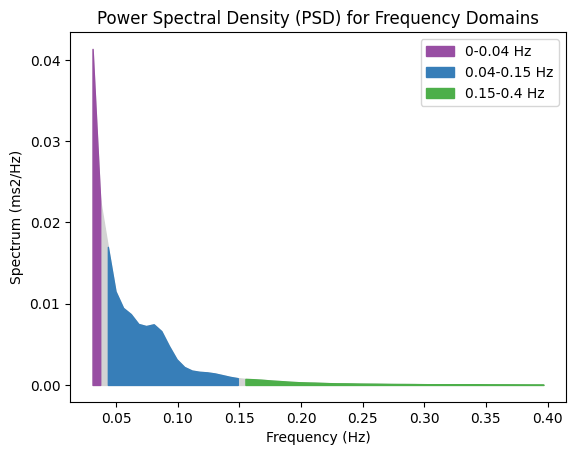

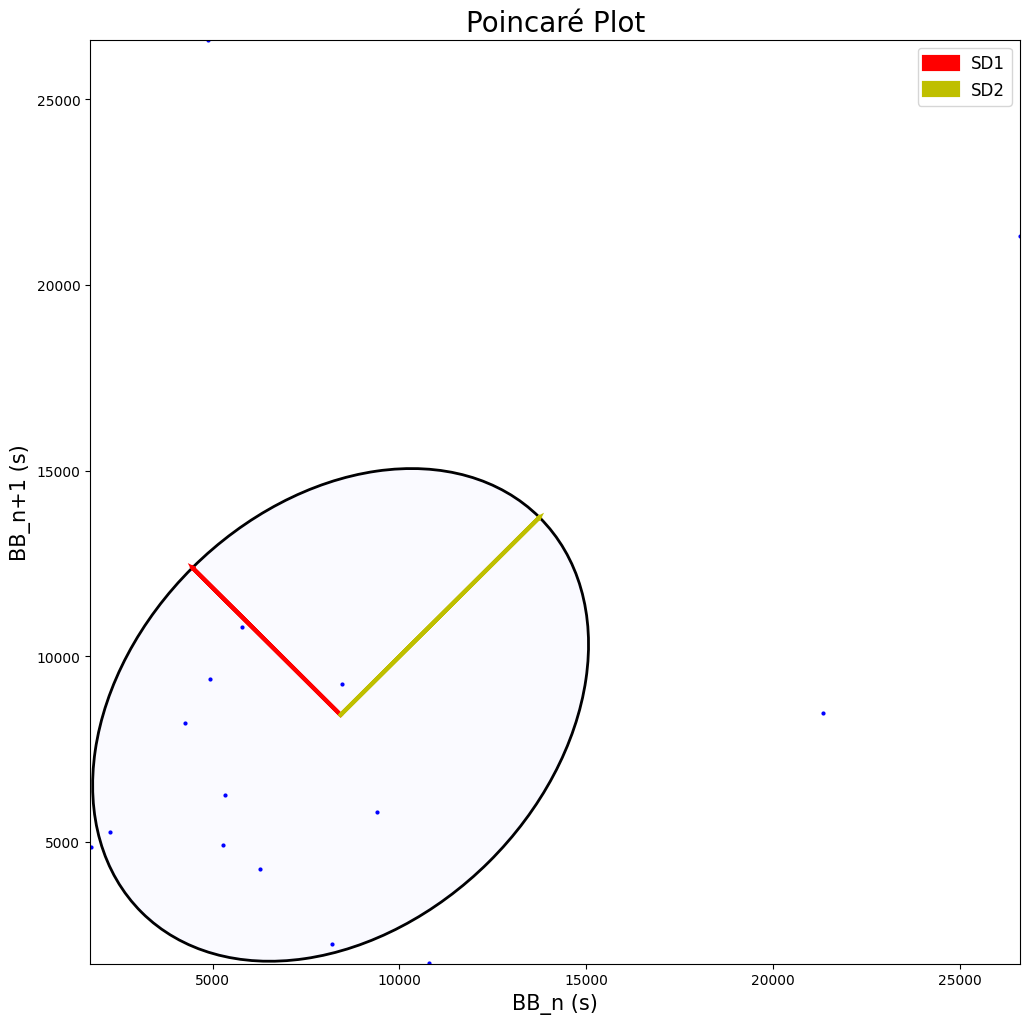

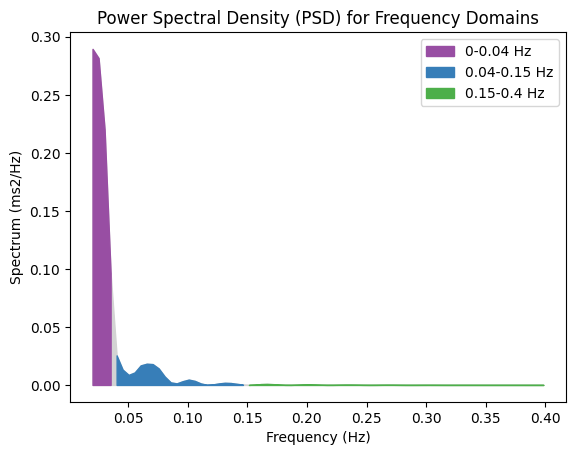

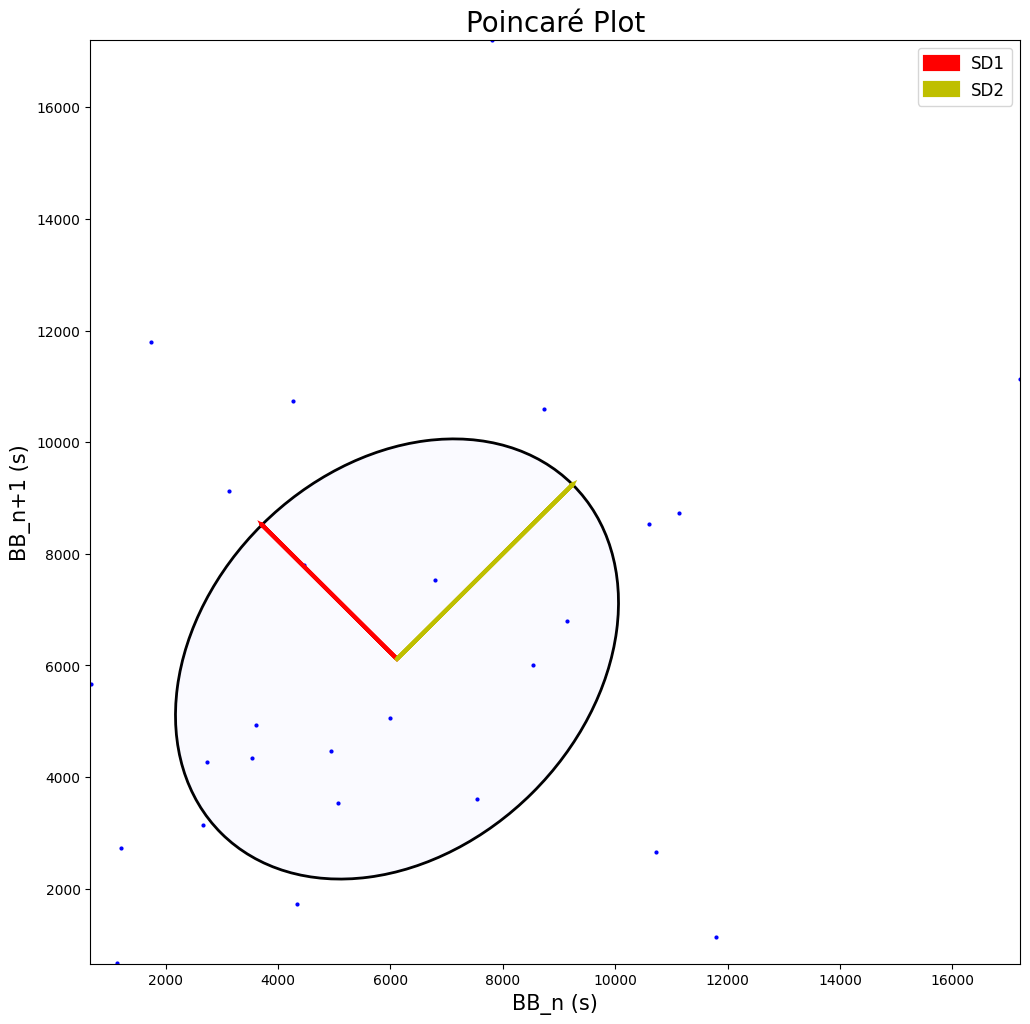

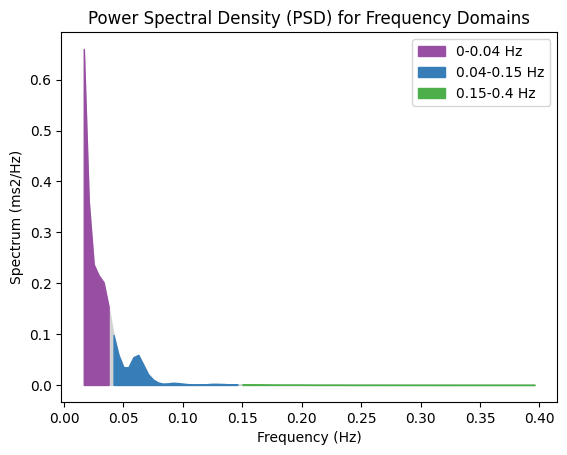

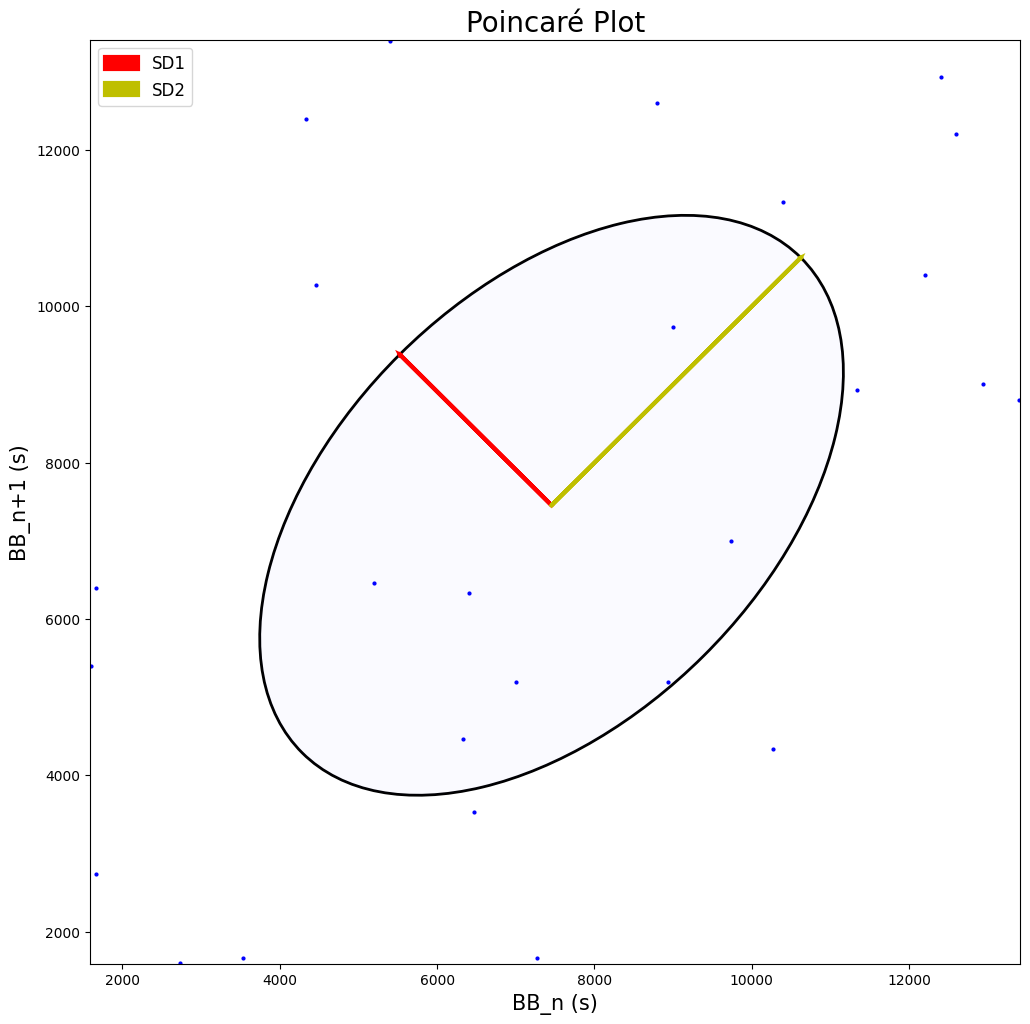

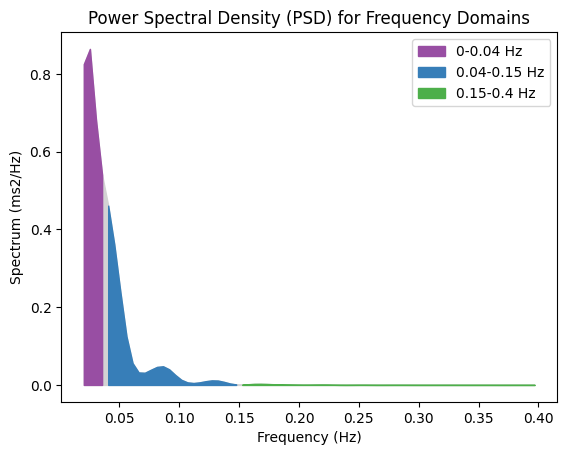

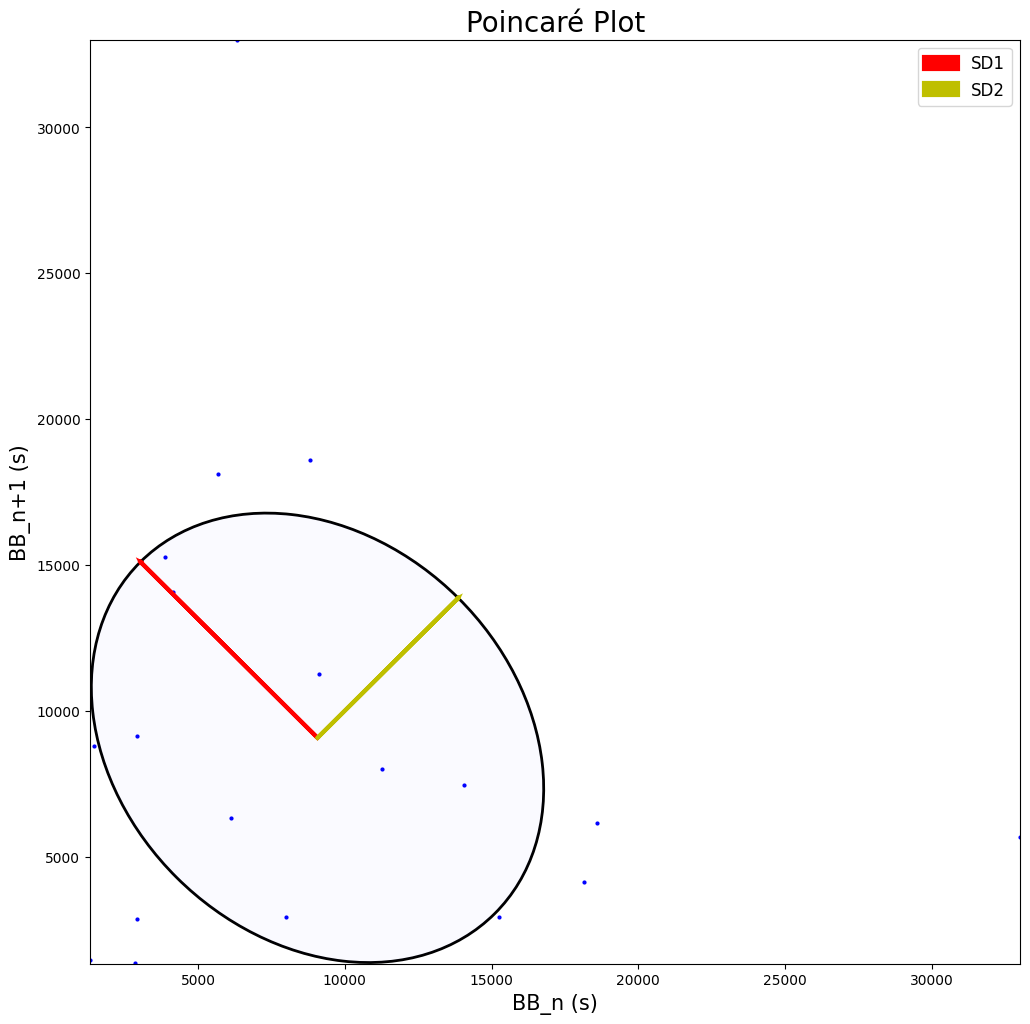

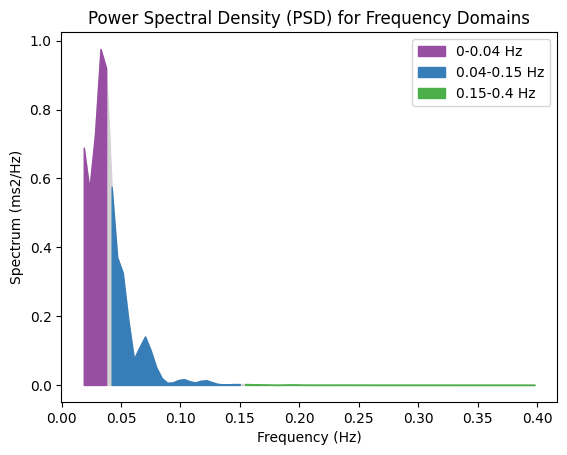

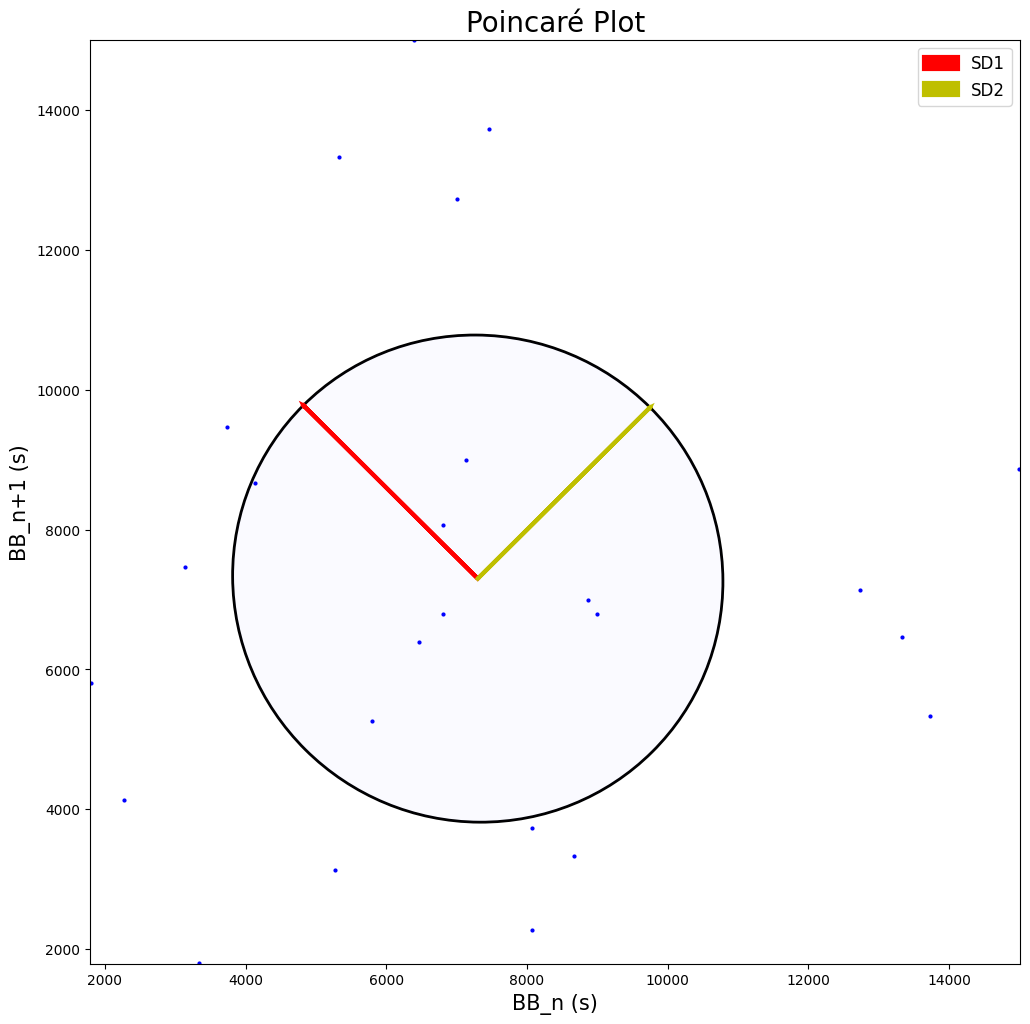

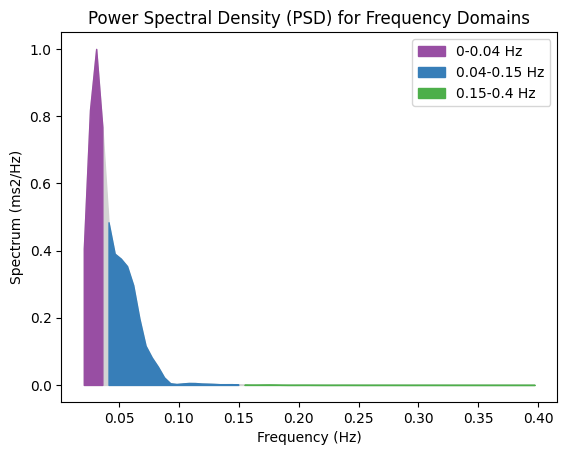

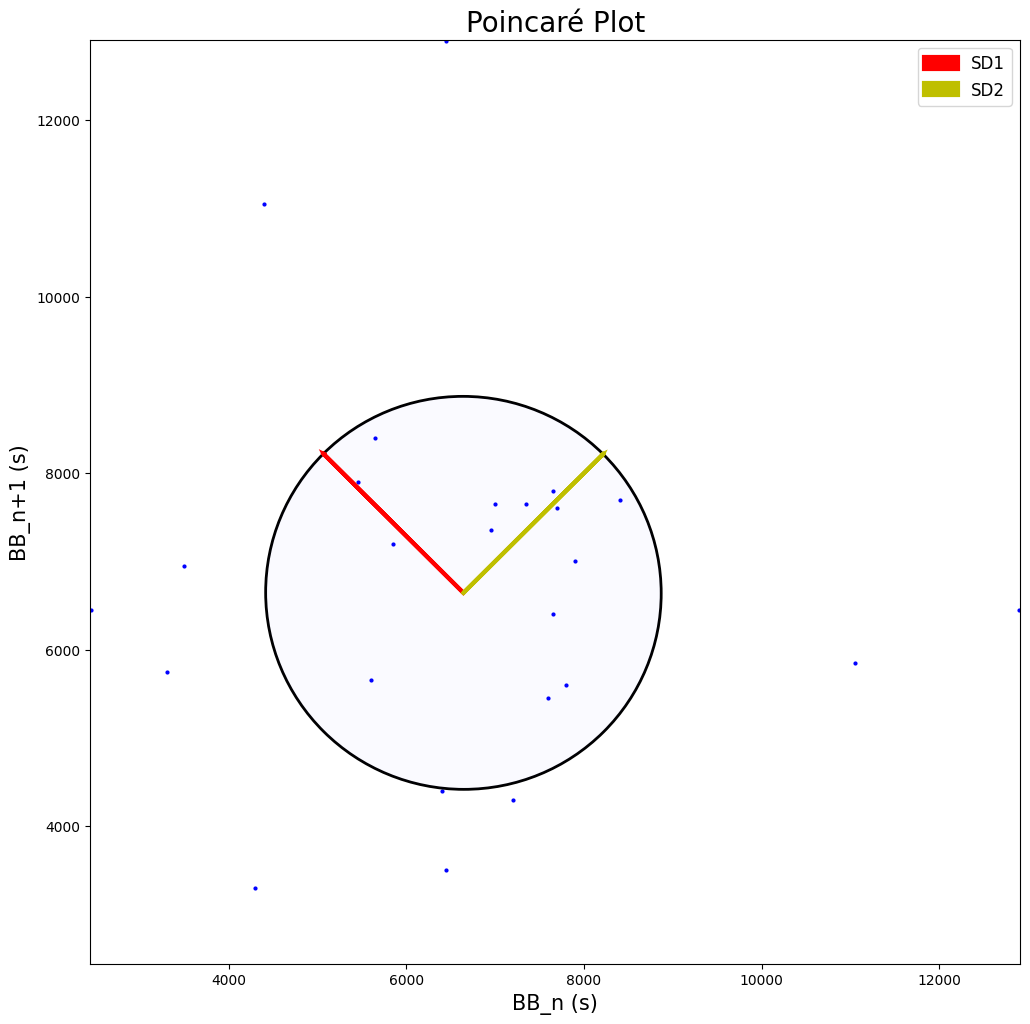

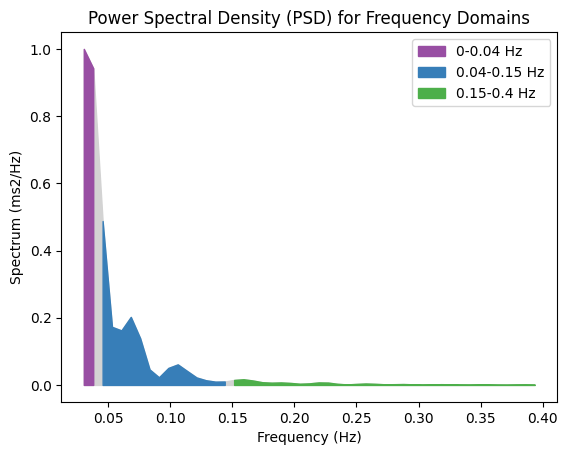

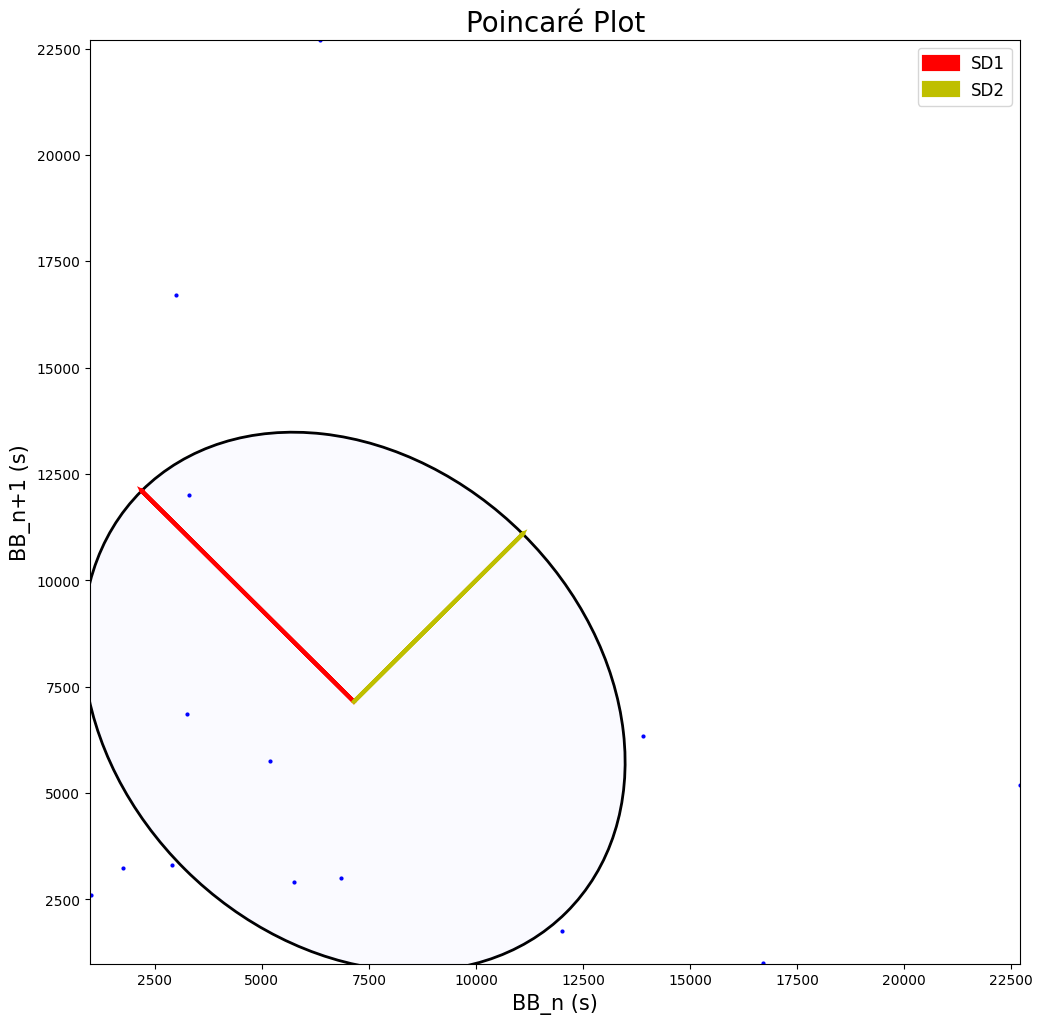

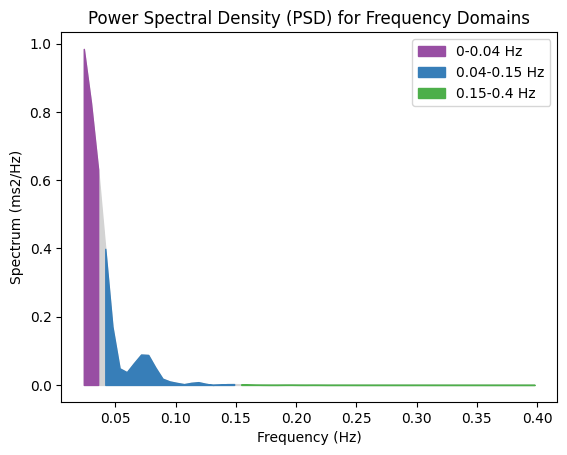

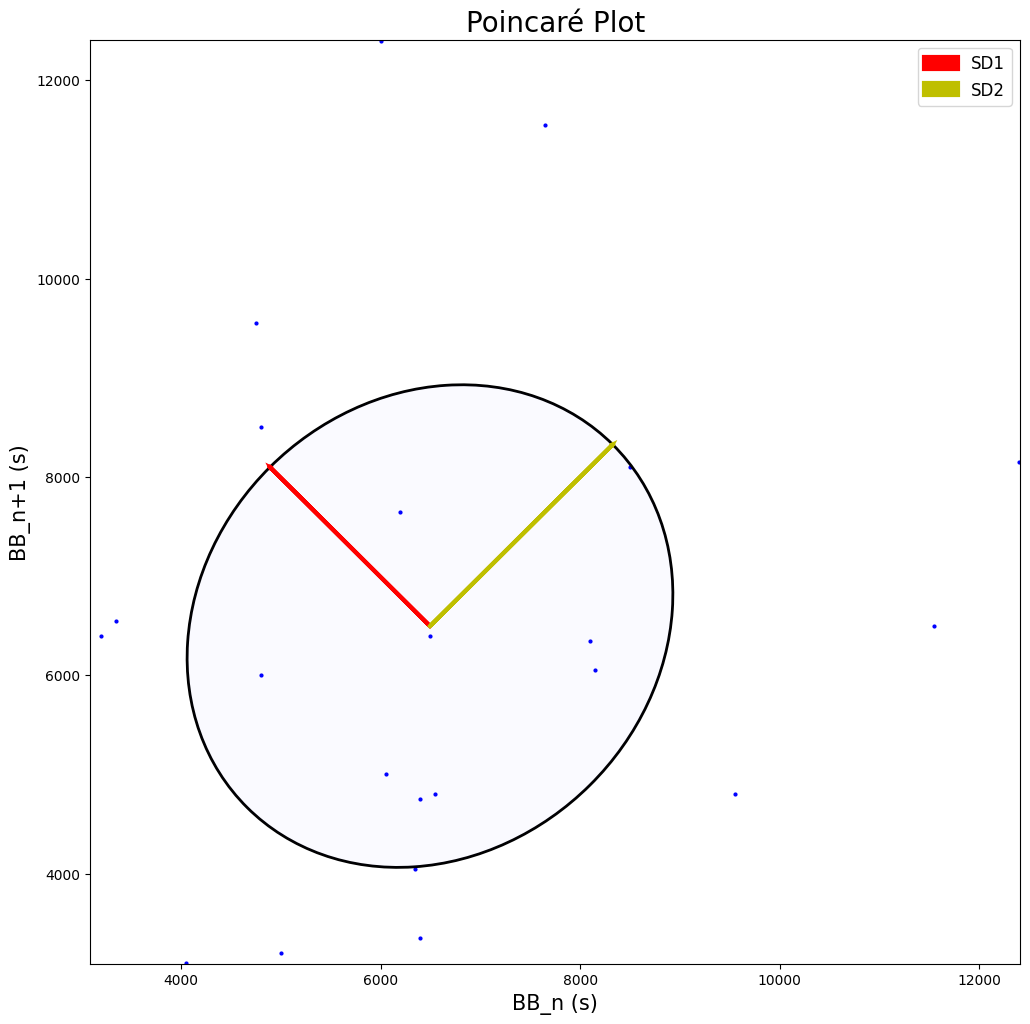

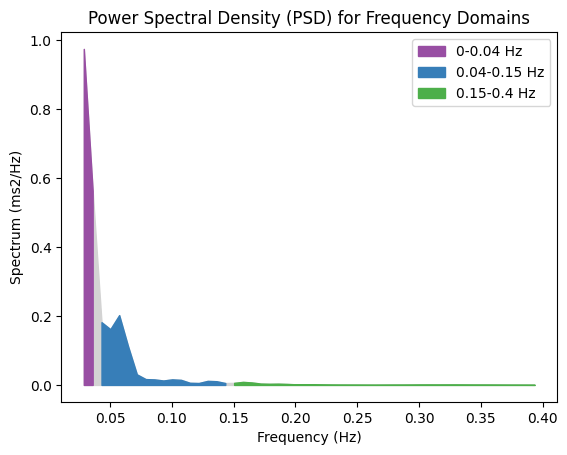

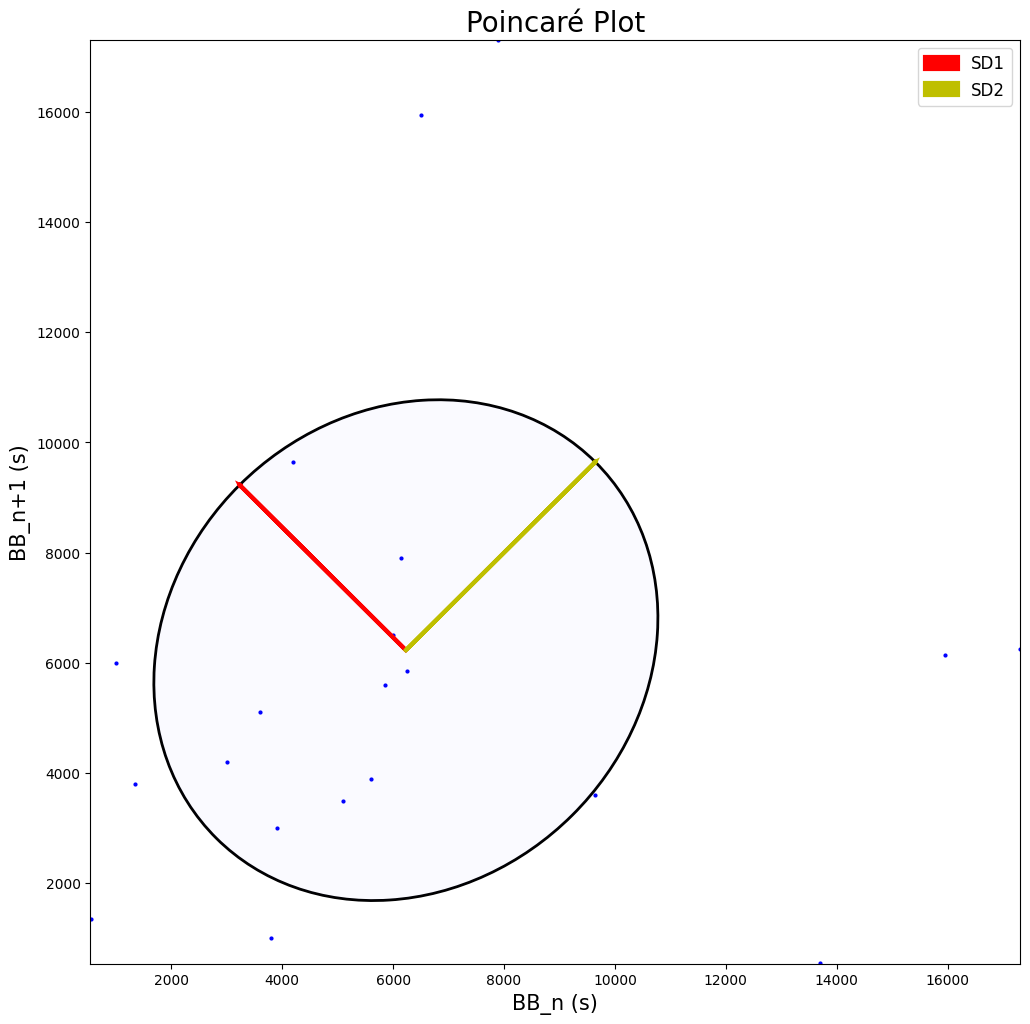

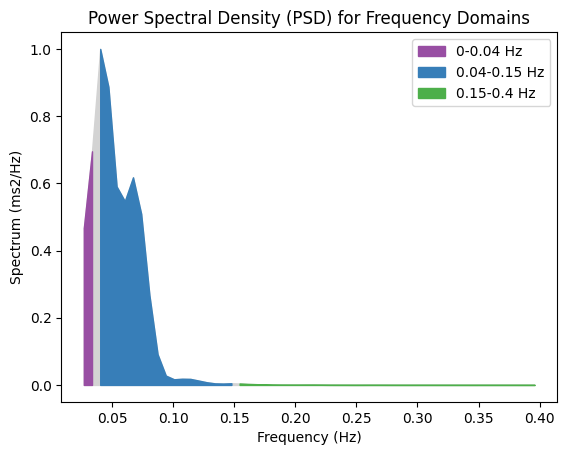

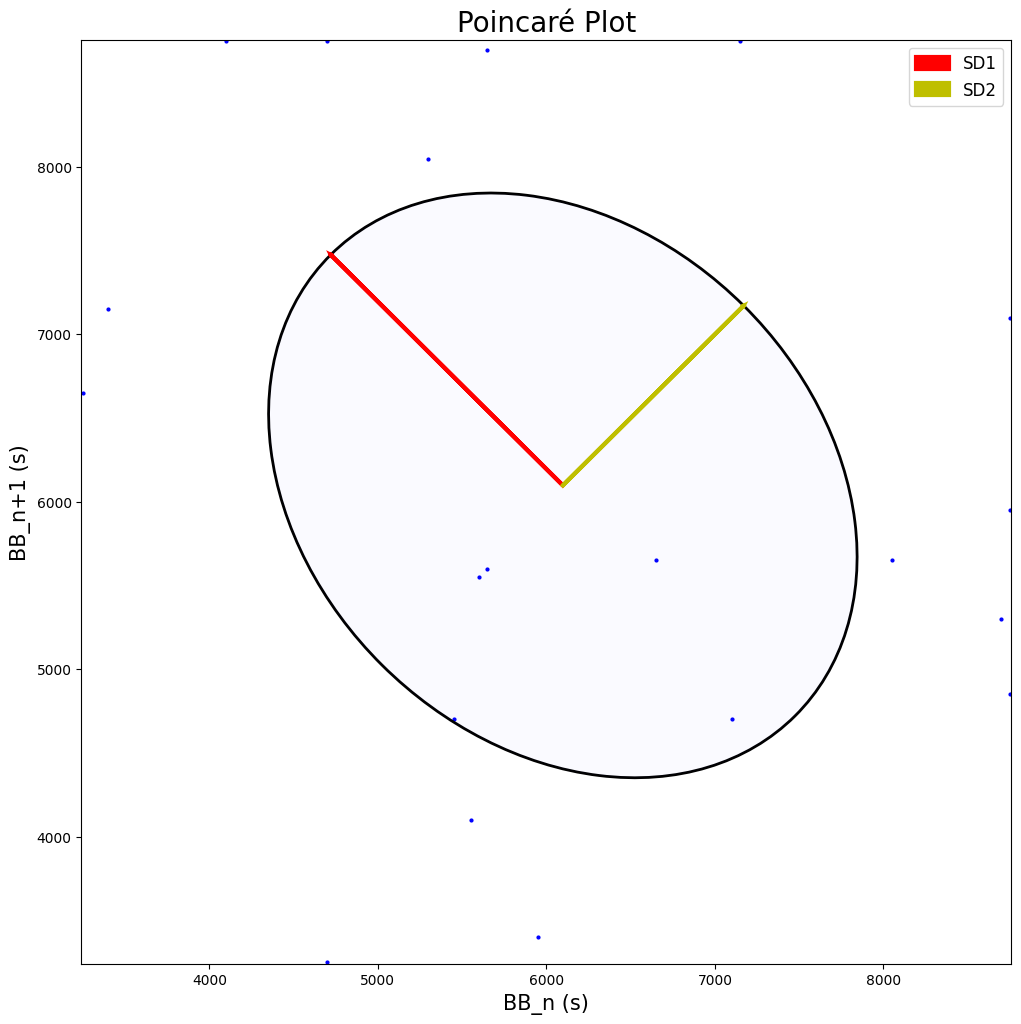

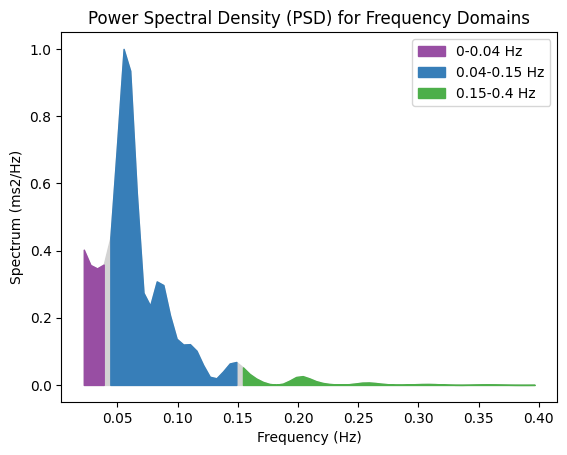

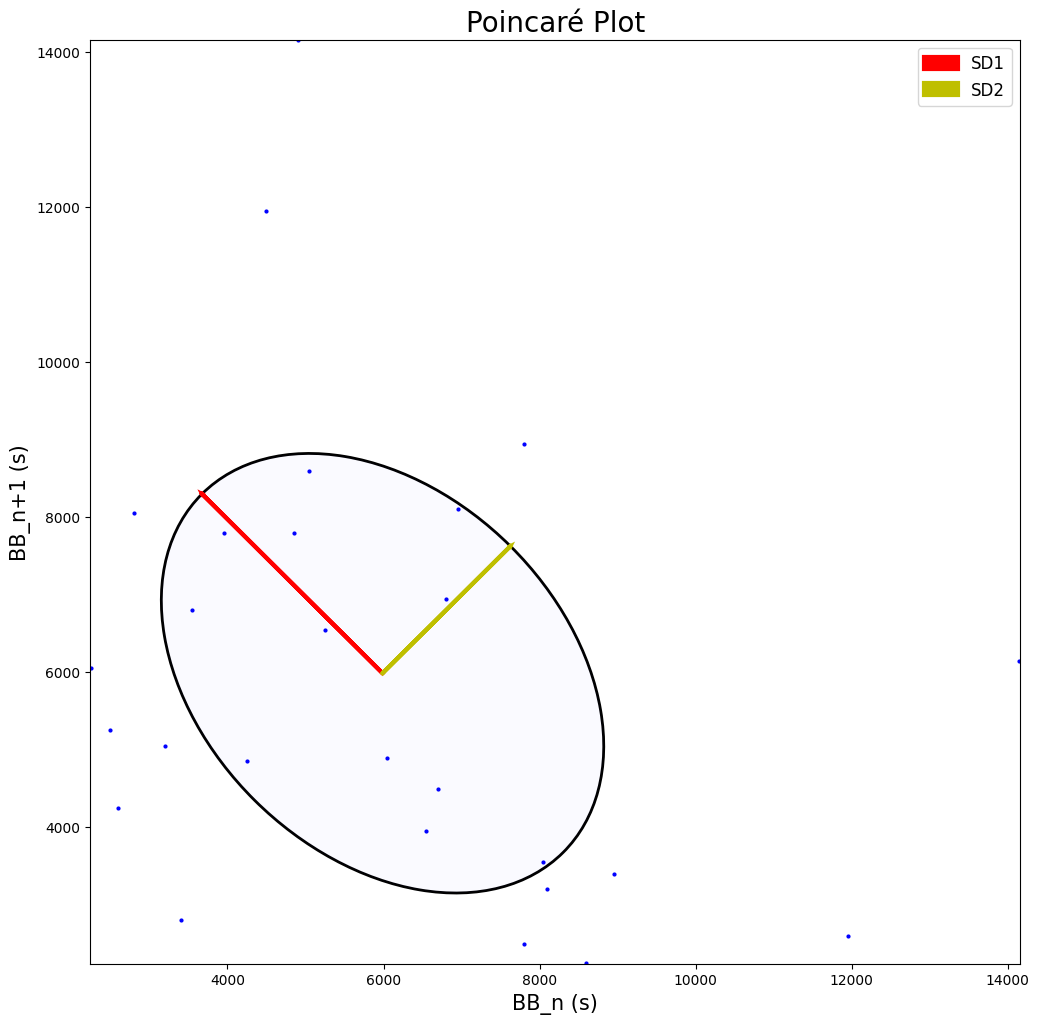

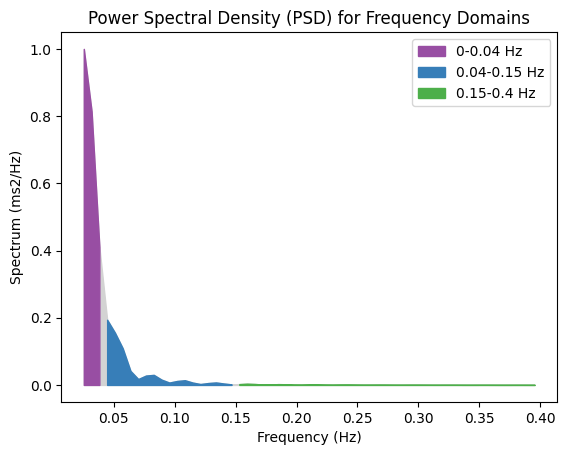

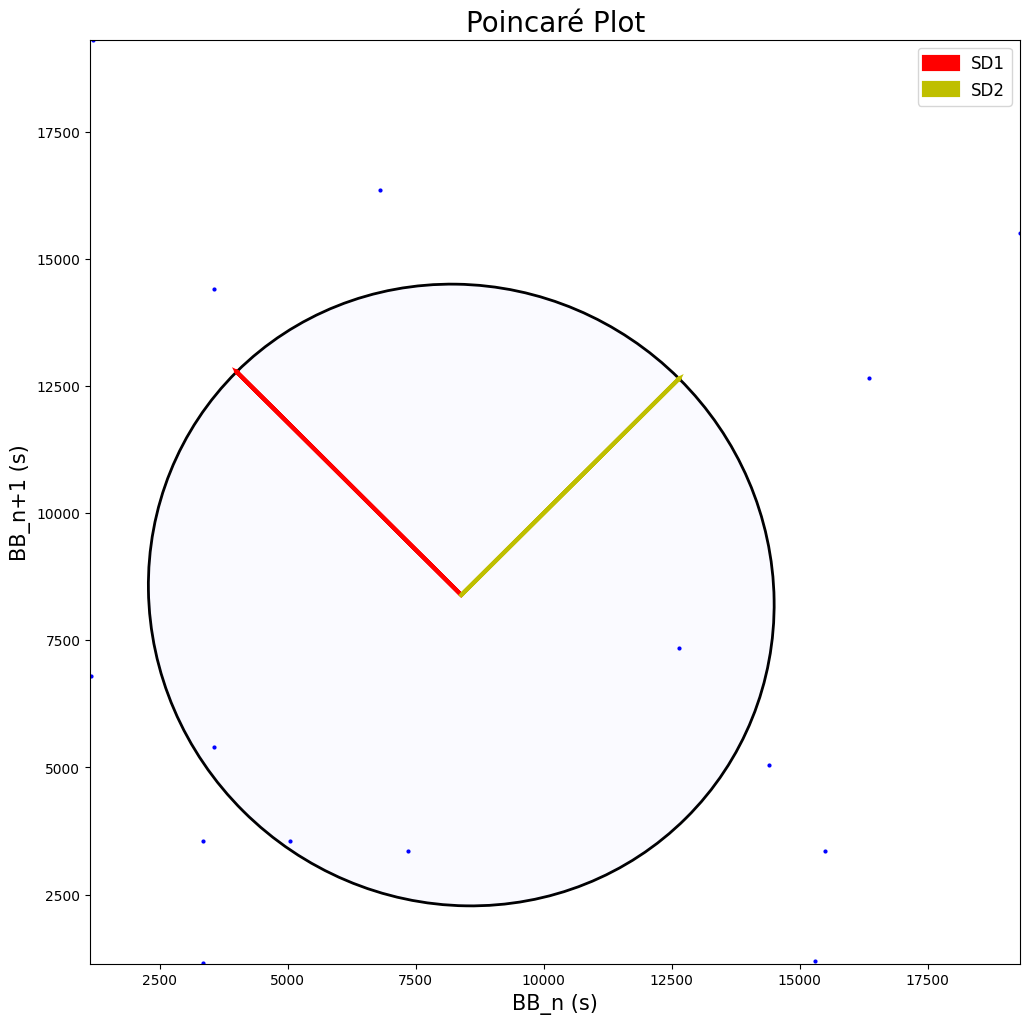

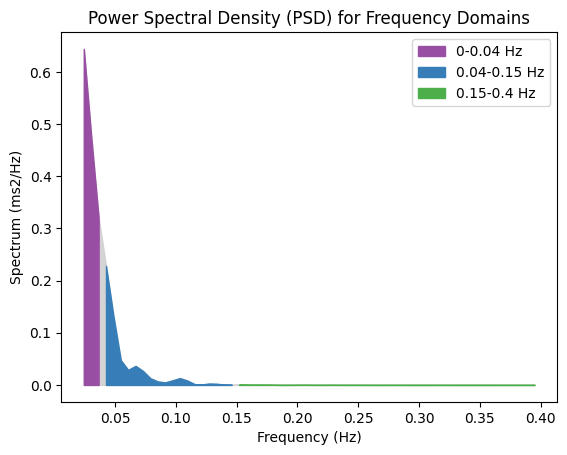

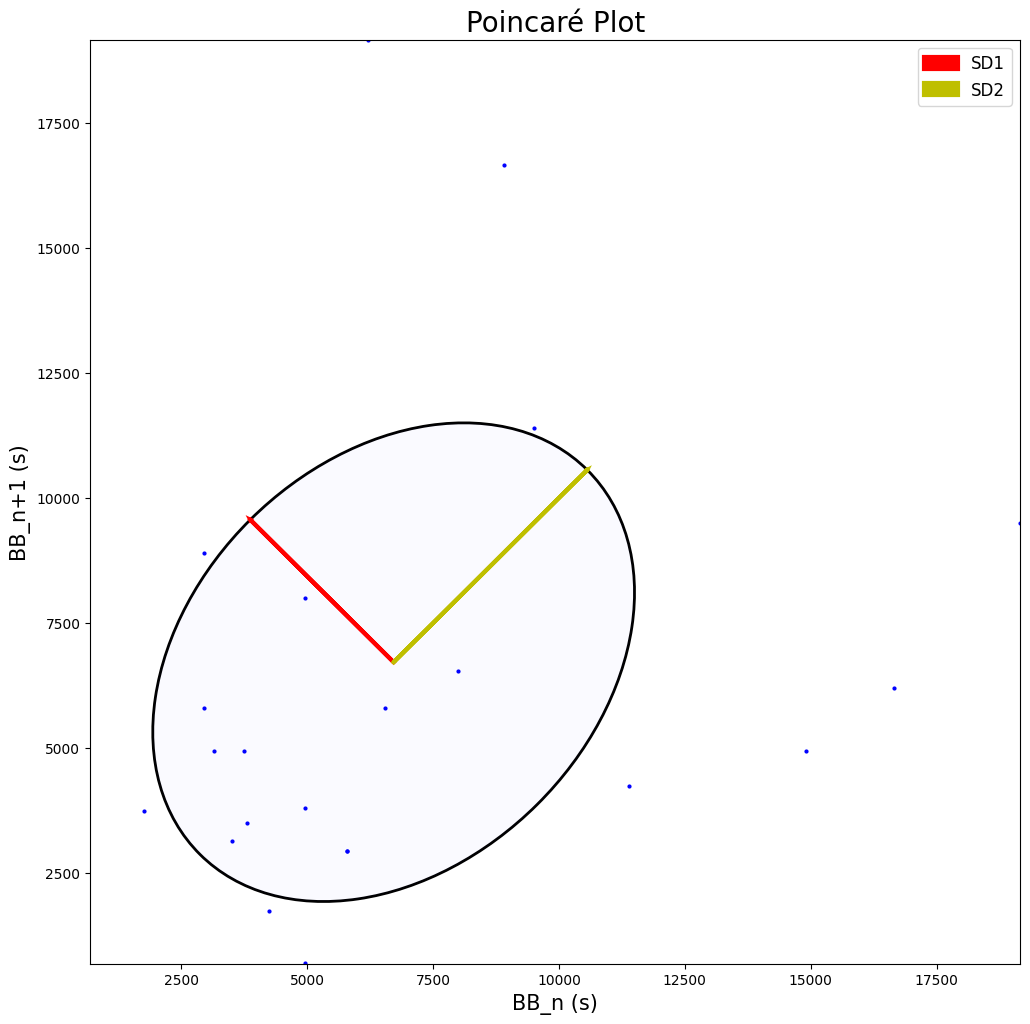

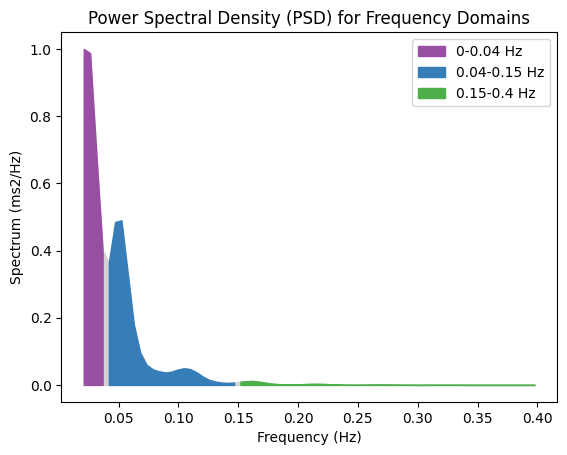

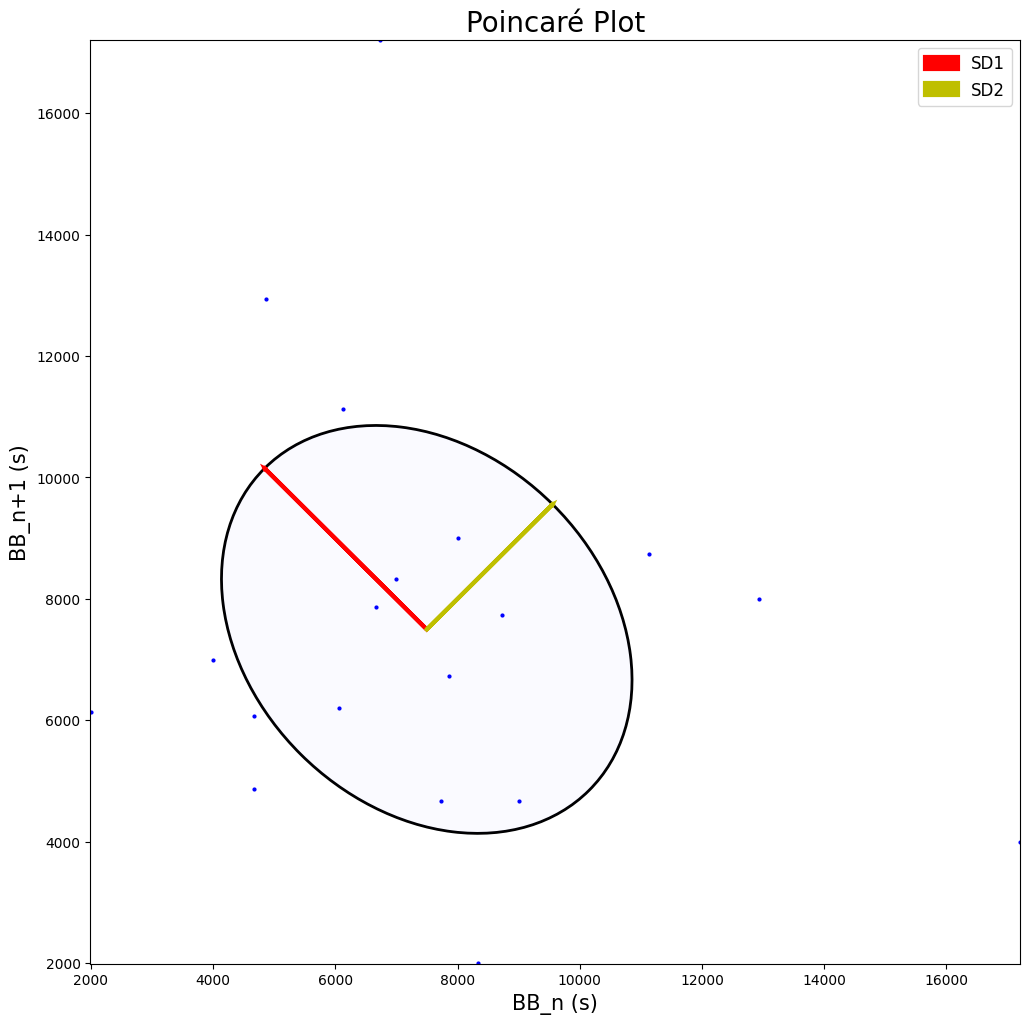

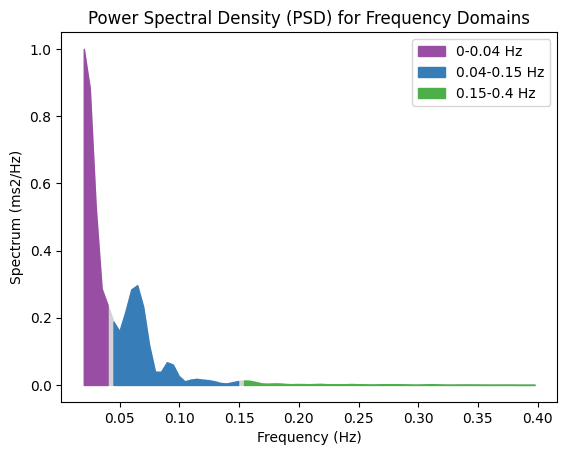

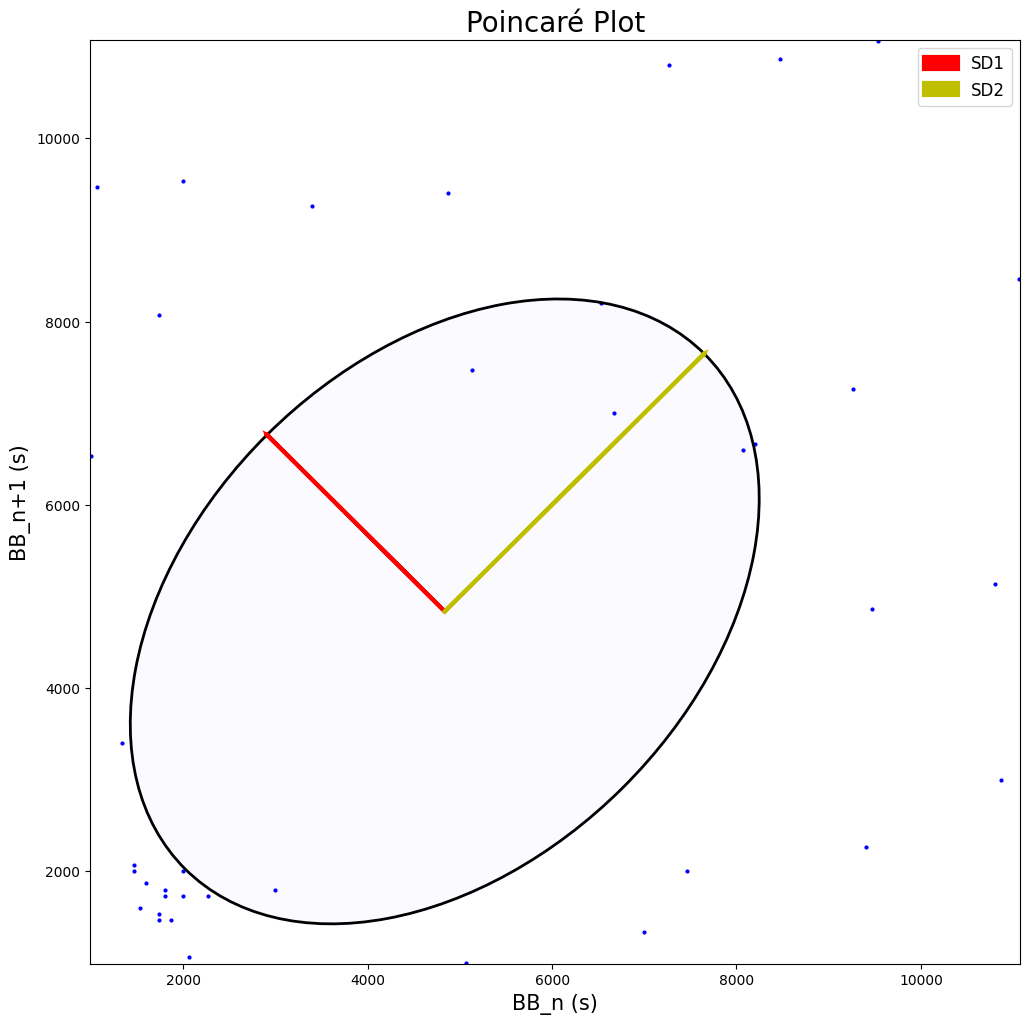

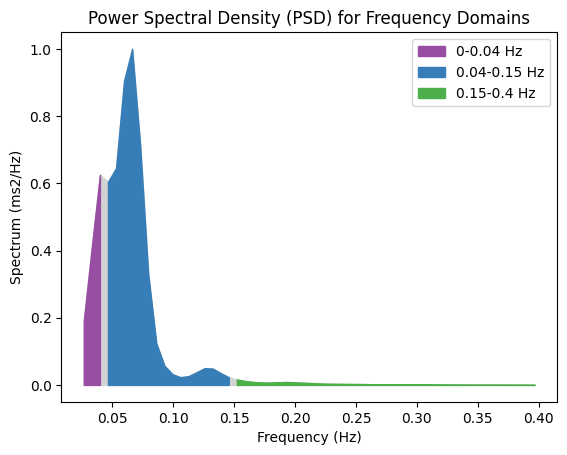

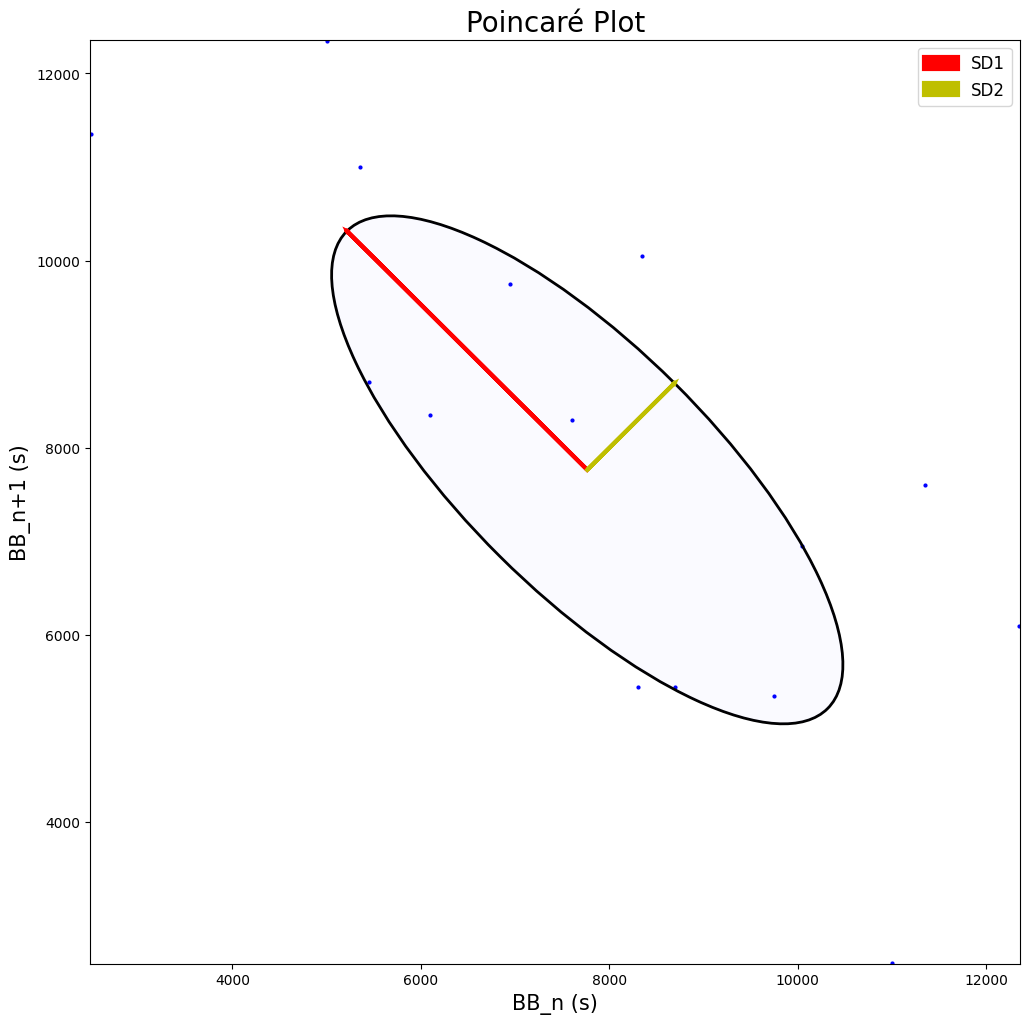

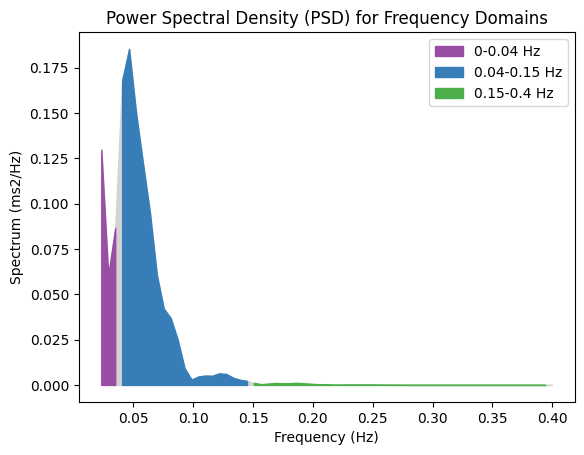

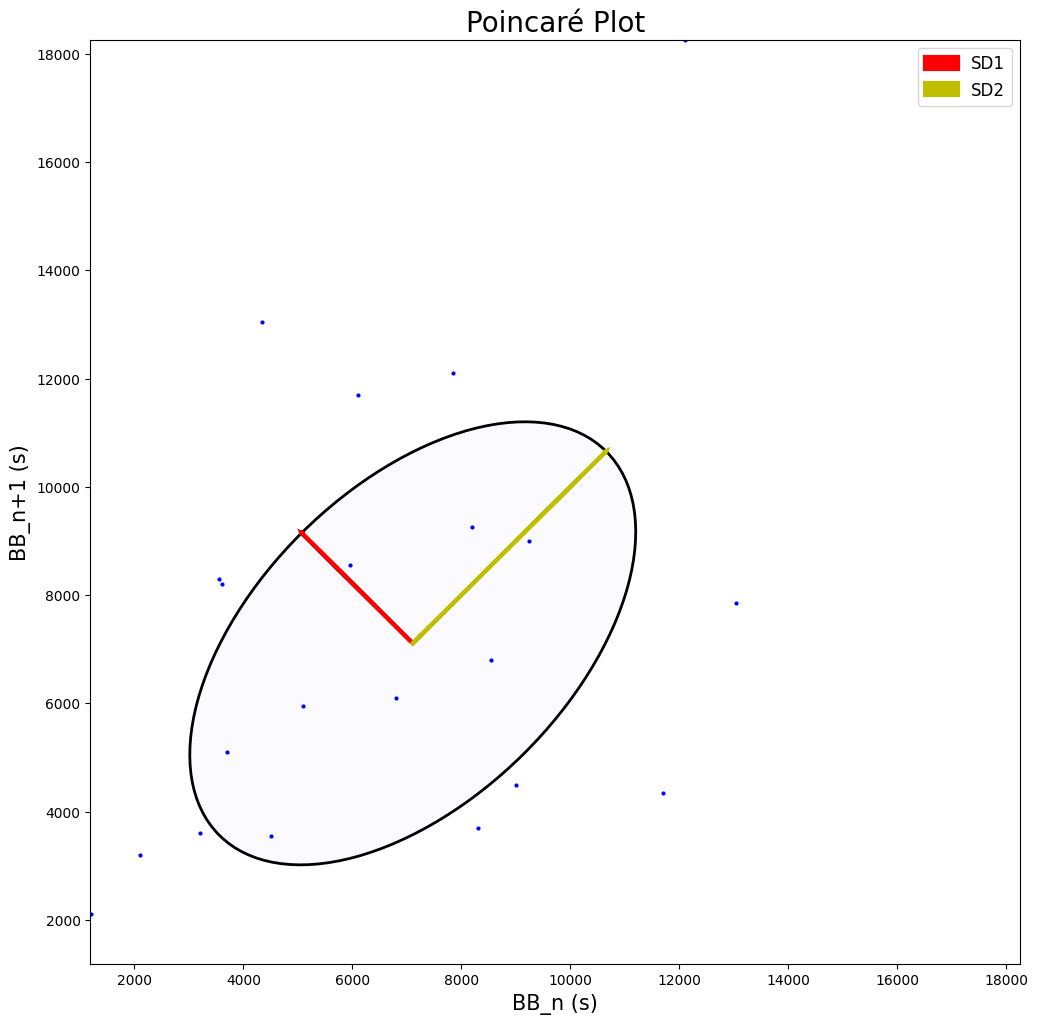

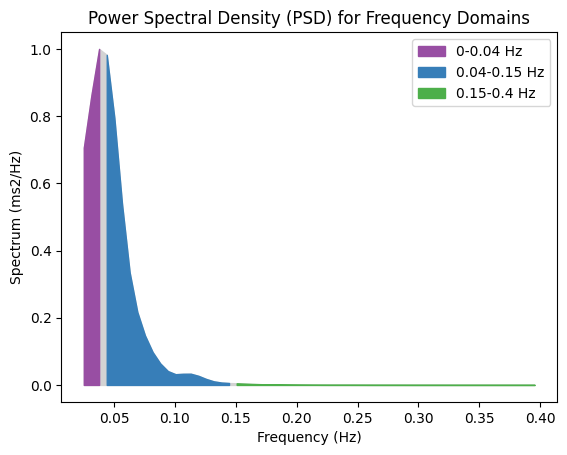

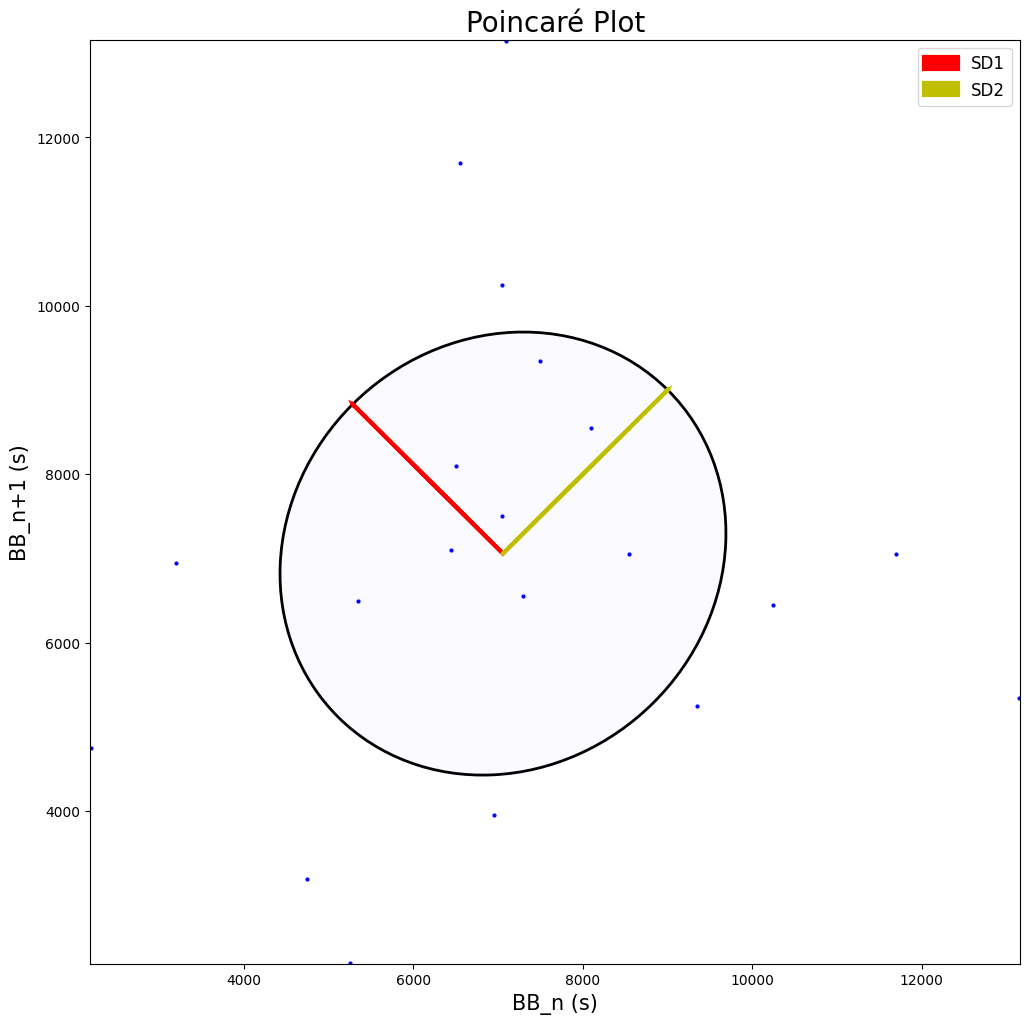

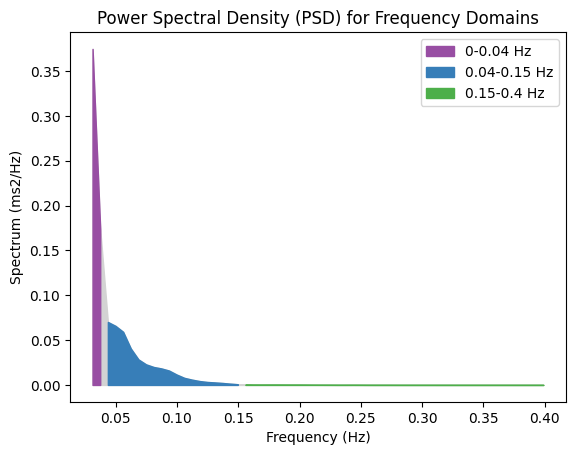

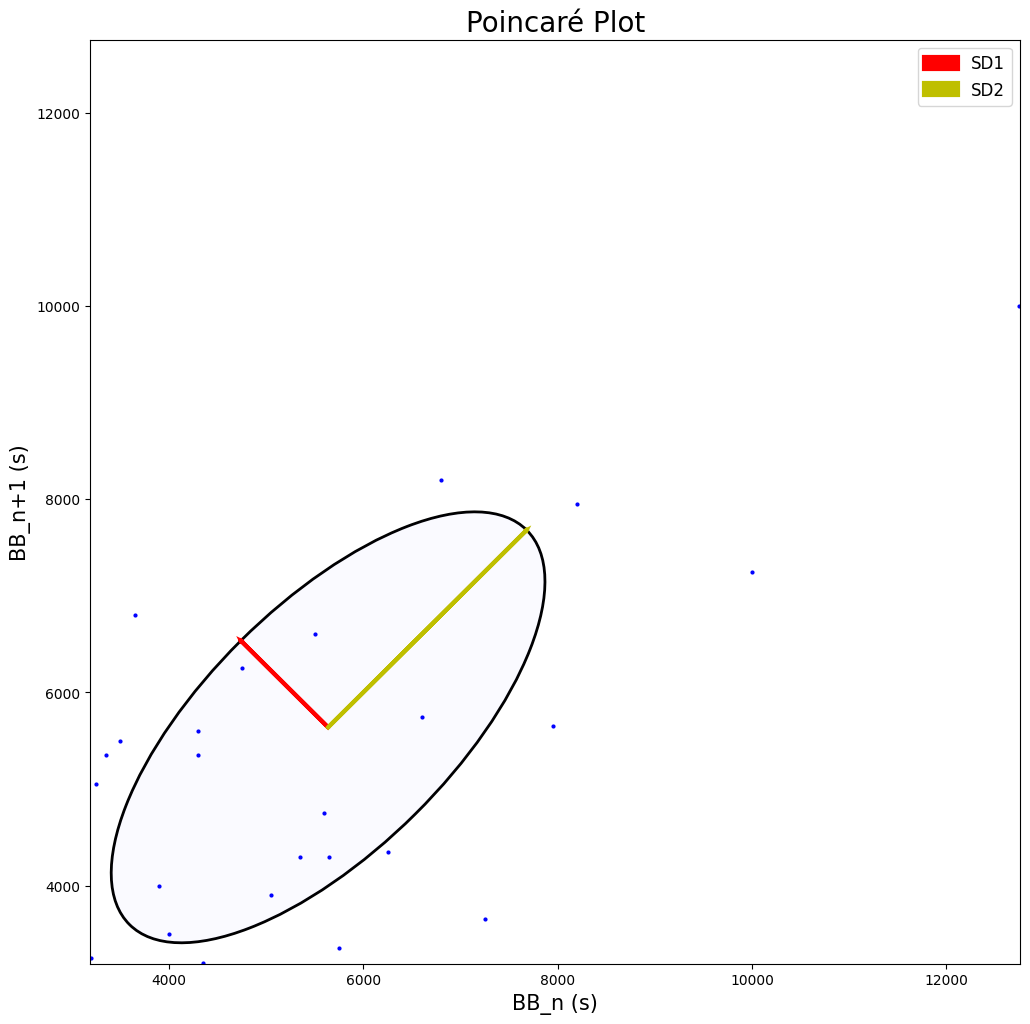

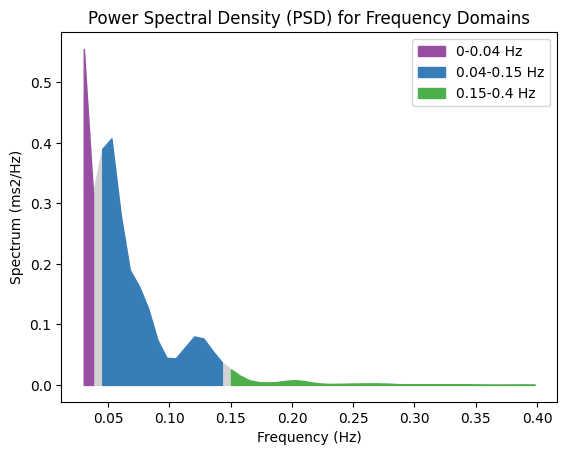

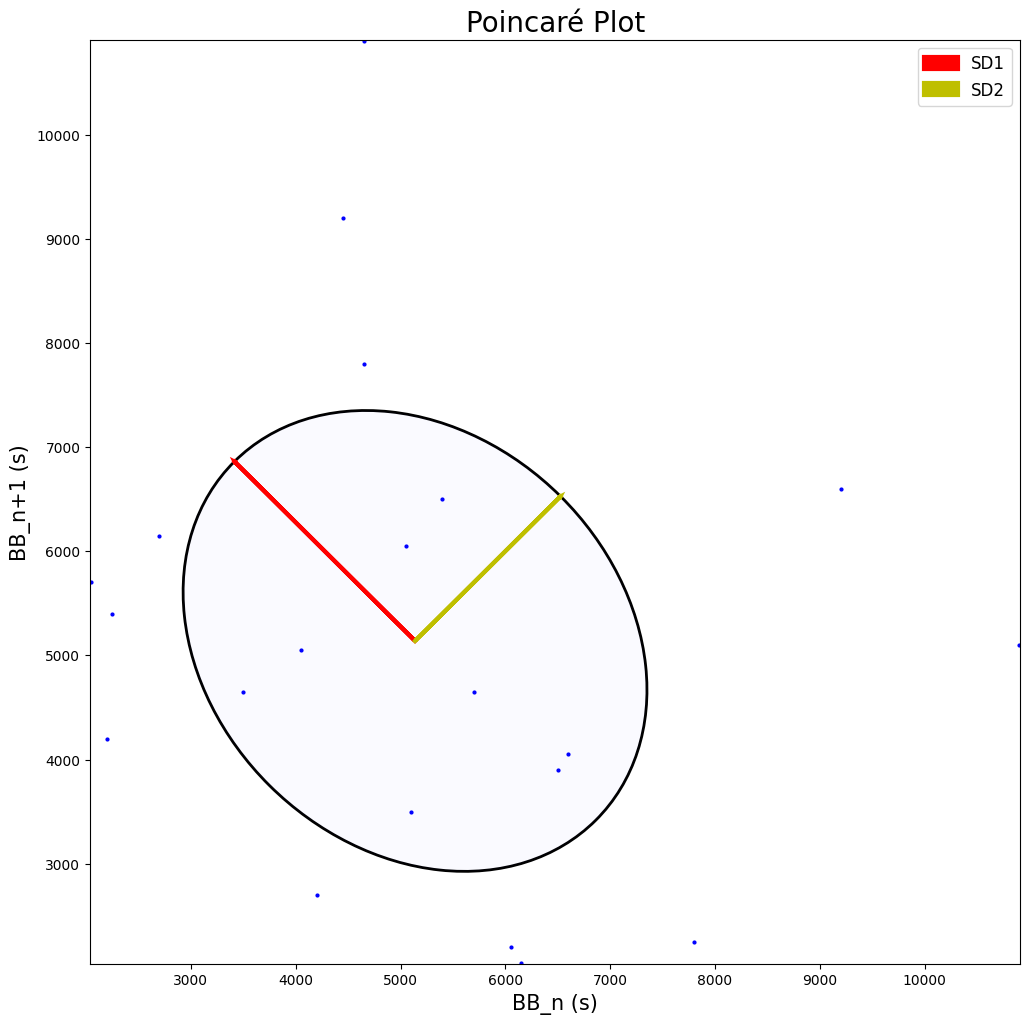

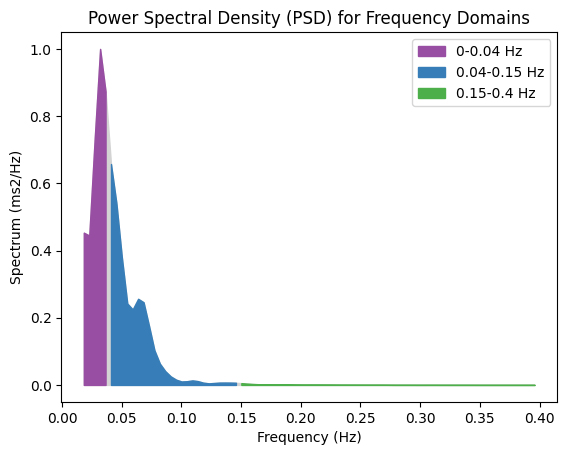

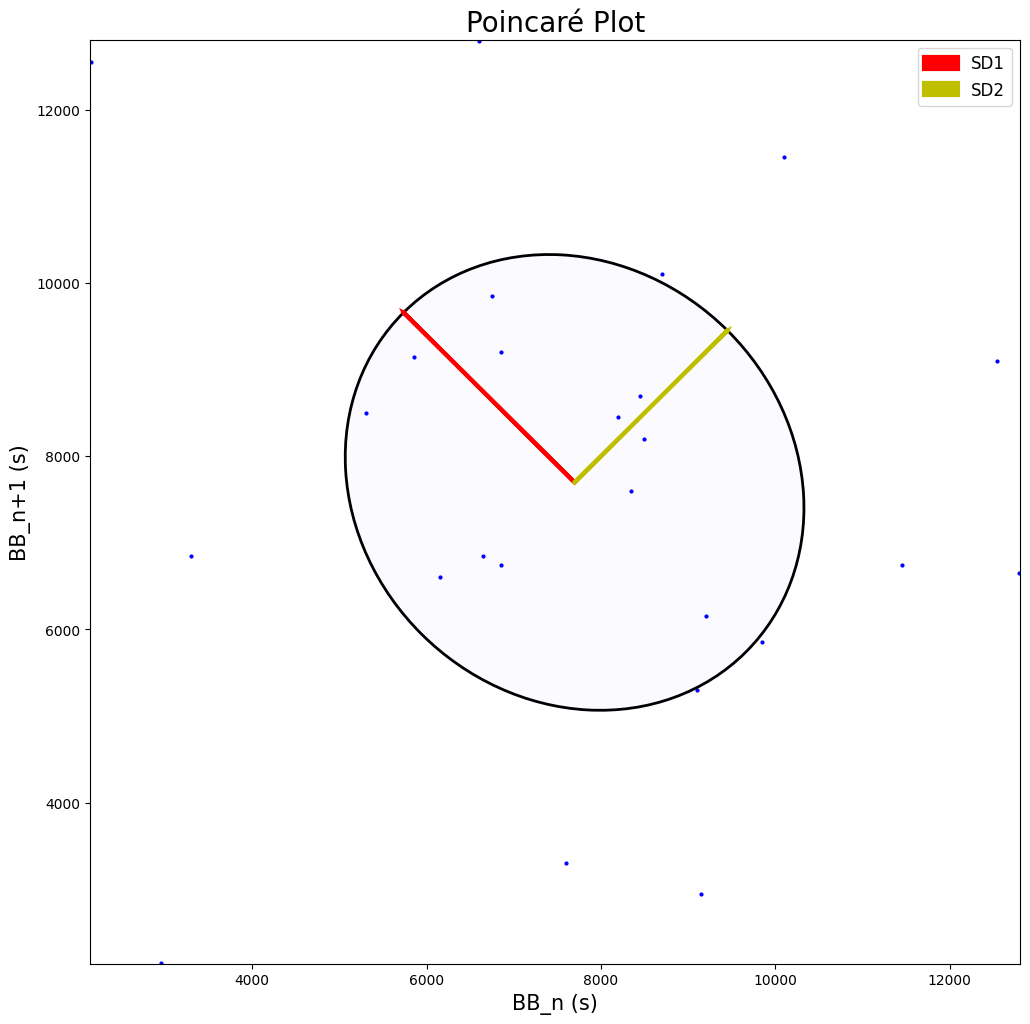

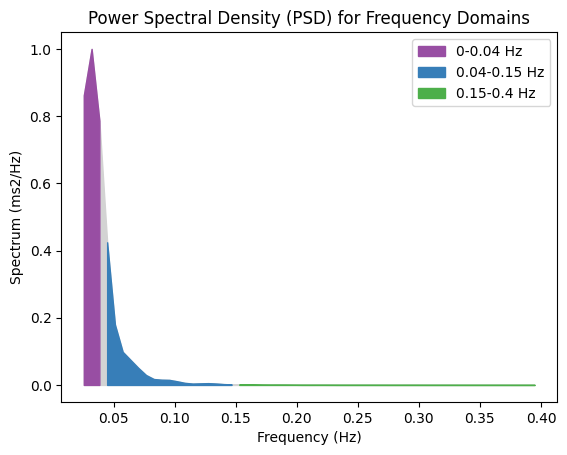

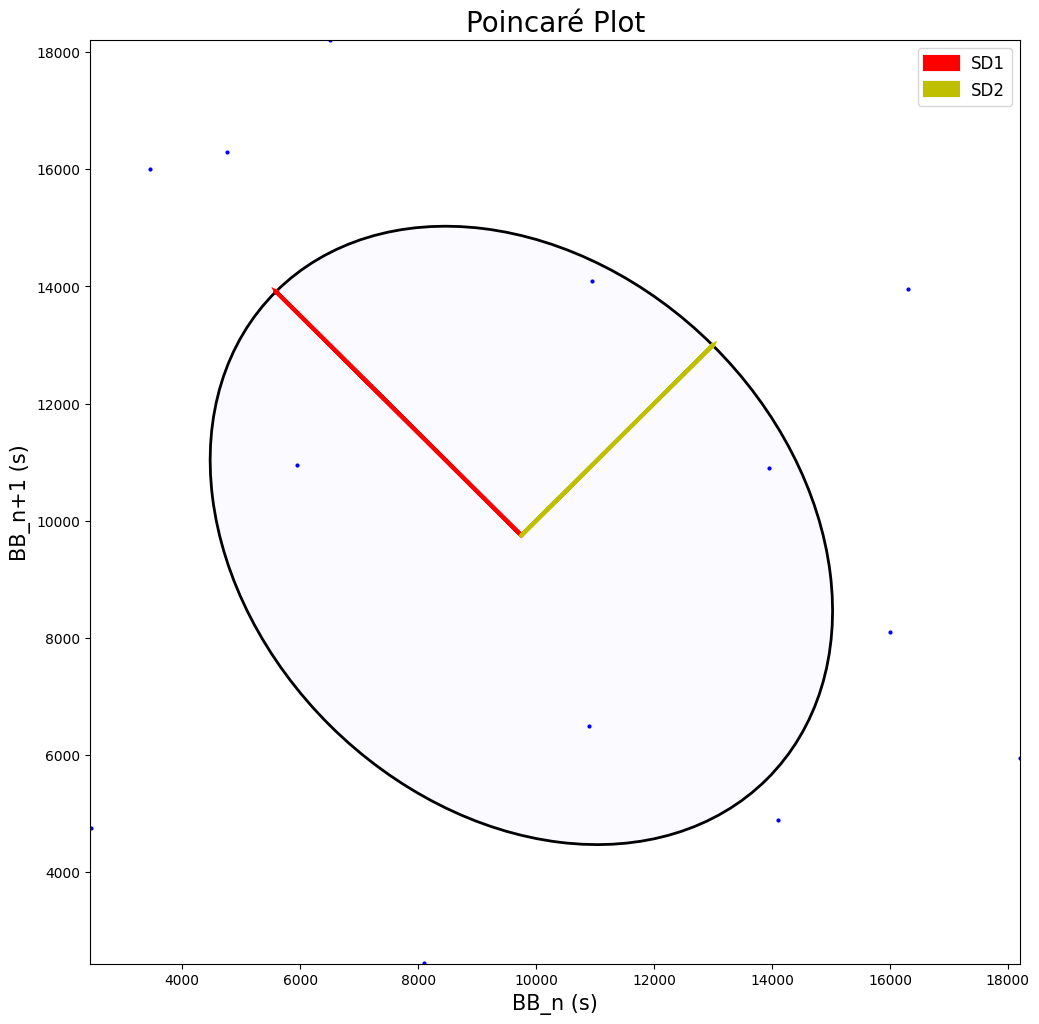

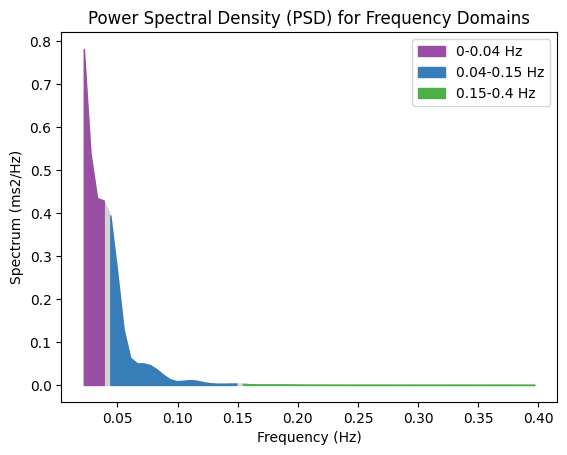

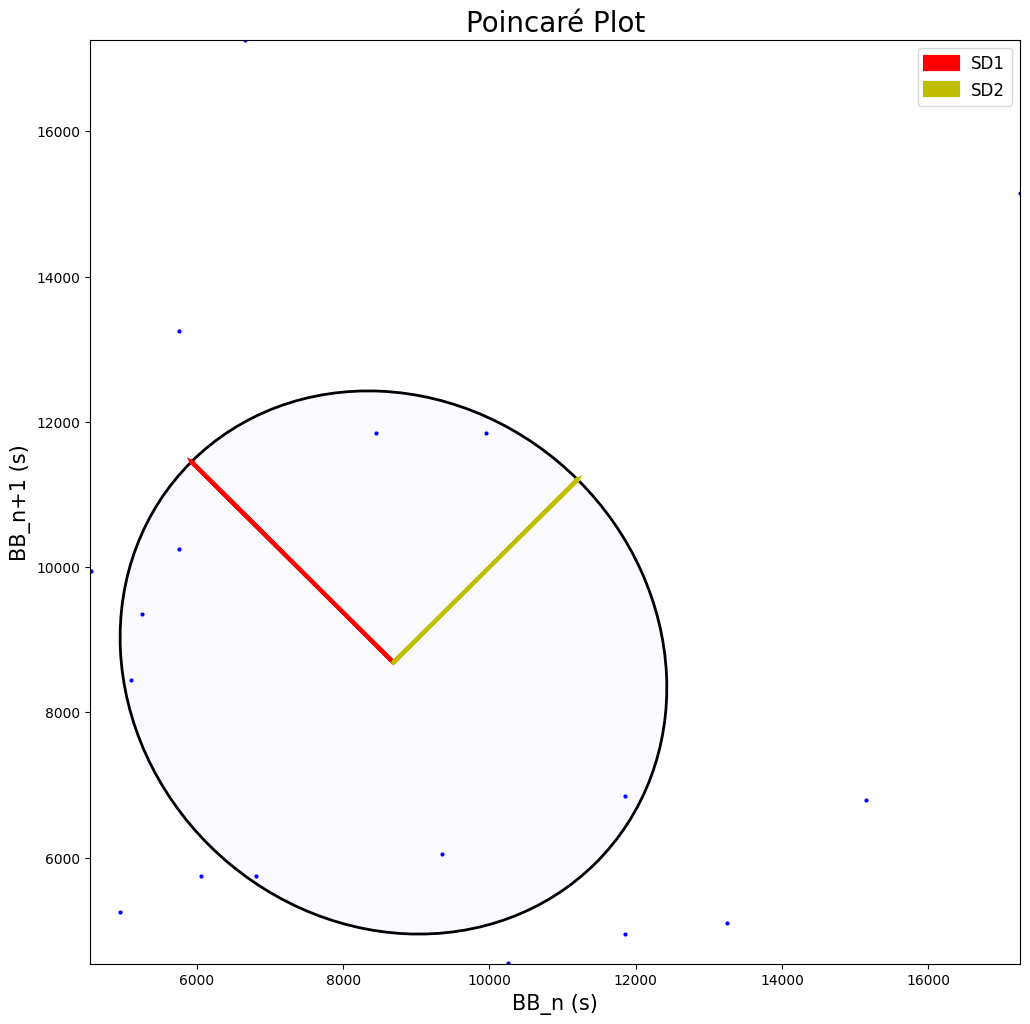

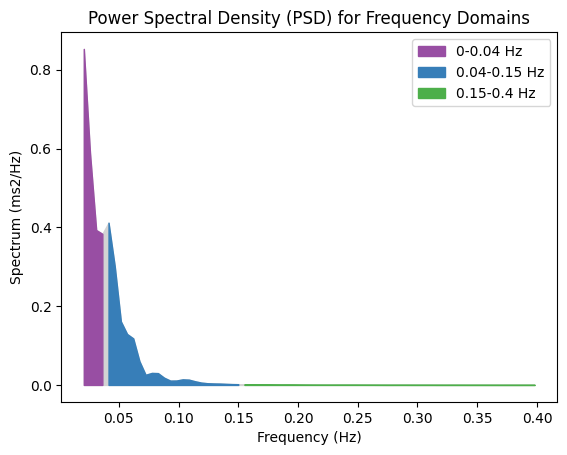

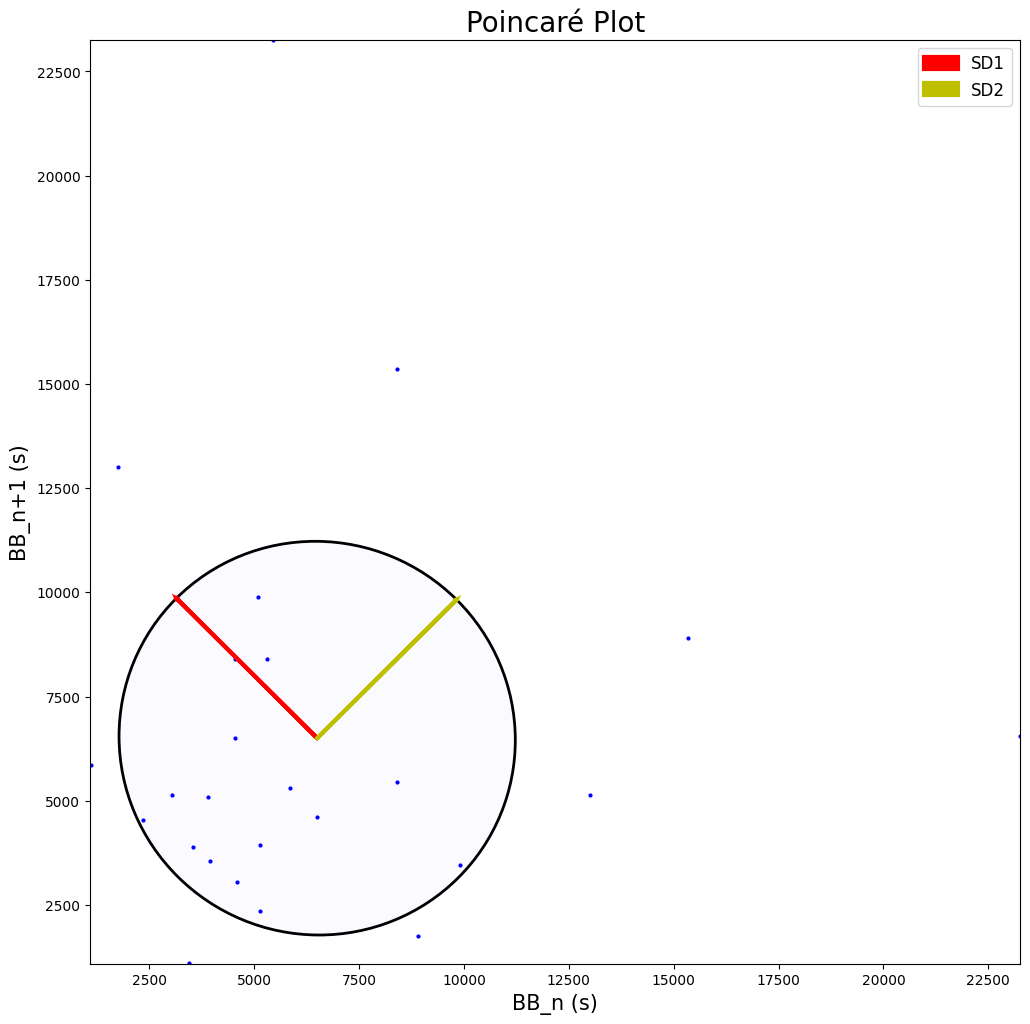

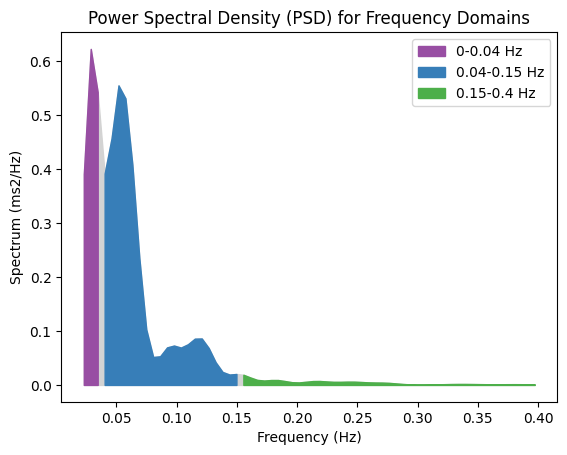

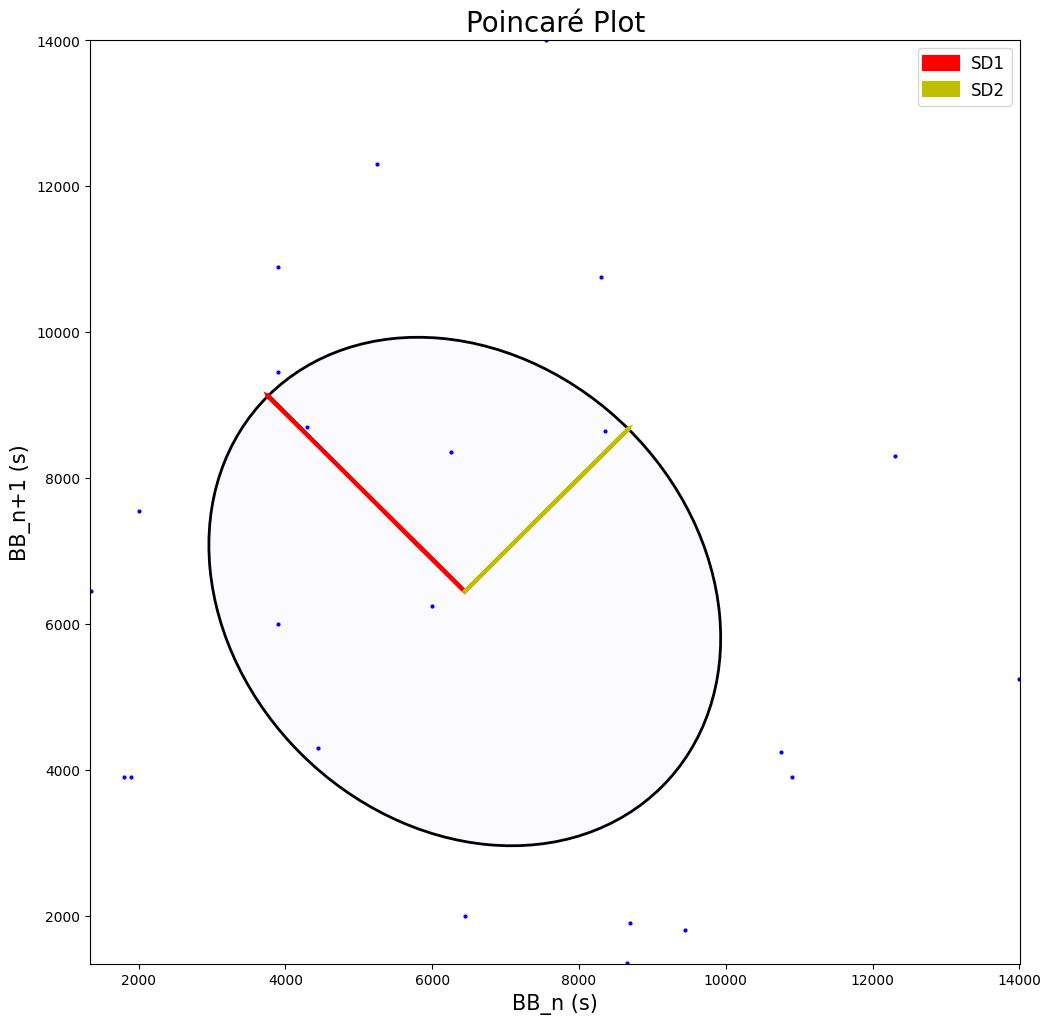

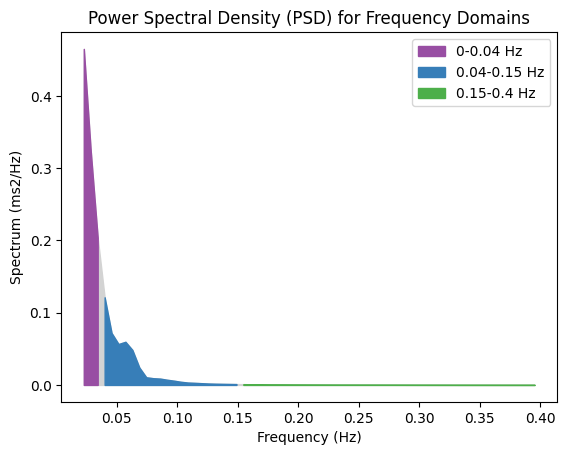

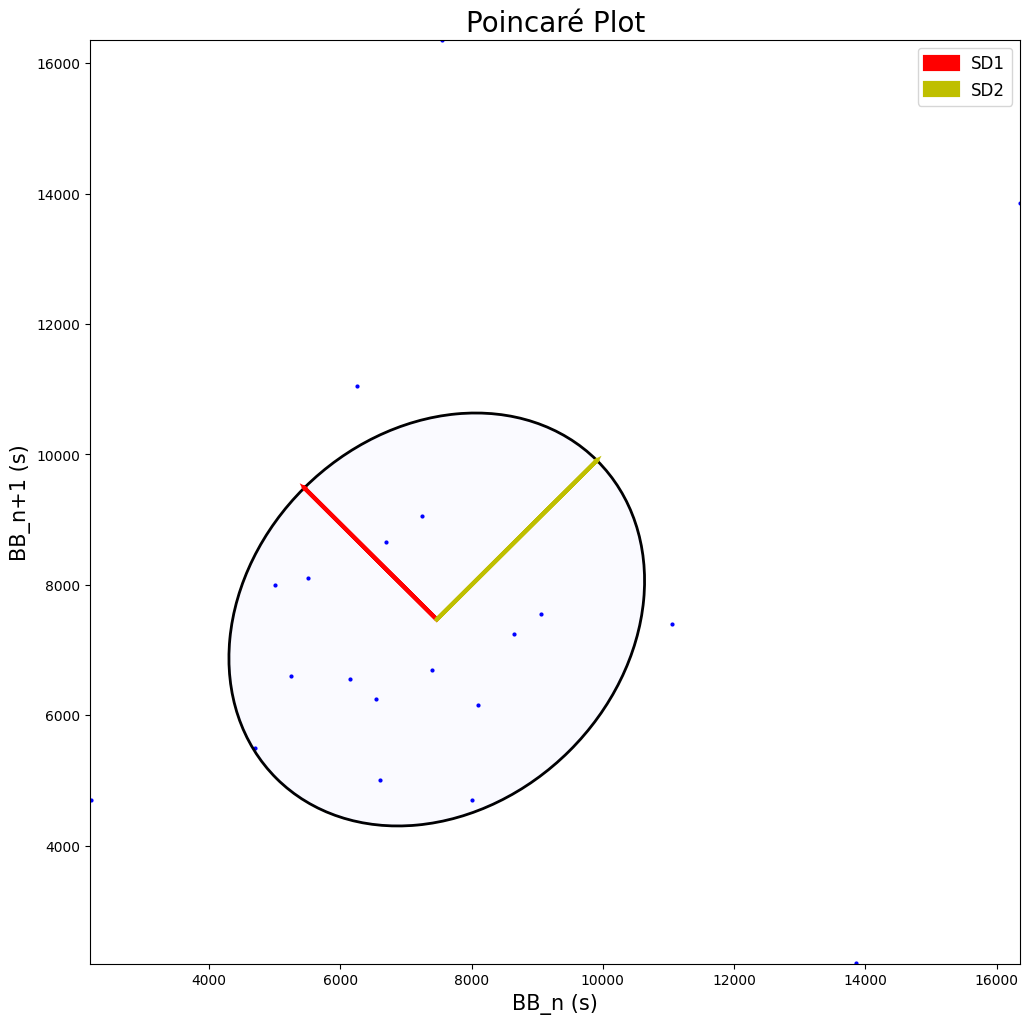

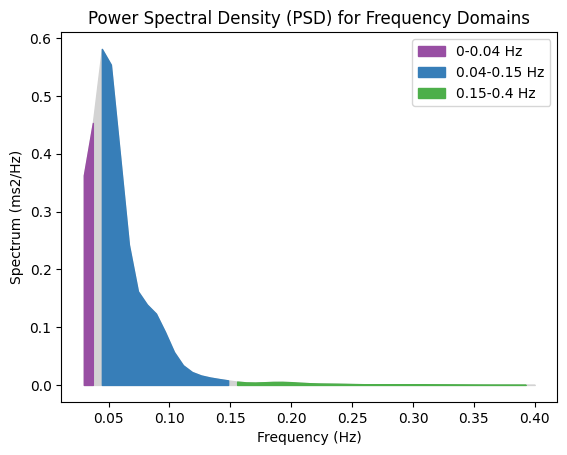

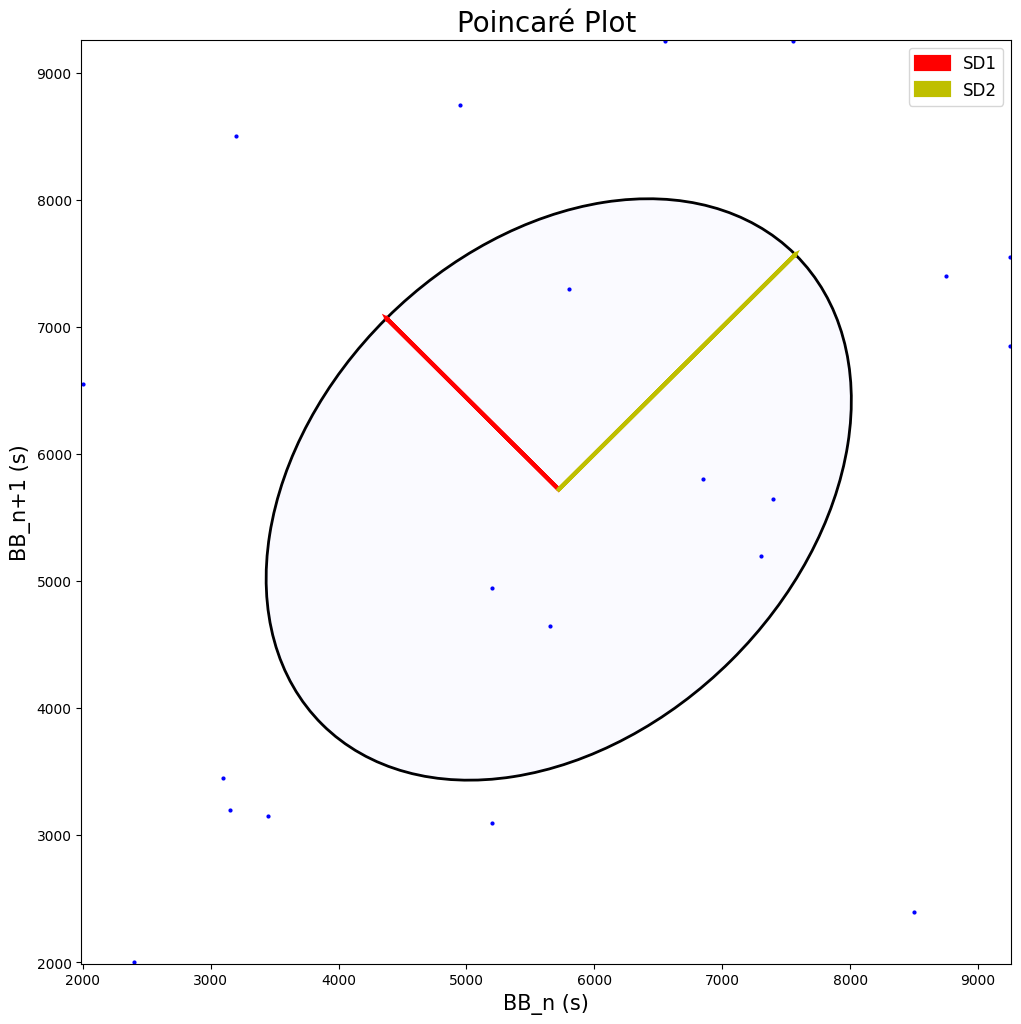

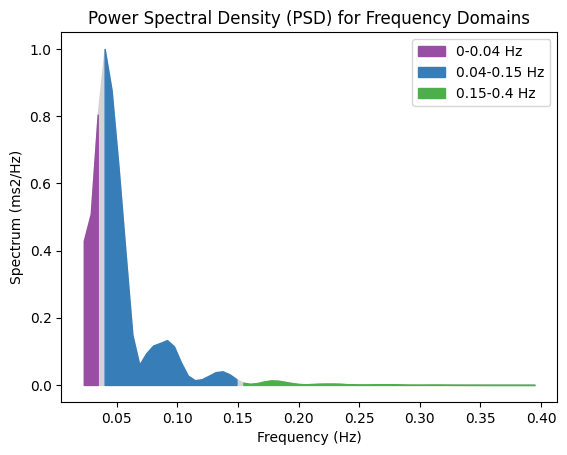

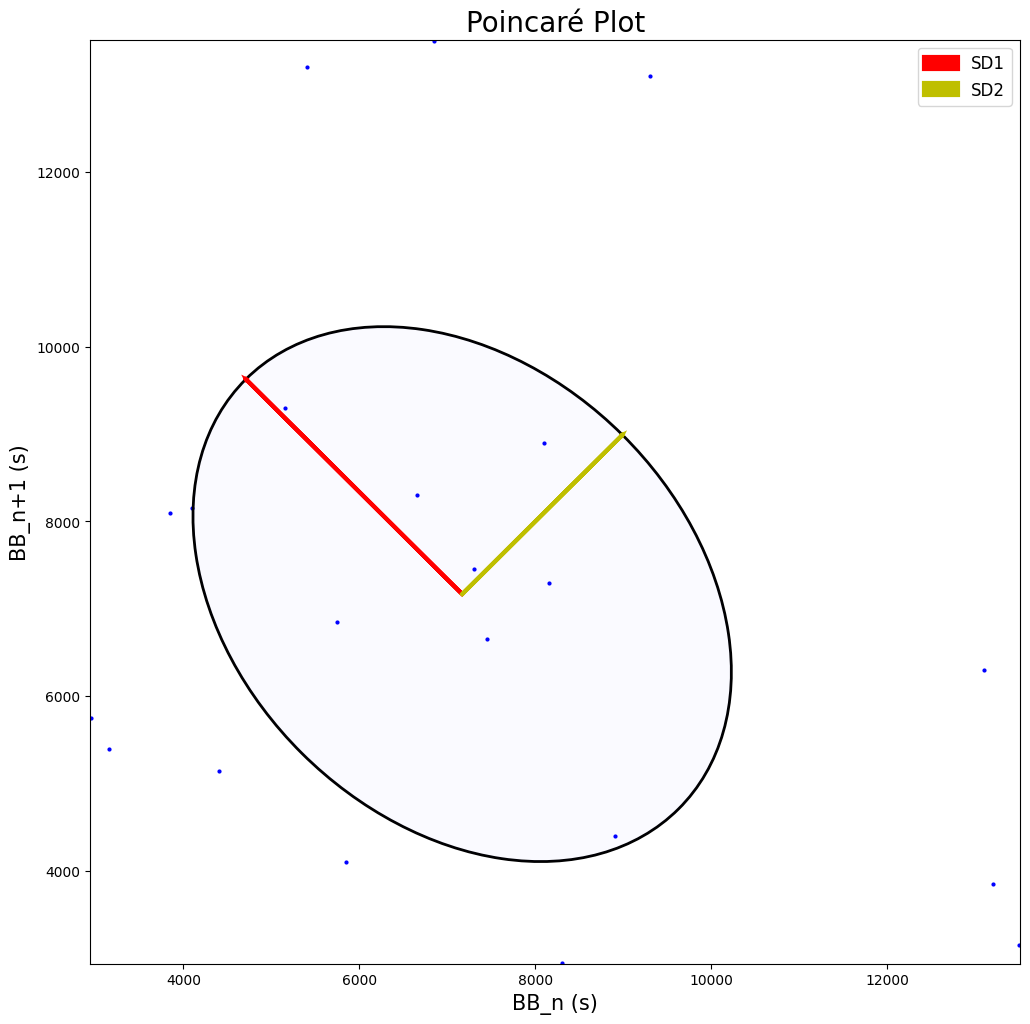

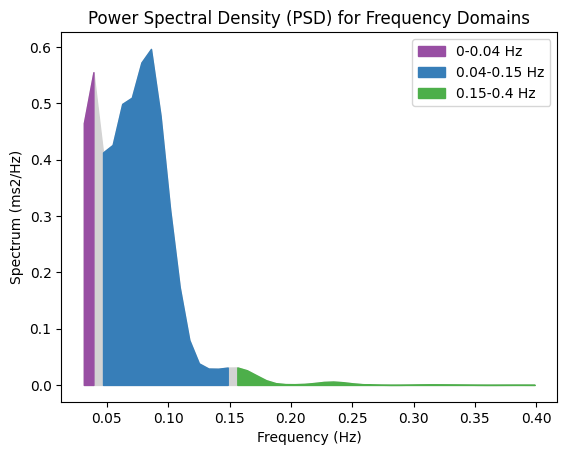

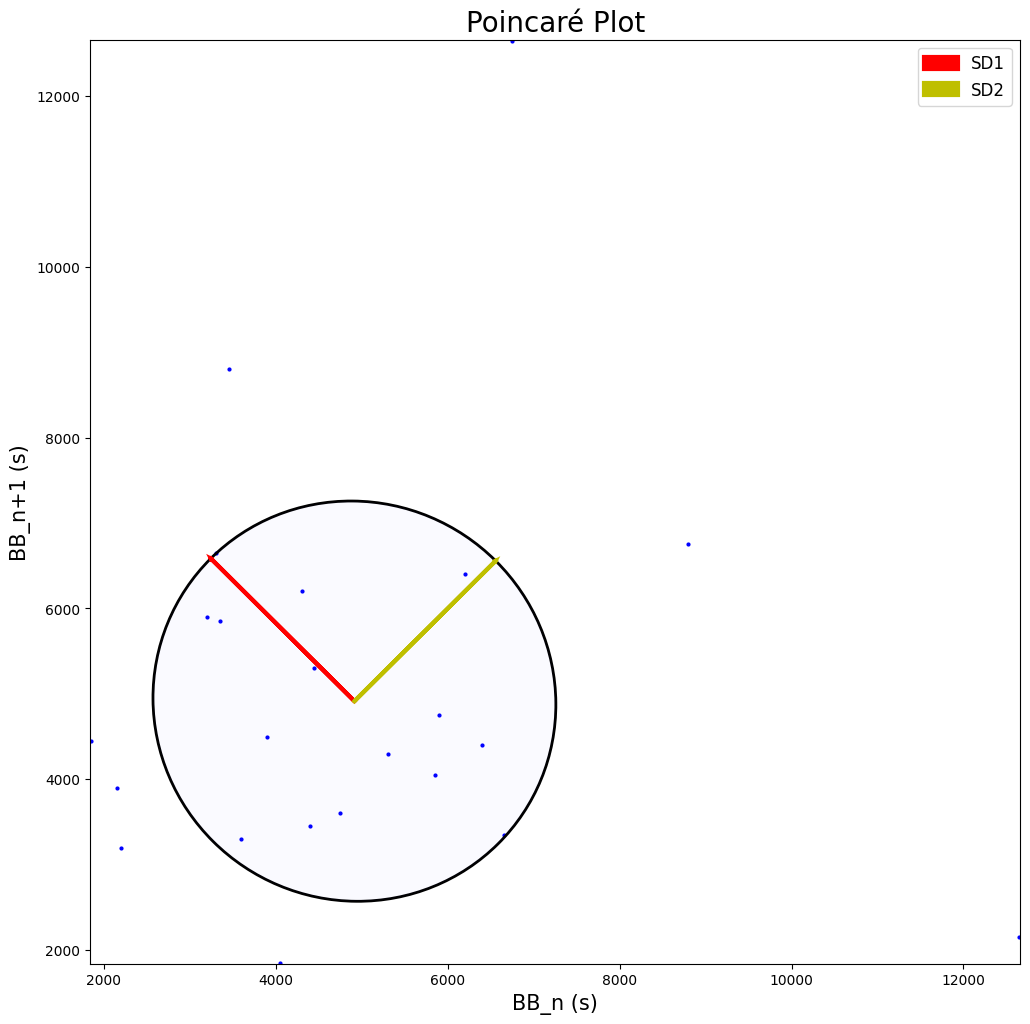

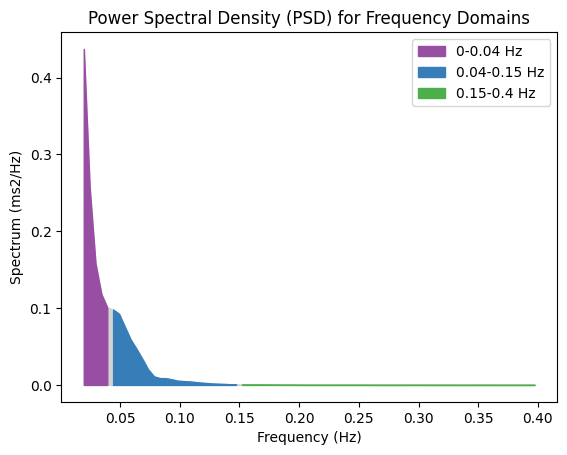

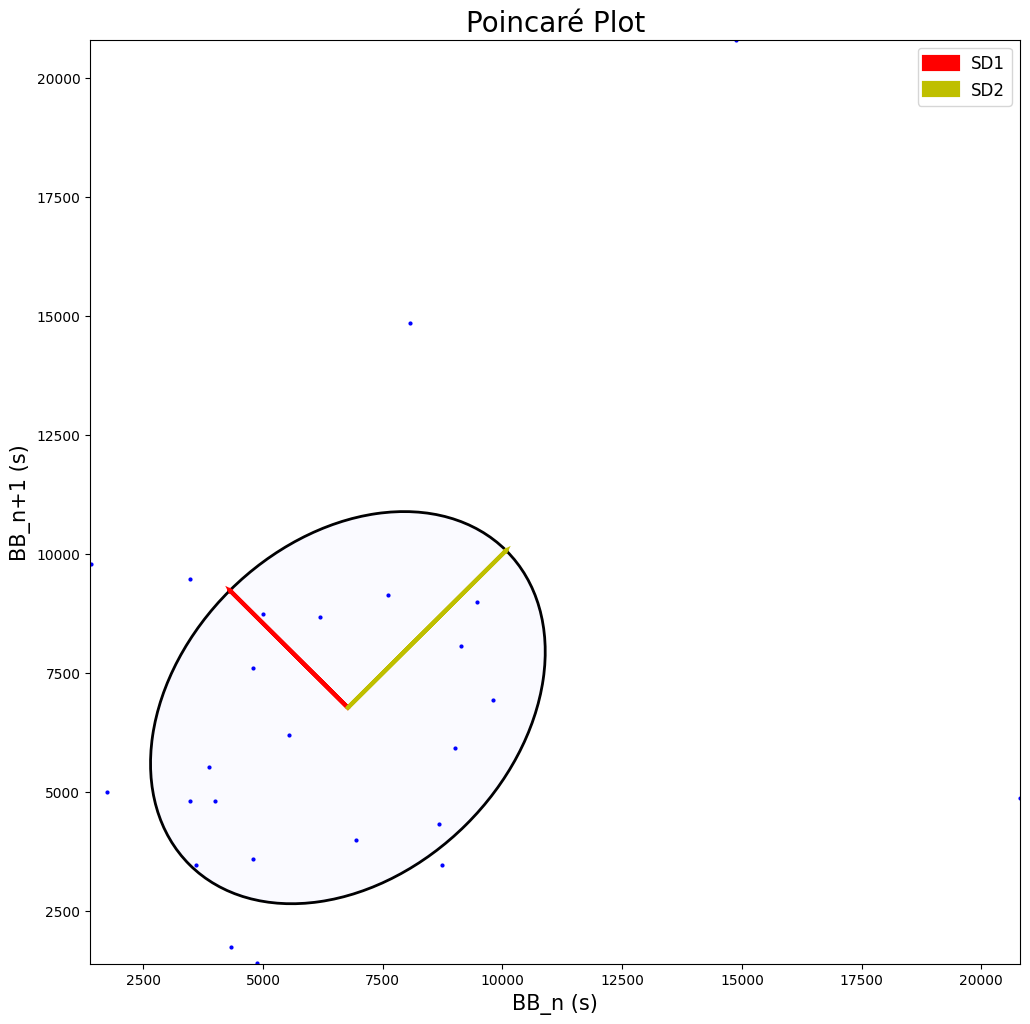

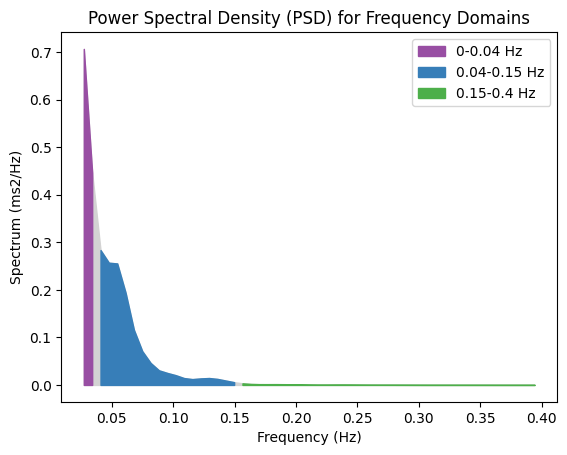

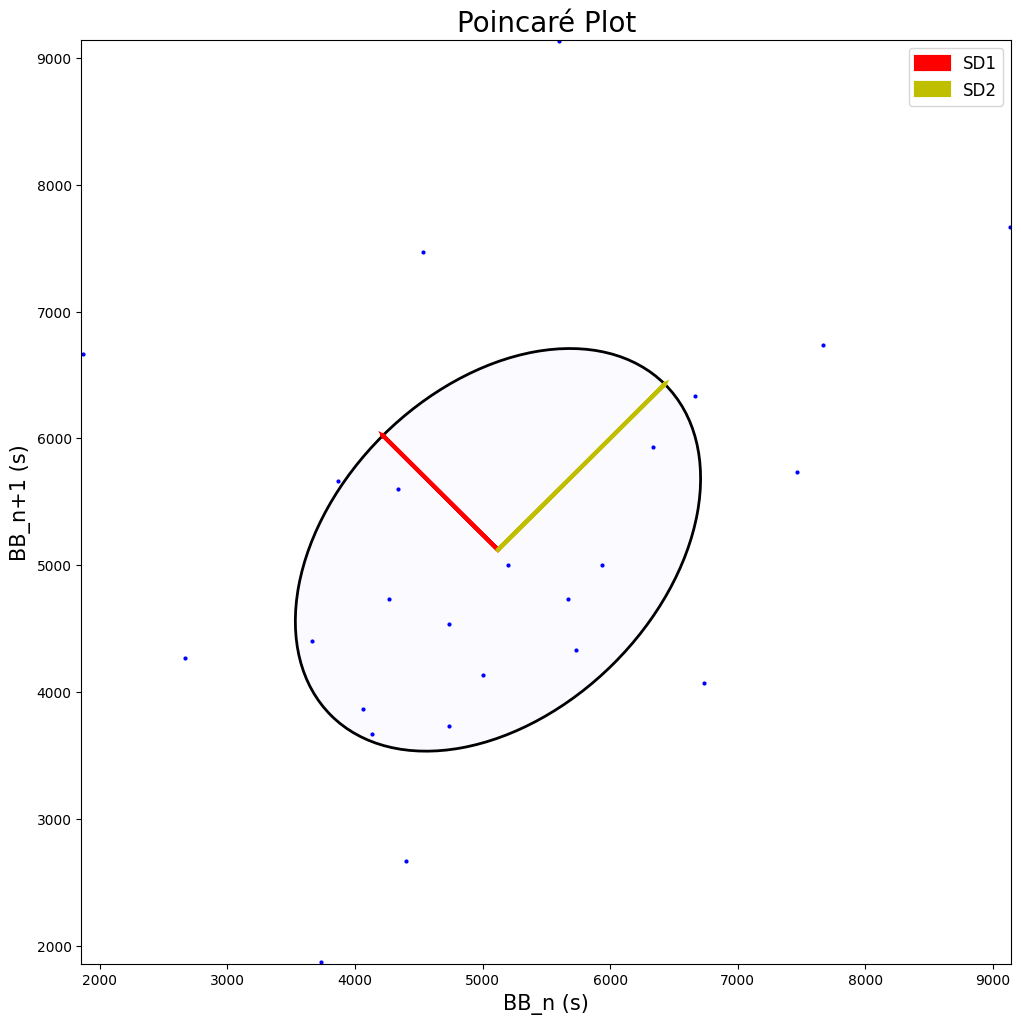

In [16]:
feature = CalRESFeatures(inputPath, sampleRate=sampleRate, output=False)

In [18]:
feature.to_csv('Feature3group/RES.csv')
feature

data_name    RRV_RMSSD   RRV_MeanBB     RRV_SDBB     RRV_SDSD  RRV_CVBB  \
0   A100C_Post  3159.924841  5309.523810  2689.870770  3241.964763  0.506612   
1    A100C_Pre  3420.282639  4654.000000  2593.176945  3489.269264  0.557193   
2   A101V_Post  7727.329270  8727.777778  4442.482819  7965.148119  0.509005   
3    A101V_Pre  2654.165222  3885.227273  2394.241627  2684.487450  0.616242   
4   A102C_Post  2787.575456  5737.037037  1977.498060  2840.178759  0.344690   
..         ...          ...          ...          ...          ...       ...   
73    A97V_Pre  2624.571394  5721.428571  2286.786579  2692.605615  0.399688   
74   A98C_Post  4797.481978  7168.181818  3059.043791  4915.907125  0.426753   
75    A98C_Pre  3269.157583  4914.583333  2343.097131  3341.066787  0.476764   
76   A99V_Post  4827.974040  6771.794872  4120.417372  4926.807997  0.608468   
77    A99V_Pre  1766.100538  5120.512821  1587.060929  1802.500321  0.309942   

    RRV_CVSD  RRV_MedianBB  RRV_MadBB  RRV_MCVBB  ...   RRV_LFn   RRV_HFn  \
0   0.595143   5200.000000   1482.600   0.285115  ...  0.441544  0.007091   
1   0.734912   4050.000000   2223.900   0.549111  ...  0.588043  0.023825   
2   0.885372   7475.000000   2223.900   0.297512  ...  0.633337  0.022085   
3   0.683143   3500.000000   2520.420   0.720120  ...  0.537365  0.026276   
4   0.485891   5350.000000   1779.120   0.332546  ...  0.638547  0.011829   
..       ...           ...        ...        ...  ...       ...       ...   
73  0.458727   5650.000000   2816.940   0.498573  ...  0.821550  0.023271   
74  0.669275   6750.000000   2335.095   0.345940  ...  0.739417  0.021986   
75  0.665195   4425.000000   1742.055   0.393685  ...  0.865828  0.022791   
76  0.712953   5733.333333   3261.720   0.568905  ...  0.354973  0.003084   
77  0.344907   4866.666667   1235.500   0.253870  ...  0.675548  0.009812   

        RRV_SD1      RRV_SD2  RRV_SD2SD1  RRV_ApEn  RRV_SampEn  \
0   2292.415268  3035.727550    1.324249  0.087336         inf   
1   2467.285958  2713.233004    1.099683  0.118740         inf   
2   5632.210248  2783.795055    0.494263  0.015825   -0.000000   
3   1898.219280  2803.845486    1.477093  0.219202    1.223775   
4   2008.309660  1946.198720    0.969073  0.056353         inf   
..          ...          ...         ...       ...         ...   
73  1903.959690  2614.139096    1.373001  0.106202    0.693147   
74  3476.071263  2575.349764    0.740879  0.083238         inf   
75  2362.490981  2323.541413    0.983513  0.076096         inf   
76  3483.779344  4671.076976    1.340807  0.146463         inf   
77  1274.560200  1847.436354    1.449470  0.070082         inf   

    RRV_DFA_alpha1  addictLabel  stateLabel  
0              NaN            1           2  
1              NaN            1           0  
2              NaN            1           2  
3              NaN            1           0  
4              NaN            1           2  
..             ...          ...         ...  
73             NaN            1           0  
74             NaN            1           2  
75             NaN            1           0  
76             NaN            1           2  
77             NaN            1           0  

[78 rows x 24 columns]

In [ ]:
res_data = pd.read_csv("Feature3group/RES.csv", header=0, index_col=0).drop(['RRV_SampEn', 'RRV_DFA_alpha1'], axis=1)
res_data.to_csv('Feature3group/RES_dc.csv')